In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Bengaluru_House_Data.csv'

In [ ]:
df = df.drop(columns=["area_type","availability","society"])
df.head()

In [ ]:
df.location.nunique()

In [5]:
df["location"] = df["location"].str.strip()

In [6]:
df.location.nunique()

1294

In [7]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df["bhk"] = df["size"].str.split().str.get(0)

In [9]:
df.head()

location       size total_sqft  bath  balcony   price bhk
0  Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07   2
1          Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00   4
2               Uttarahalli      3 BHK       1440   2.0      3.0   62.00   3
3        Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00   3
4                  Kothanur      2 BHK       1200   2.0      1.0   51.00   2

In [10]:
df = df.drop(columns= ["size"])
df.head()

location total_sqft  bath  balcony   price bhk
0  Electronic City Phase II       1056   2.0      1.0   39.07   2
1          Chikka Tirupathi       2600   5.0      3.0  120.00   4
2               Uttarahalli       1440   2.0      3.0   62.00   3
3        Lingadheeranahalli       1521   3.0      1.0   95.00   3
4                  Kothanur       1200   2.0      1.0   51.00   2

In [11]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df[~(df["total_sqft"].apply(is_float))].head(10)

location      total_sqft  bath  balcony    price bhk
30            Yelahanka     2100 - 2850   4.0      0.0  186.000   4
56          Devanahalli     3010 - 3410   NaN      NaN  192.000   4
81          Hennur Road     2957 - 3450   NaN      NaN  224.500   4
122              Hebbal     3067 - 8156   4.0      0.0  477.000   4
137  8th Phase JP Nagar     1042 - 1105   2.0      0.0   54.005   2
165            Sarjapur     1145 - 1340   2.0      0.0   43.490   2
188            KR Puram     1015 - 1540   2.0      0.0   56.800   2
224         Devanahalli     1520 - 1740   NaN      NaN   74.820   3
410             Kengeri  34.46Sq. Meter   1.0      0.0   18.500   1
549         Hennur Road     1195 - 1440   2.0      0.0   63.770   2

In [20]:
def range_convert(x):
    li = x.split("-")
    if len (li)==2:
        return (float(li[0])+float((li)[1]))/2
    else:
        try:
            return float(x)
        except:
            return None

In [21]:
df["total_sqft"] = df["total_sqft"].apply(range_convert)
df.loc[[224,410]]

location  total_sqft  bath  balcony  price bhk
224  Devanahalli      1630.0   NaN      NaN  74.82   3
410      Kengeri         NaN   1.0      0.0  18.50   1

In [22]:
df.head()

location  total_sqft  bath  balcony   price bhk
0  Electronic City Phase II      1056.0   2.0      1.0   39.07   2
1          Chikka Tirupathi      2600.0   5.0      3.0  120.00   4
2               Uttarahalli      1440.0   2.0      3.0   62.00   3
3        Lingadheeranahalli      1521.0   3.0      1.0   95.00   3
4                  Kothanur      1200.0   2.0      1.0   51.00   2

In [28]:
from sklearn.impute import KNNImputer

In [29]:
df1 = df.drop(columns=["location"])
df1.head()

total_sqft  bath  balcony   price bhk
0      1056.0   2.0      1.0   39.07   2
1      2600.0   5.0      3.0  120.00   4
2      1440.0   2.0      3.0   62.00   3
3      1521.0   3.0      1.0   95.00   3
4      1200.0   2.0      1.0   51.00   2

In [30]:
df1.isnull().sum()

total_sqft     46
bath           73
balcony       609
price           0
bhk            16
dtype: int64

In [31]:
df1[df1["balcony"].isna()]

total_sqft  bath  balcony   price bhk
6          2732.0   4.0      NaN  204.00   4
7          3300.0   4.0      NaN  600.00   4
9          1020.0   6.0      NaN  370.00   6
34         1925.0   3.0      NaN  125.00   3
40         1296.0   2.0      NaN   81.00   2
...           ...   ...      ...     ...  ..
13277      1400.0   7.0      NaN  218.00   7
13279      1200.0   5.0      NaN  130.00   6
13306      1200.0   5.0      NaN  325.00   4
13309      1675.0   3.0      NaN   92.13   3
13316      3600.0   5.0      NaN  400.00   4

[609 rows x 5 columns]

In [32]:
imputer = KNNImputer(n_neighbors=1)

In [33]:
arr = imputer.fit_transform(df1)

In [34]:
df2 = pd.DataFrame(arr,columns=df1.columns)

In [35]:
df2.head()

total_sqft  bath  balcony   price  bhk
0      1056.0   2.0      1.0   39.07  2.0
1      2600.0   5.0      3.0  120.00  4.0
2      1440.0   2.0      3.0   62.00  3.0
3      1521.0   3.0      1.0   95.00  3.0
4      1200.0   2.0      1.0   51.00  2.0

In [36]:
df2.loc[[6,7,9]]

total_sqft  bath  balcony  price  bhk
6      2732.0   4.0      3.0  204.0  4.0
7      3300.0   4.0      2.0  600.0  4.0
9      1020.0   6.0      2.0  370.0  6.0

In [37]:
df2.isna().sum()

total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [38]:
df.shape

(13320, 6)

In [39]:
df3 = pd.concat([df[["location"]],df2],axis="columns")

In [40]:
df3.head()

location  total_sqft  bath  balcony   price  bhk
0  Electronic City Phase II      1056.0   2.0      1.0   39.07  2.0
1          Chikka Tirupathi      2600.0   5.0      3.0  120.00  4.0
2               Uttarahalli      1440.0   2.0      3.0   62.00  3.0
3        Lingadheeranahalli      1521.0   3.0      1.0   95.00  3.0
4                  Kothanur      1200.0   2.0      1.0   51.00  2.0

In [41]:
df3.shape

(13320, 6)

In [42]:
df3.isna().sum()

location      1
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [43]:
df3["location"].fillna(df3["location"].mode()[0],inplace=True)

In [44]:
df3.isna().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [45]:
df3.shape

(13320, 6)

In [46]:
df3.isna().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   total_sqft  13320 non-null  float64
 2   bath        13320 non-null  float64
 3   balcony     13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  float64
dtypes: float64(5), object(1)
memory usage: 624.5+ KB


In [48]:
df3.head()

location  total_sqft  bath  balcony   price  bhk
0  Electronic City Phase II      1056.0   2.0      1.0   39.07  2.0
1          Chikka Tirupathi      2600.0   5.0      3.0  120.00  4.0
2               Uttarahalli      1440.0   2.0      3.0   62.00  3.0
3        Lingadheeranahalli      1521.0   3.0      1.0   95.00  3.0
4                  Kothanur      1200.0   2.0      1.0   51.00  2.0

In [49]:
titles =["location","bhk","total_sqft","bath","balcony","price"]

In [50]:
df3 = df3[titles]

In [51]:
df3

location  bhk  total_sqft  bath  balcony   price
0      Electronic City Phase II  2.0      1056.0   2.0      1.0   39.07
1              Chikka Tirupathi  4.0      2600.0   5.0      3.0  120.00
2                   Uttarahalli  3.0      1440.0   2.0      3.0   62.00
3            Lingadheeranahalli  3.0      1521.0   3.0      1.0   95.00
4                      Kothanur  2.0      1200.0   2.0      1.0   51.00
...                         ...  ...         ...   ...      ...     ...
13315                Whitefield  5.0      3453.0   4.0      0.0  231.00
13316             Richards Town  4.0      3600.0   5.0      3.0  400.00
13317     Raja Rajeshwari Nagar  2.0      1141.0   2.0      1.0   60.00
13318           Padmanabhanagar  4.0      4689.0   4.0      1.0  488.00
13319              Doddathoguru  1.0       550.0   1.0      1.0   17.00

[13320 rows x 6 columns]

In [52]:
df3["price_per_sqft"] = (df["price"]*100000)/df["total_sqft"]

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
df3.head()

location  bhk  total_sqft  bath  balcony   price  \
0  Electronic City Phase II  2.0      1056.0   2.0      1.0   39.07   
1          Chikka Tirupathi  4.0      2600.0   5.0      3.0  120.00   
2               Uttarahalli  3.0      1440.0   2.0      3.0   62.00   
3        Lingadheeranahalli  3.0      1521.0   3.0      1.0   95.00   
4                  Kothanur  2.0      1200.0   2.0      1.0   51.00   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [57]:
df4 = df3[~((df3["total_sqft"]/df3["bhk"])<=300)]

In [58]:
df4.shape

(12391, 7)

In [59]:
df4.head()

location  bhk  total_sqft  bath  balcony   price  \
0  Electronic City Phase II  2.0      1056.0   2.0      1.0   39.07   
1          Chikka Tirupathi  4.0      2600.0   5.0      3.0  120.00   
2               Uttarahalli  3.0      1440.0   2.0      3.0   62.00   
3        Lingadheeranahalli  3.0      1521.0   3.0      1.0   95.00   
4                  Kothanur  2.0      1200.0   2.0      1.0   51.00   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [60]:
df4["bath"].value_counts()

2.0     6831
3.0     3177
4.0      963
1.0      759
5.0      392
6.0      167
7.0       50
8.0       26
9.0       17
12.0       3
10.0       2
13.0       2
14.0       1
16.0       1
Name: bath, dtype: int64

In [61]:
df4 = df4[~(df4["bath"]>10)]

In [62]:
df4.shape

(12384, 7)

In [72]:
df4["bath"].value_counts()

2.0     6831
3.0     3177
4.0      963
1.0      759
5.0      392
6.0      167
7.0       50
8.0       26
9.0       17
10.0       2
Name: bath, dtype: int64

In [73]:
df = df4.copy()

In [74]:
df.shape

(12384, 7)

In [75]:
df["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [76]:
df["location"].value_counts().sort_values().shape

(1177,)

In [77]:
location_count = df["location"].value_counts()

In [78]:
loc_less_than_10 = location_count[location_count<=10]

In [79]:
df["location"] = df["location"].apply(lambda x: "other" if x in loc_less_than_10 else x )

In [80]:
df["location"].value_counts().sort_values().shape

(220,)

<AxesSubplot:ylabel='Density'>

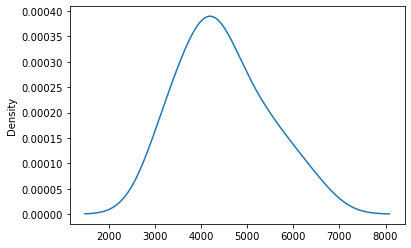

In [81]:
df.groupby("location").get_group("Chikka Tirupathi")["price_per_sqft"].plot(kind="kde")

In [82]:
df.head(2)

location  bhk  total_sqft  bath  balcony   price  \
0  Electronic City Phase II  2.0      1056.0   2.0      1.0   39.07   
1          Chikka Tirupathi  4.0      2600.0   5.0      3.0  120.00   

   price_per_sqft  
0     3699.810606  
1     4615.384615

In [83]:
def price_outlier_remover(df):
    new_df = pd.DataFrame()
    for location,sub_df in df.groupby("location"):
        m = np.mean(sub_df["price_per_sqft"])
        s  = np.std(sub_df["price_per_sqft"])
        temp_df = sub_df[(sub_df["price_per_sqft"]>(m-s))&(sub_df["price_per_sqft"]<=(m+s))]
        new_df = pd.concat([new_df,temp_df],ignore_index=True)
    return new_df

In [84]:
df5 = price_outlier_remover(df)

In [85]:
df5.shape

(10109, 7)

In [86]:
df5.tail()

location  bhk  total_sqft  bath  balcony   price  price_per_sqft
10104    other  2.0      1353.0   2.0      2.0  110.00     8130.081301
10105    other  1.0       812.0   1.0      0.0   26.00     3201.970443
10106    other  3.0      1440.0   2.0      2.0   63.93     4439.583333
10107    other  2.0      1075.0   2.0      2.0   48.00     4465.116279
10108    other  4.0      3600.0   5.0      3.0  400.00    11111.111111

<AxesSubplot:ylabel='Density'>

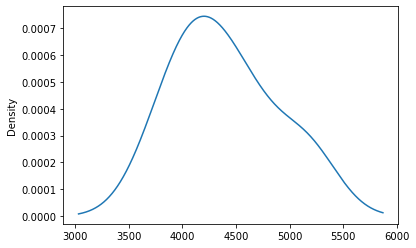

In [87]:
df5.groupby("location").get_group("Chikka Tirupathi")["price_per_sqft"].plot(kind="kde")

In [67]:
df5.head()

location  bhk  total_sqft  bath  balcony  price  price_per_sqft
0  1st Phase JP Nagar  4.0      2825.0   4.0      3.0  250.0     8849.557522
1  1st Phase JP Nagar  3.0      1875.0   3.0      1.0  167.0     8906.666667
2  1st Phase JP Nagar  3.0      2065.0   4.0      1.0  210.0    10169.491525
3  1st Phase JP Nagar  3.0      2024.0   3.0      2.0  157.0     7756.916996
4  1st Phase JP Nagar  3.0      2059.0   3.0      2.0  225.0    10927.634774

In [90]:
def func(df):
    bhk2 = pd.DataFrame()
    bhk3 =pd.DataFrame()
    for location,sub_df in df.groupby("location"):
        bhk2 = pd.concat([bhk2,sub_df[sub_df["bhk"]==2]])
        bhk3 = pd.concat([bhk3,sub_df[sub_df["bhk"]==3]])
        plt.figure(figsize=(10,8))
        plt.scatter(bhk2["total_sqft"],bhk2["price"],label = "2BHK",marker="+",s=100,color ="red")
        plt.scatter(bhk3["total_sqft"],bhk3["price"],label = "3BHK",s=100)
        plt.xlabel = "total_sqft"
        plt.ylable = "price"
        plt.legend()
        plt.title(location)
        plt.show()

        

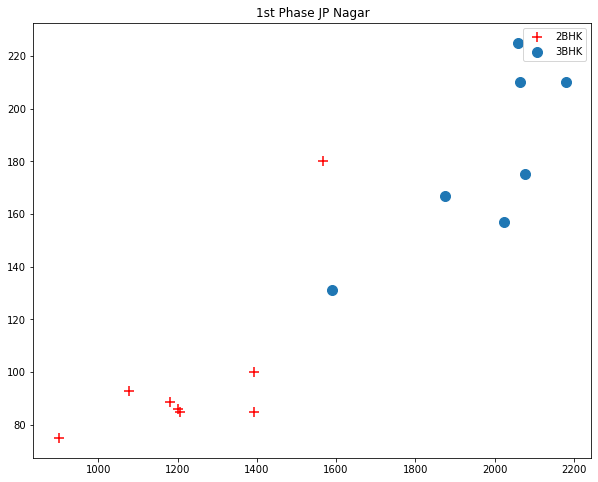

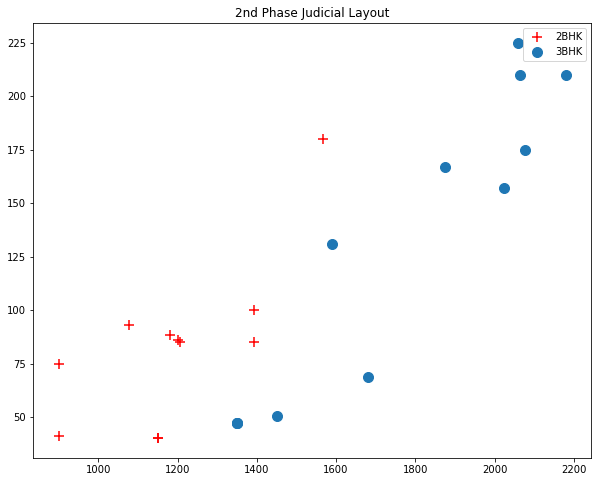

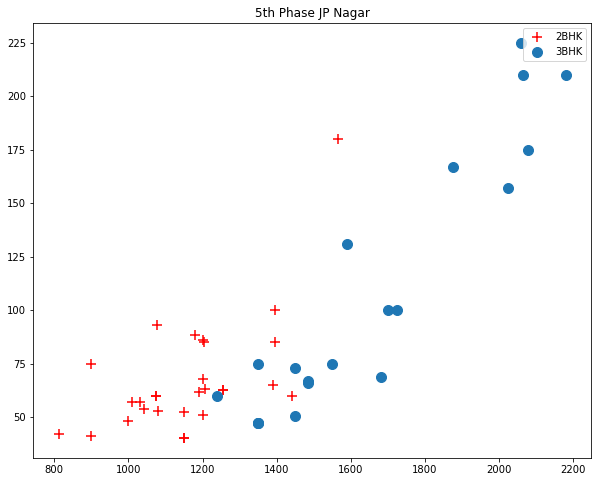

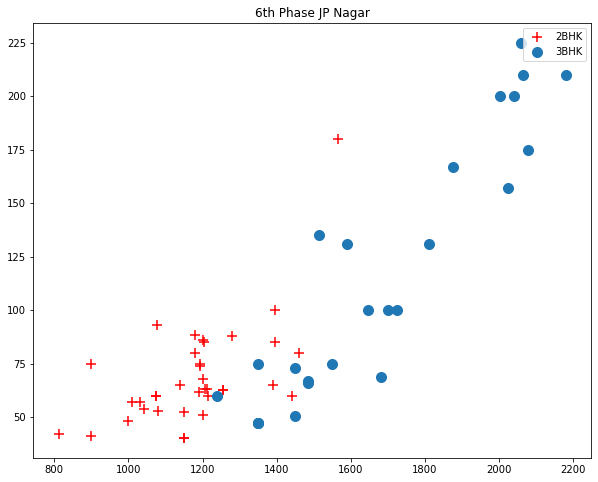

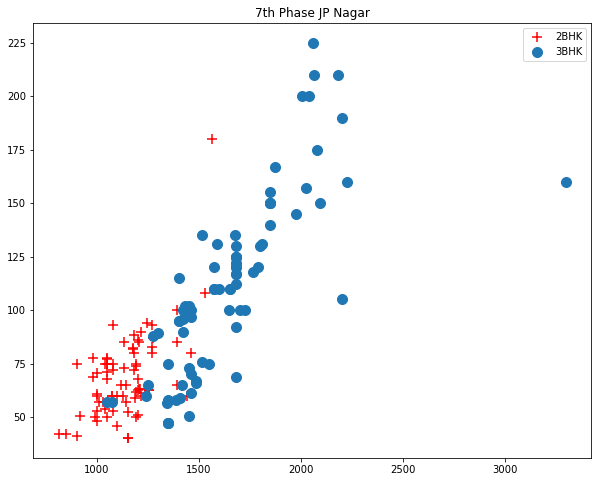

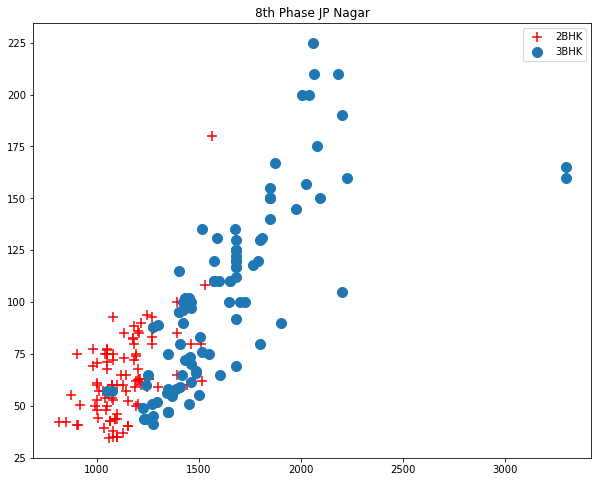

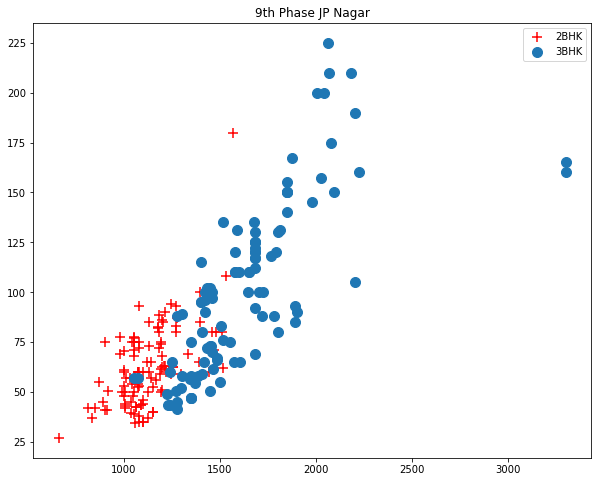

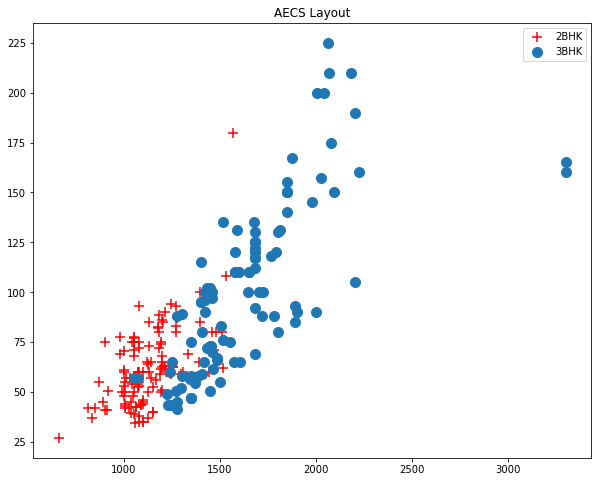

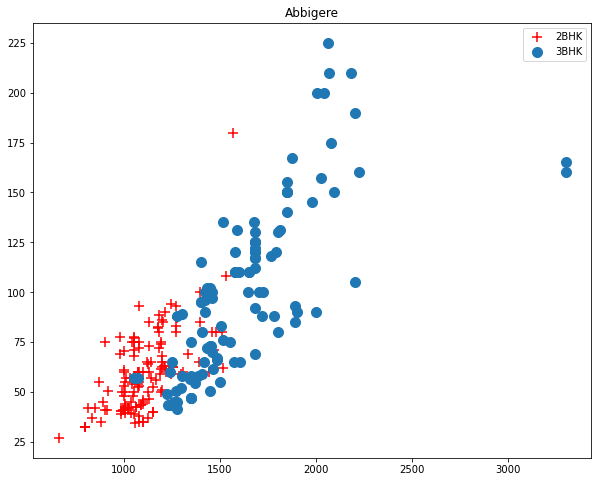

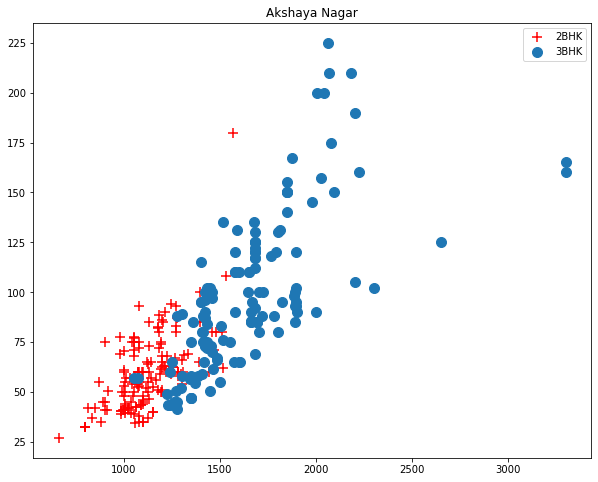

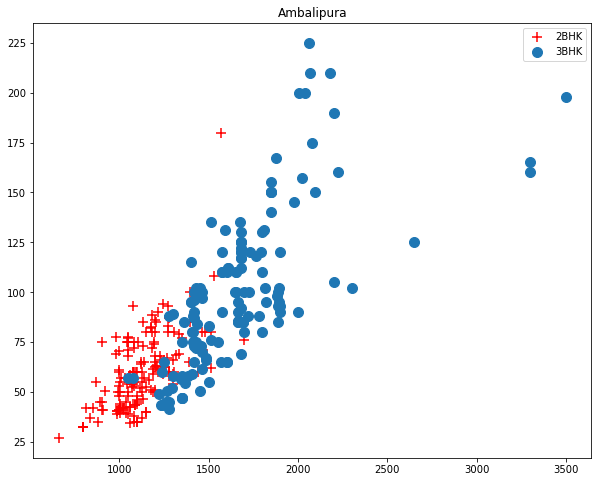

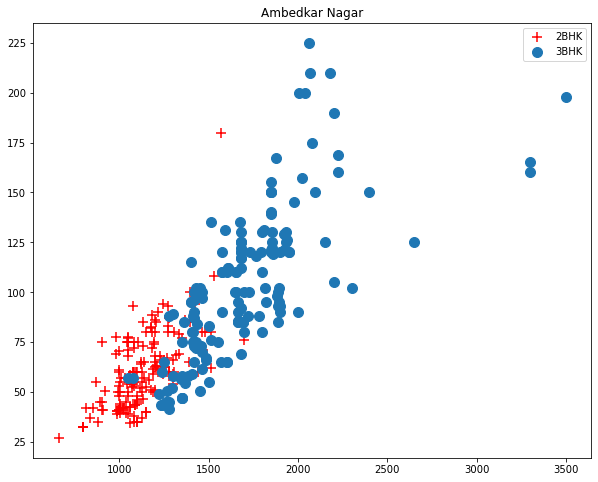

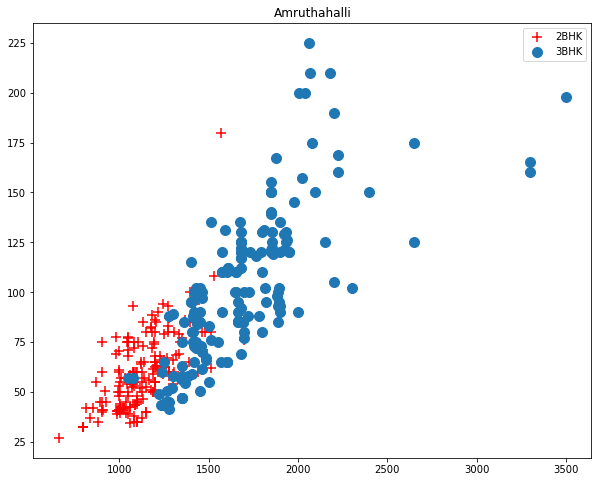

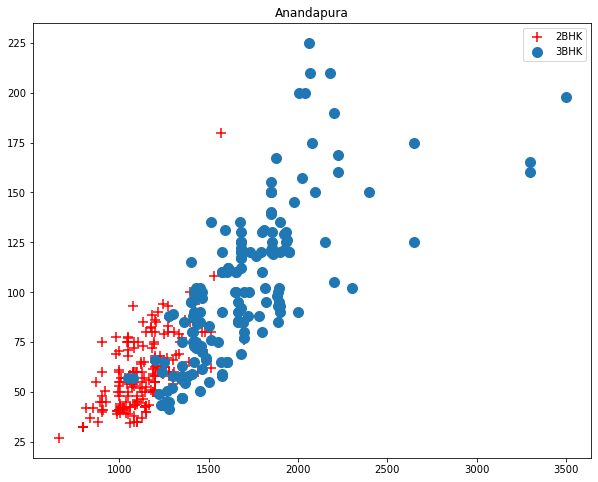

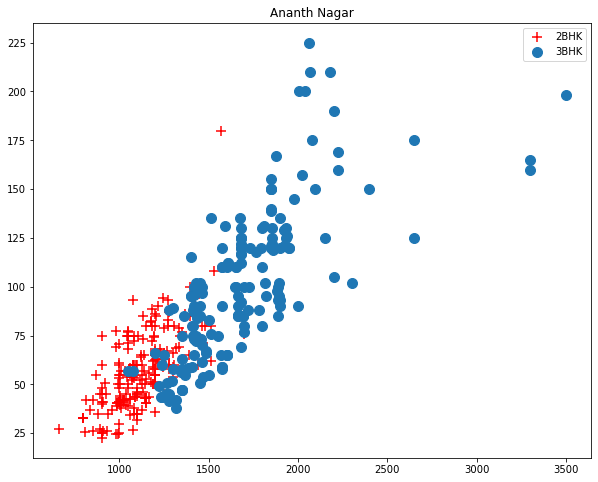

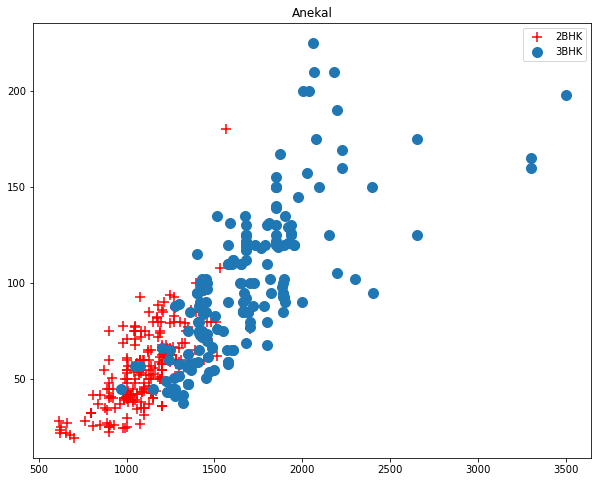

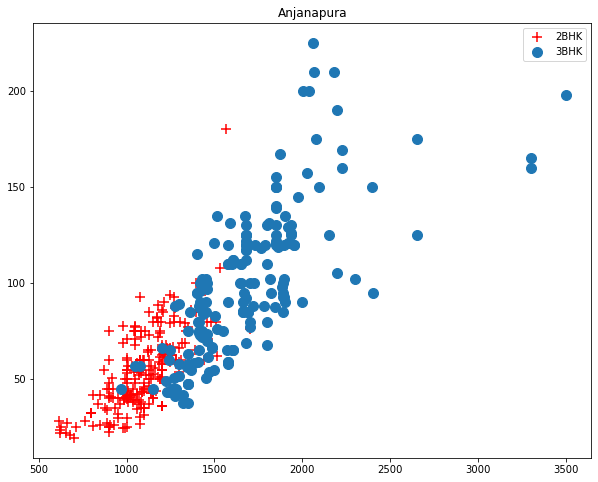

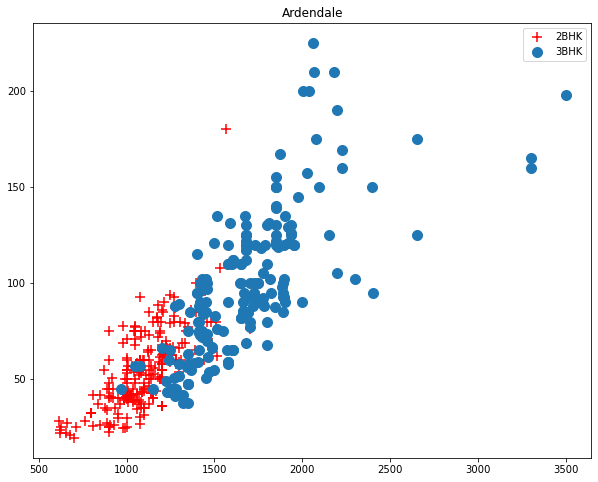

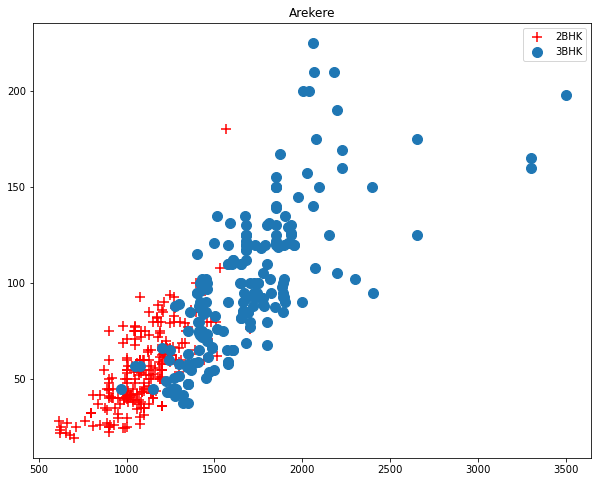

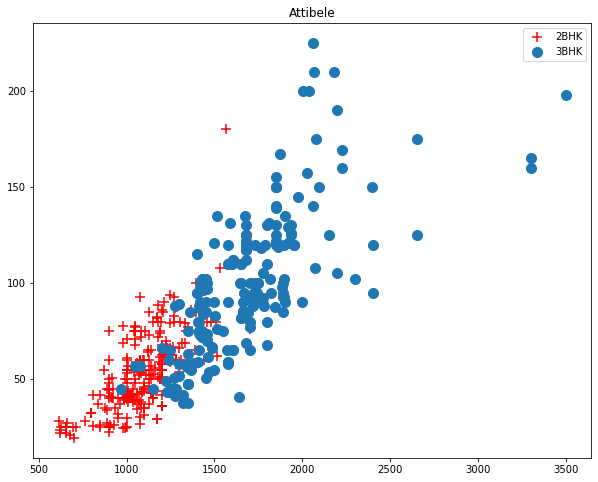

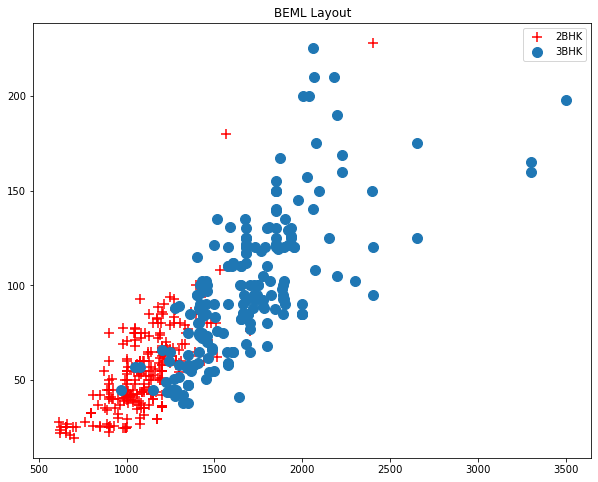

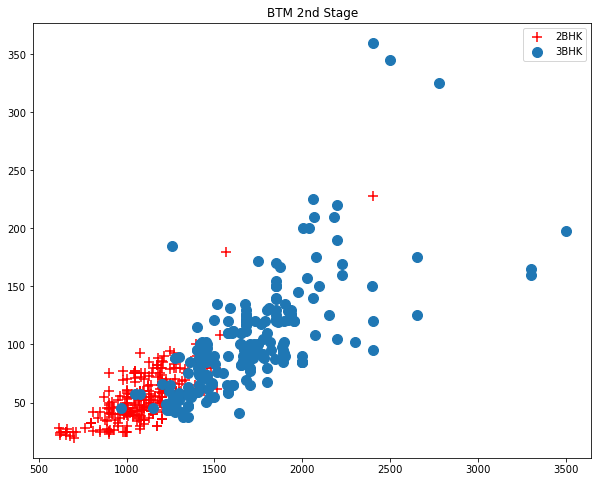

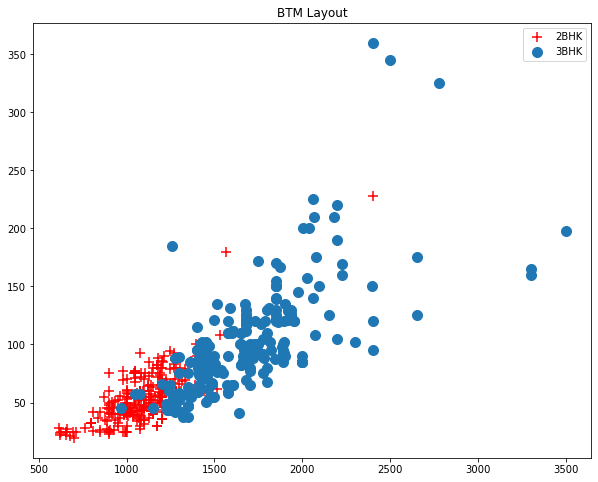

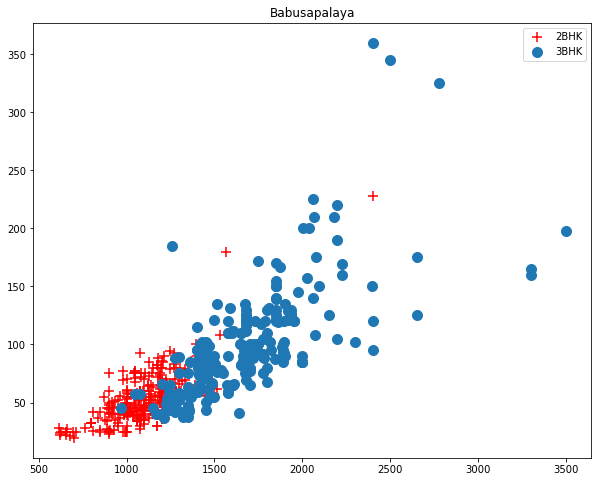

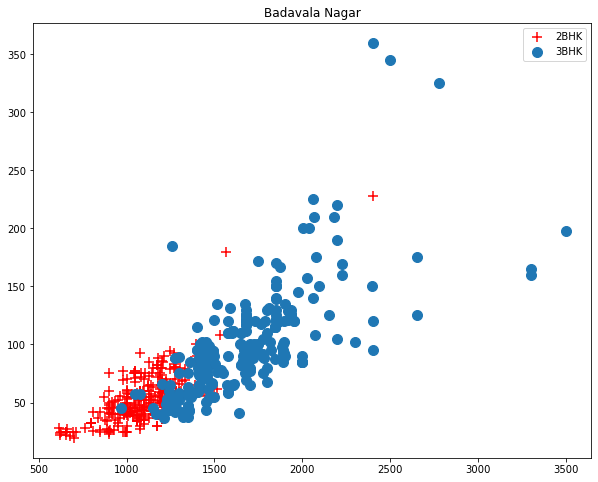

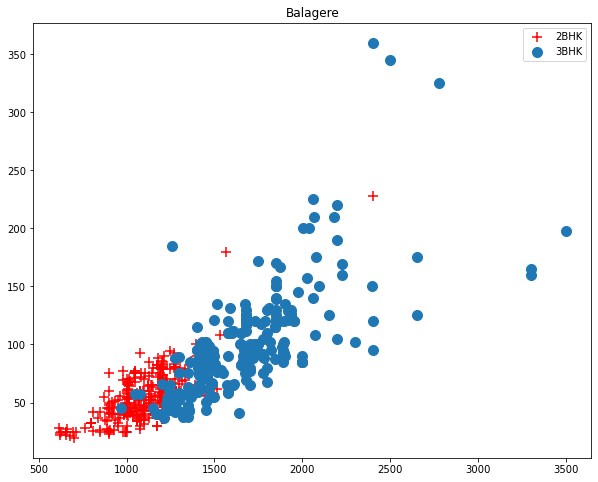

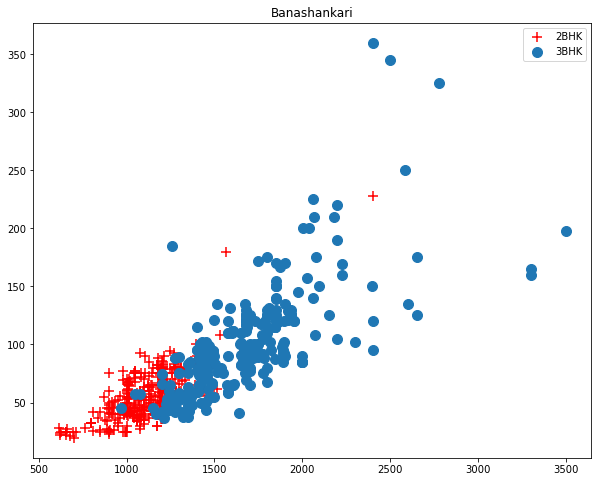

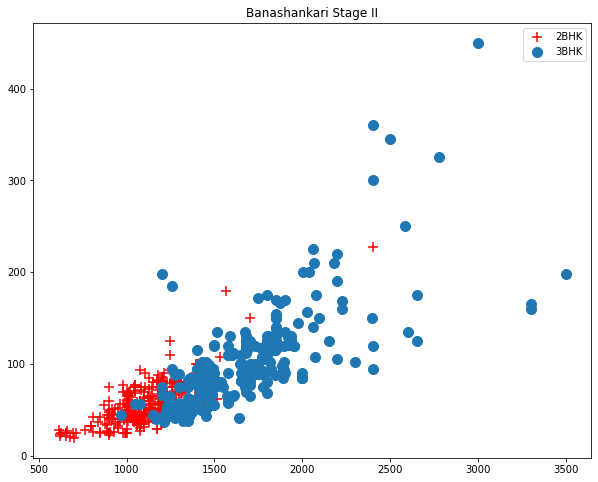

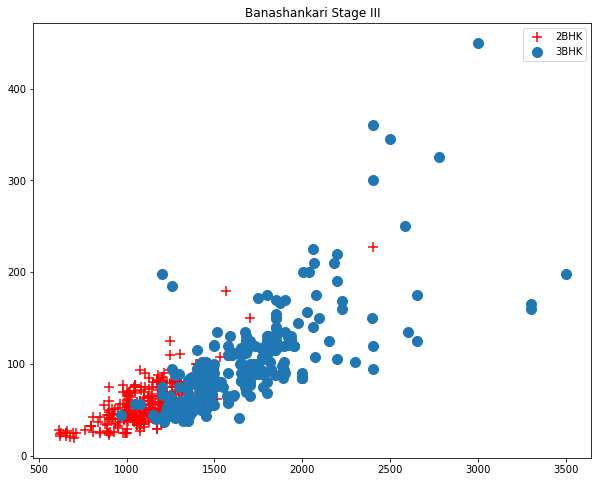

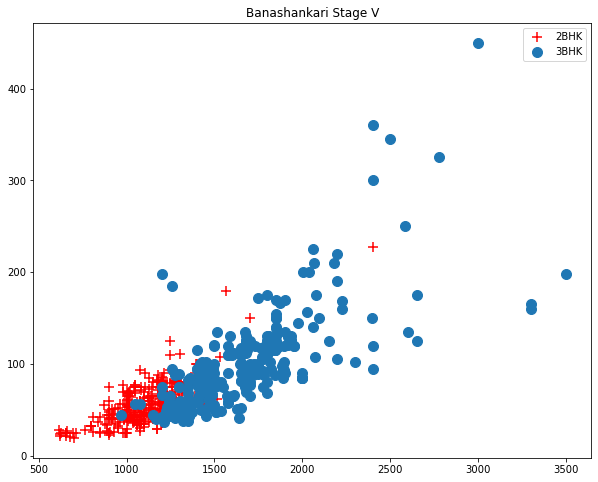

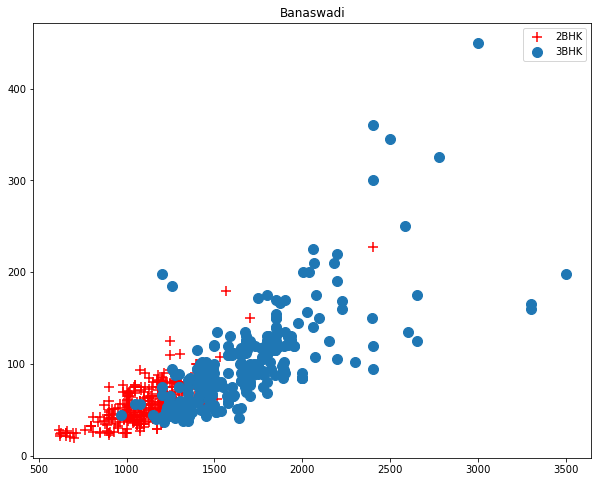

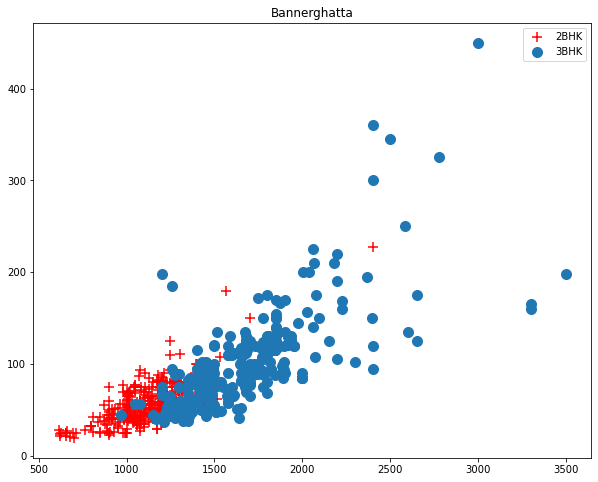

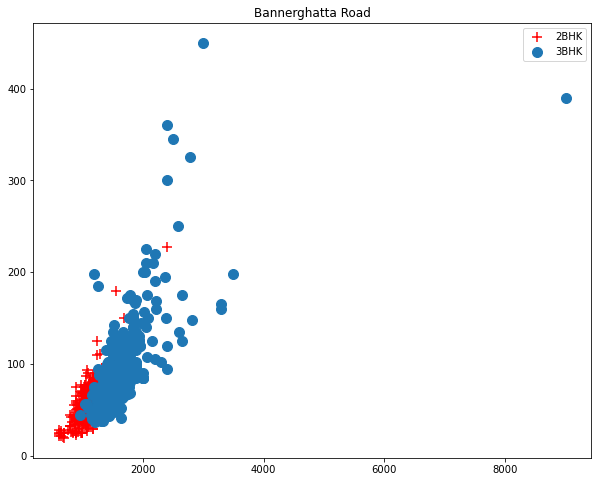

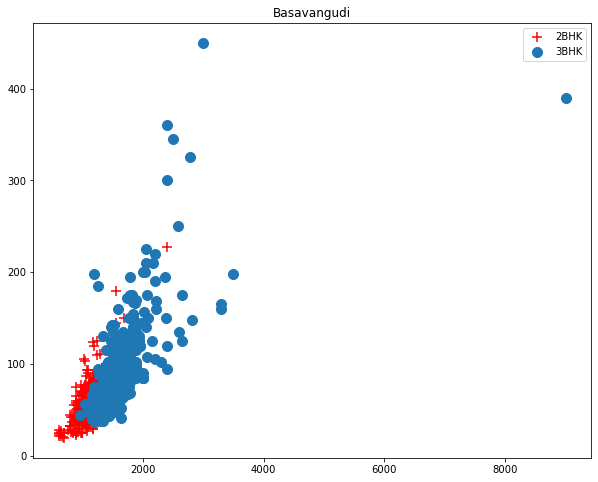

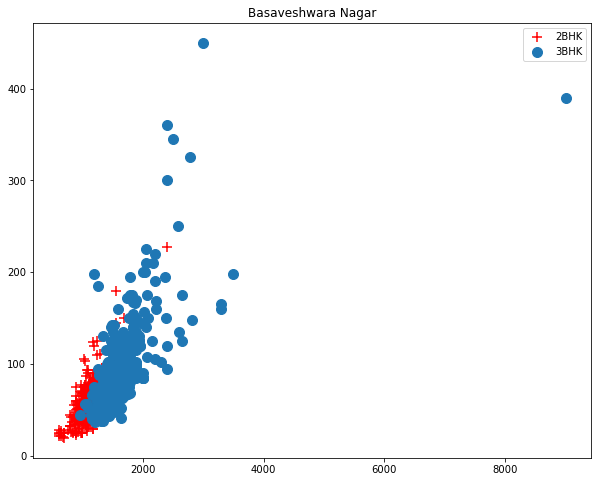

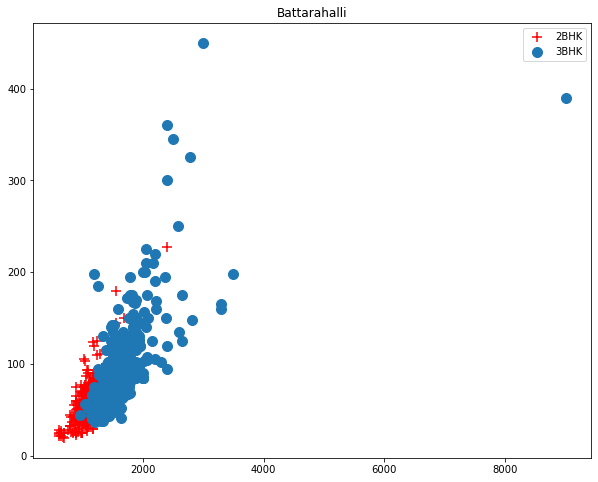

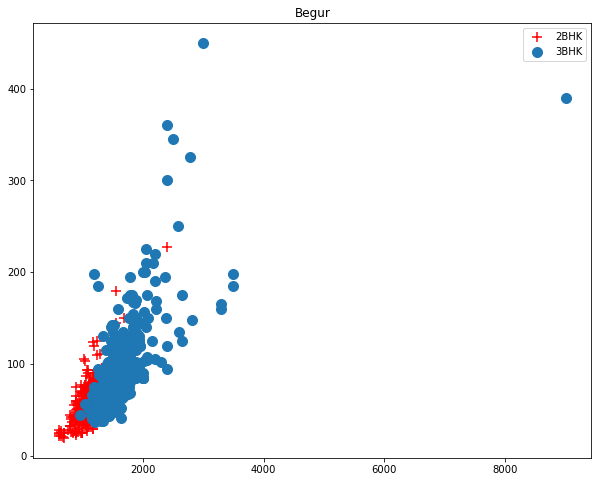

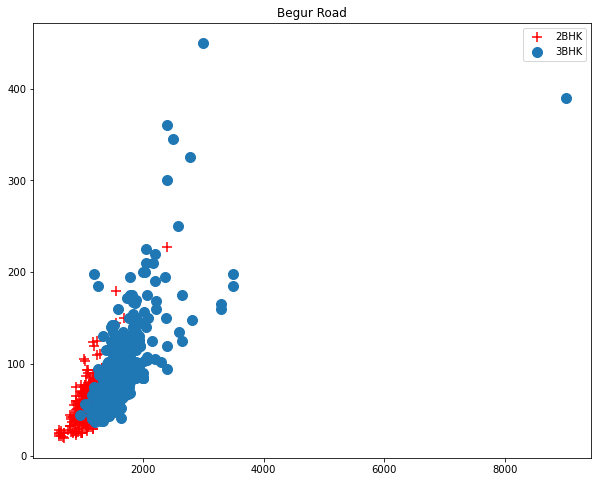

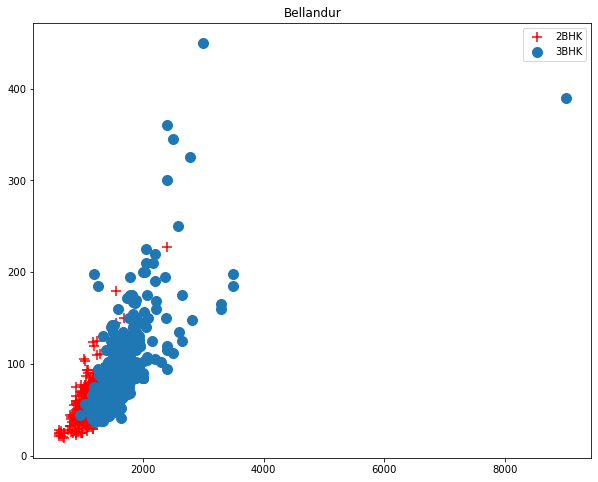

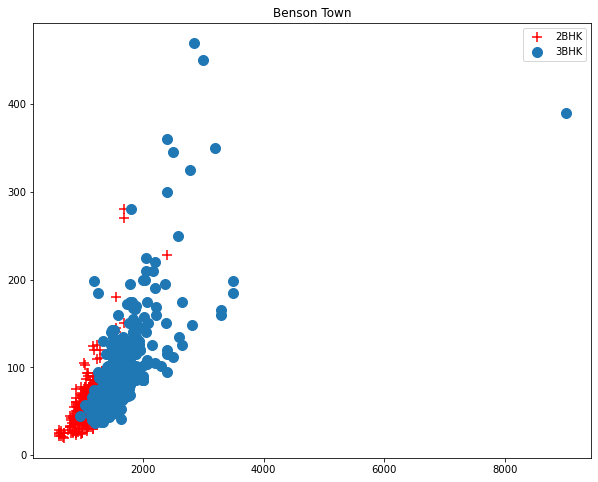

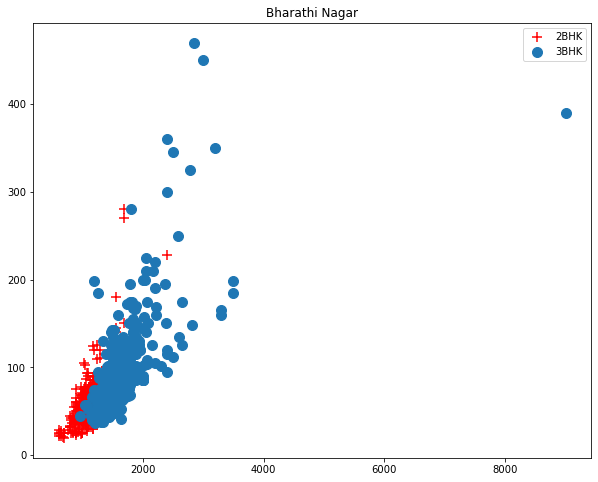

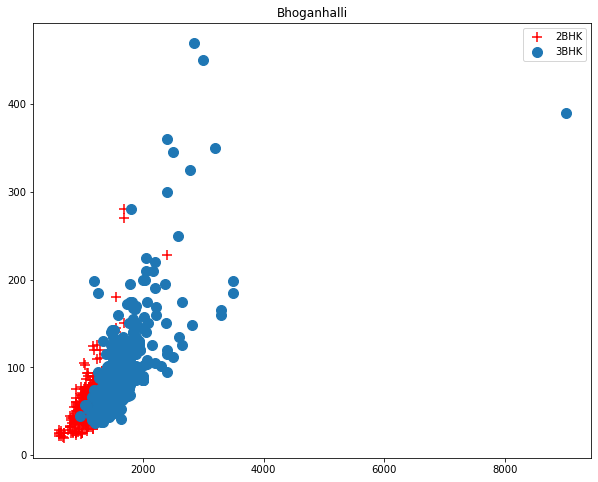

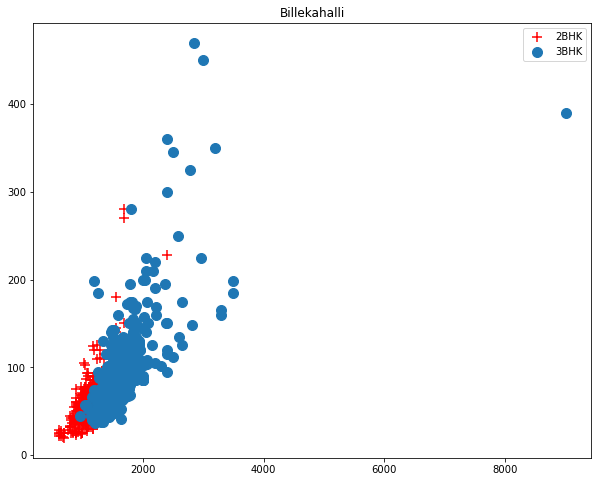

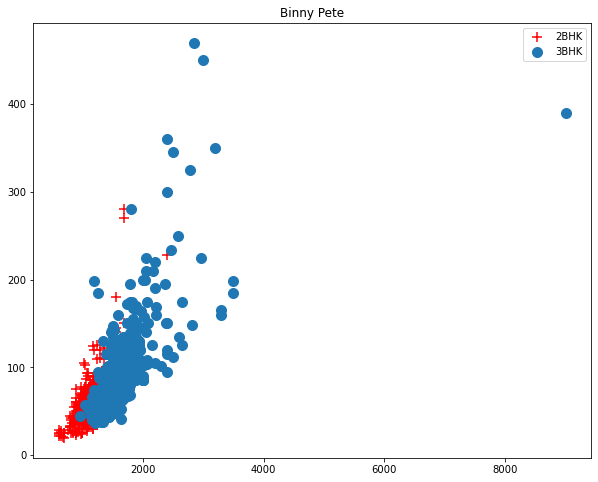

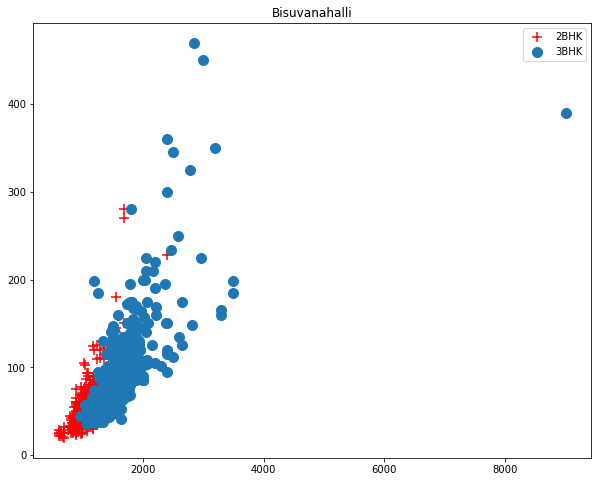

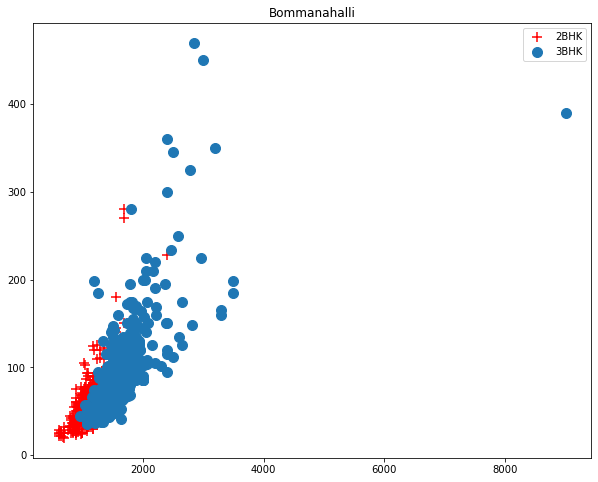

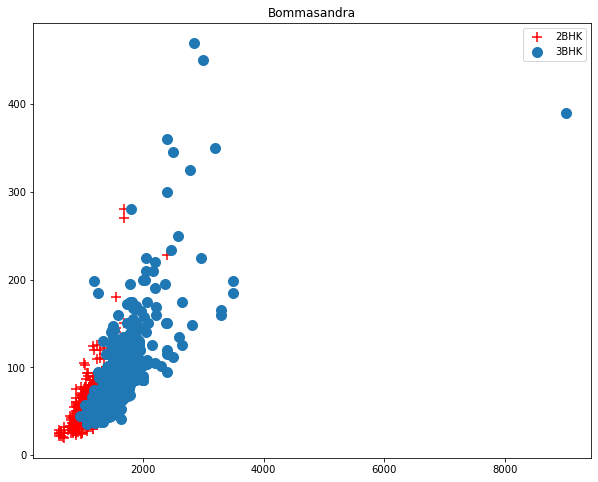

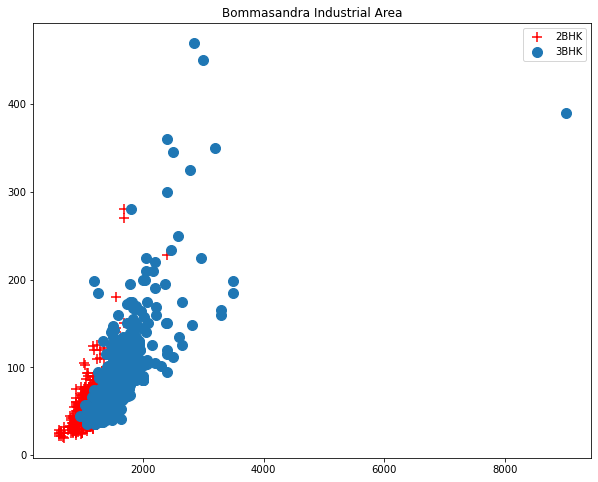

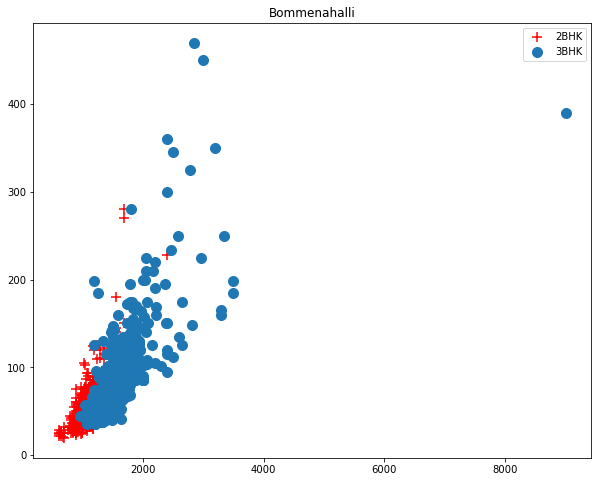

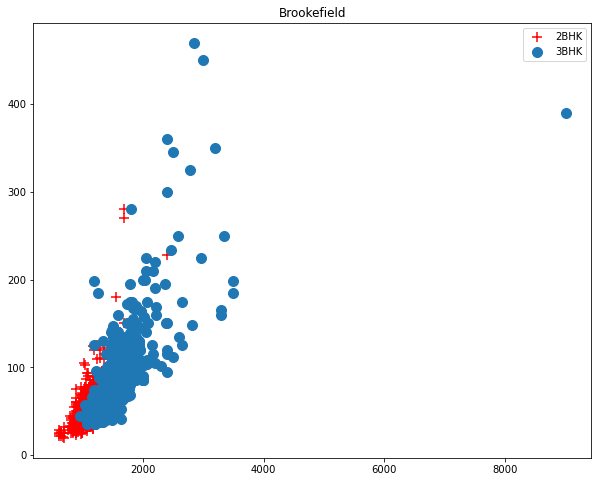

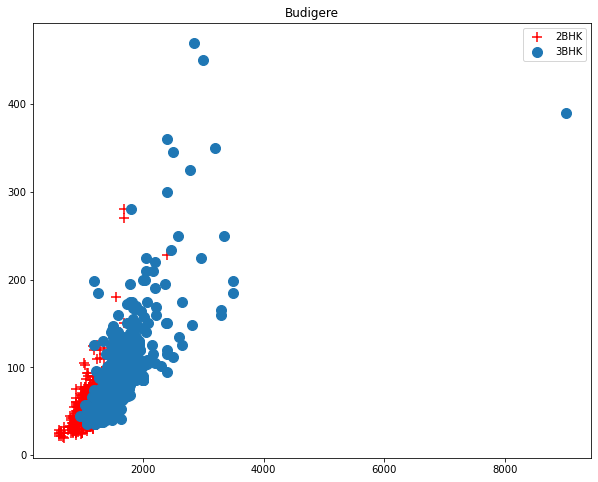

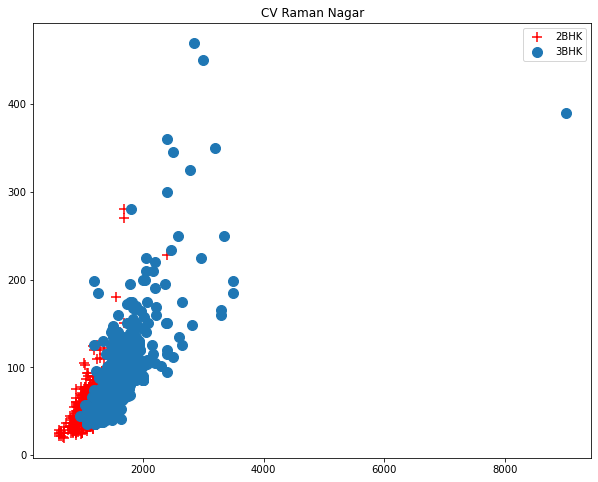

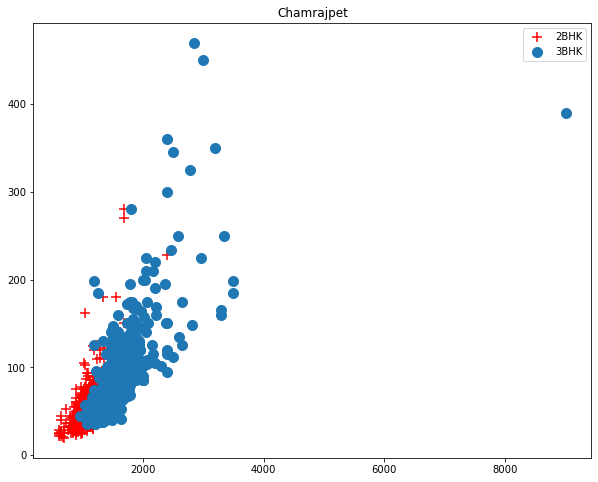

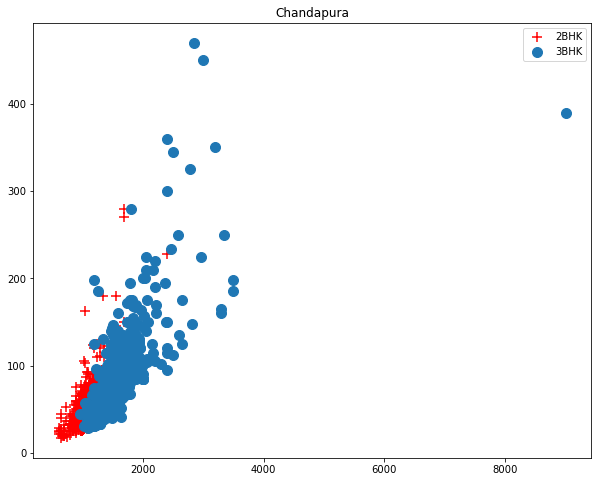

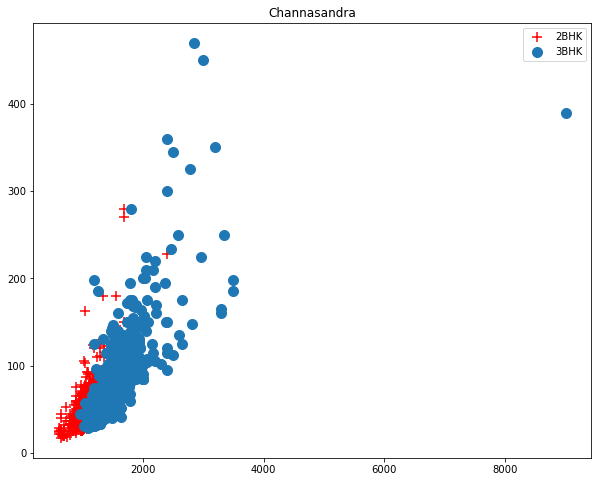

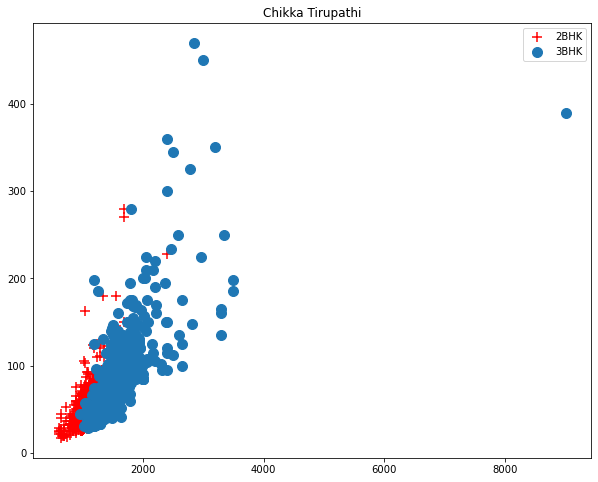

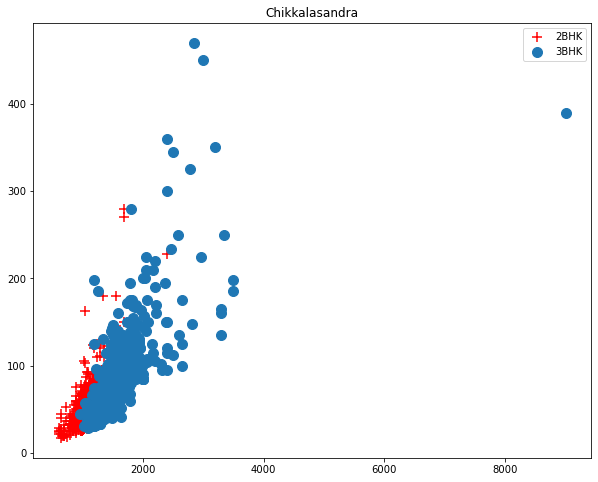

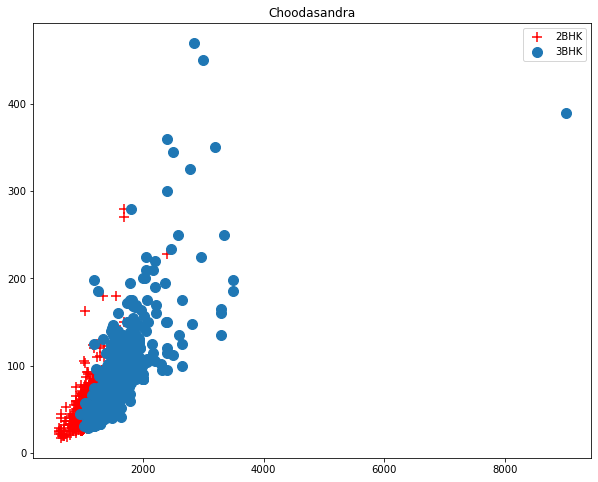

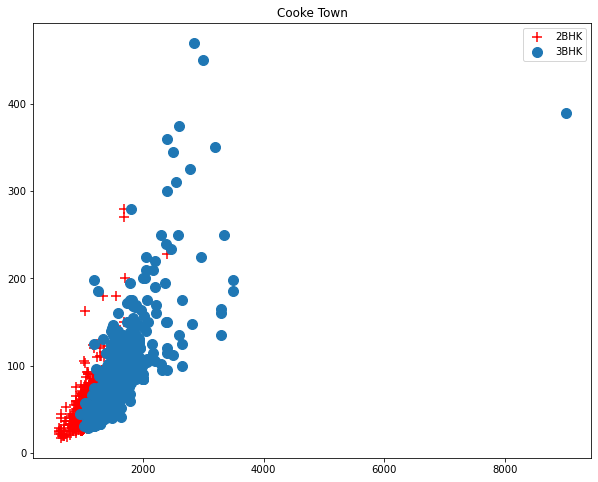

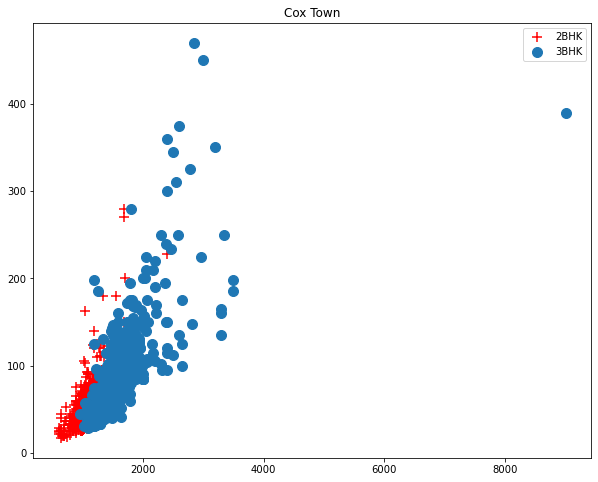

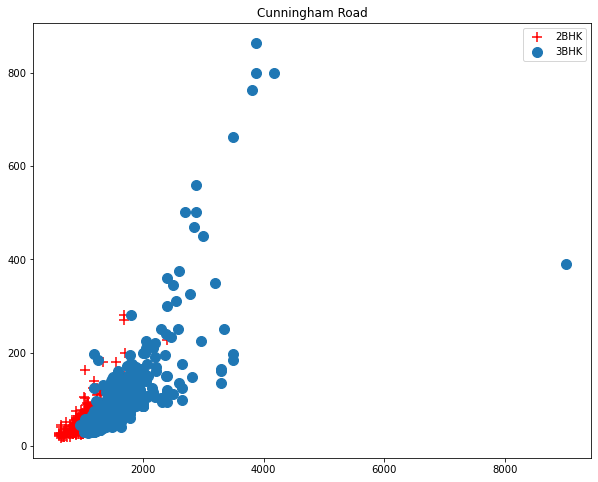

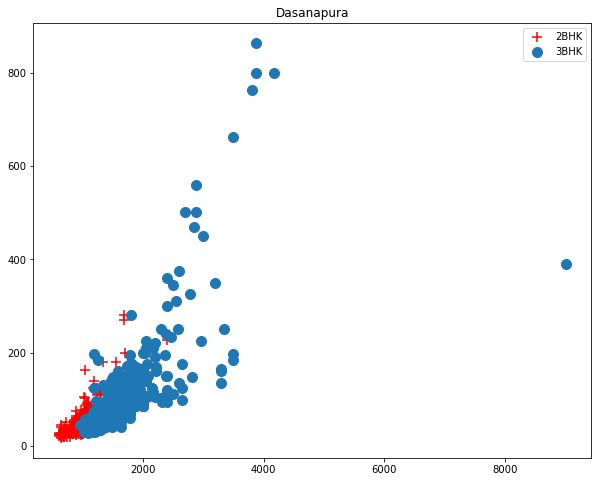

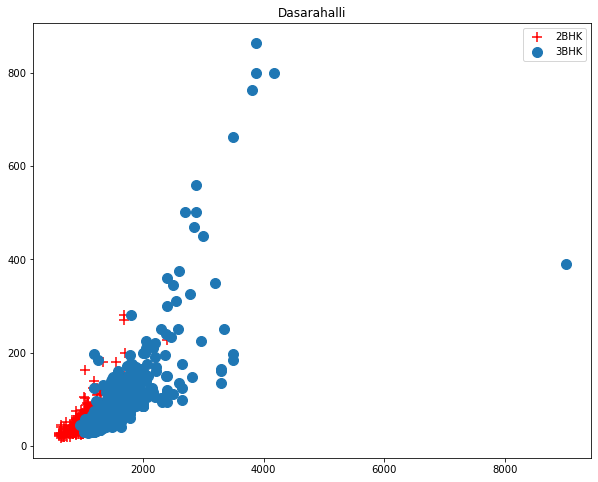

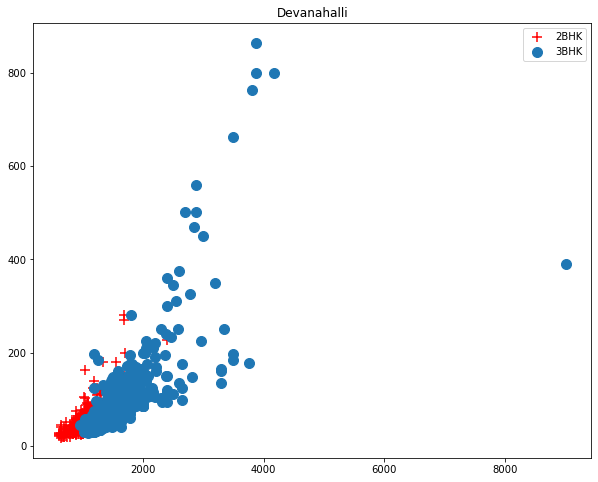

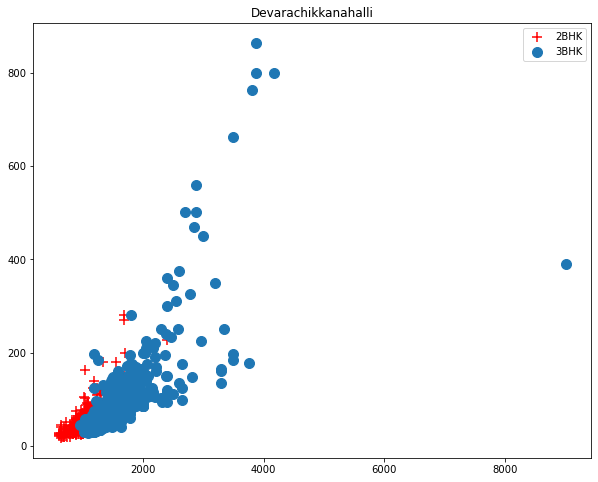

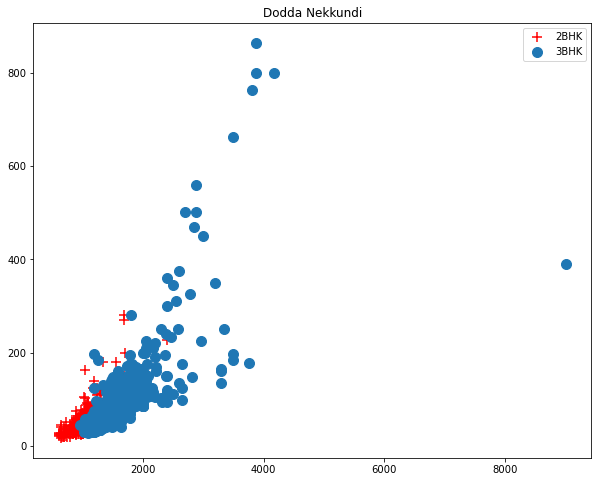

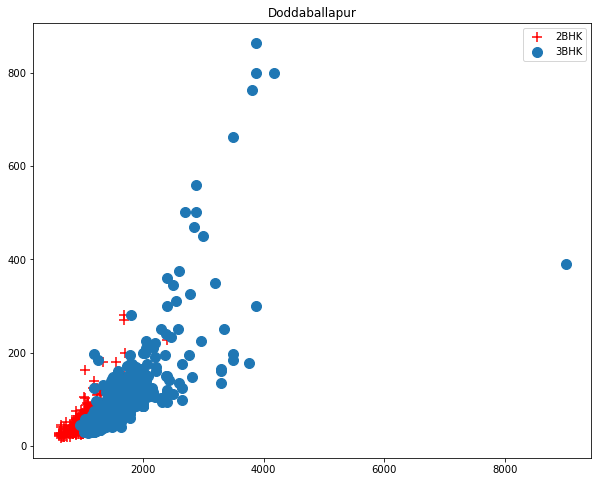

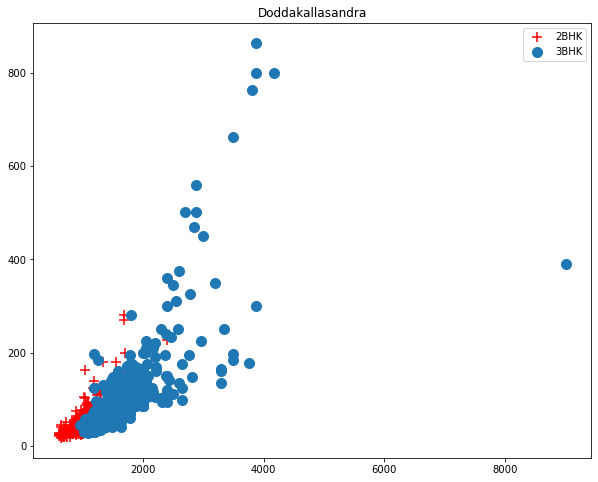

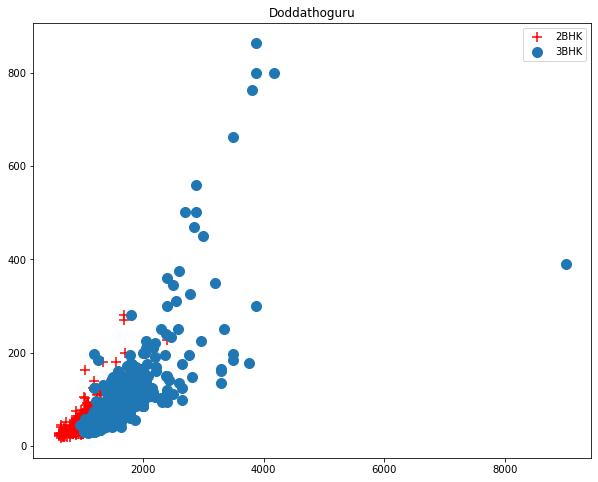

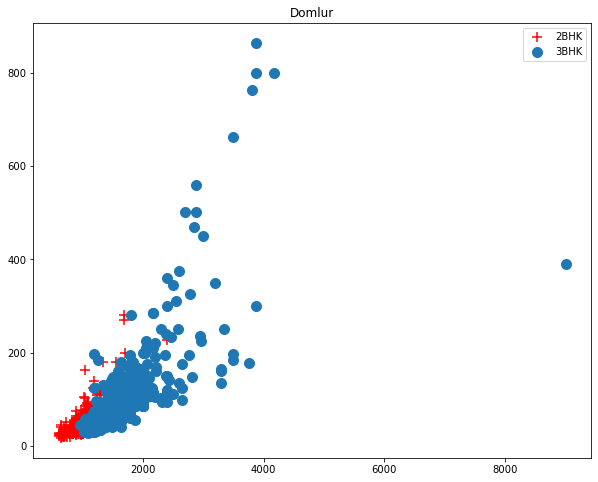

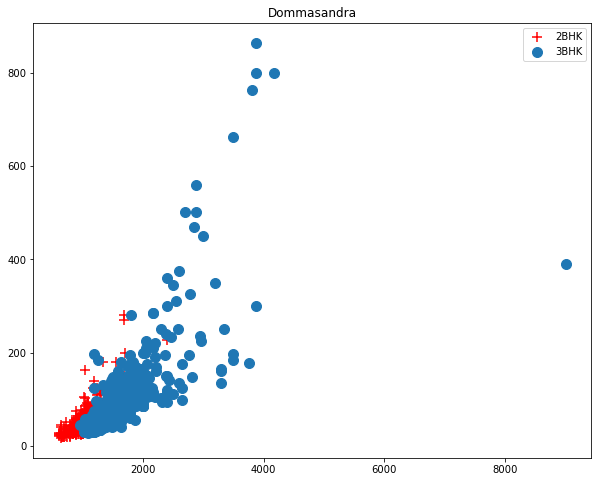

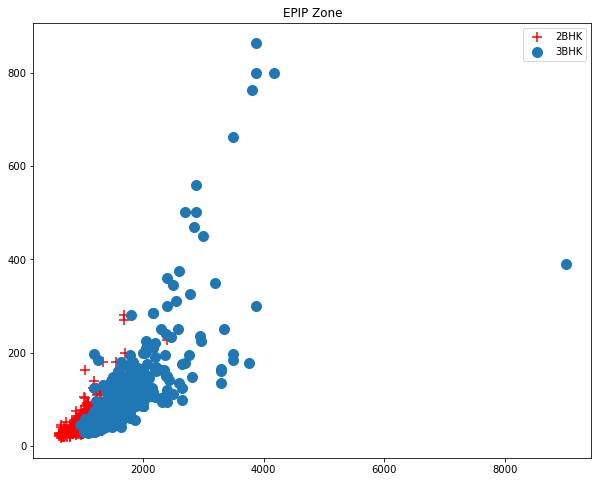

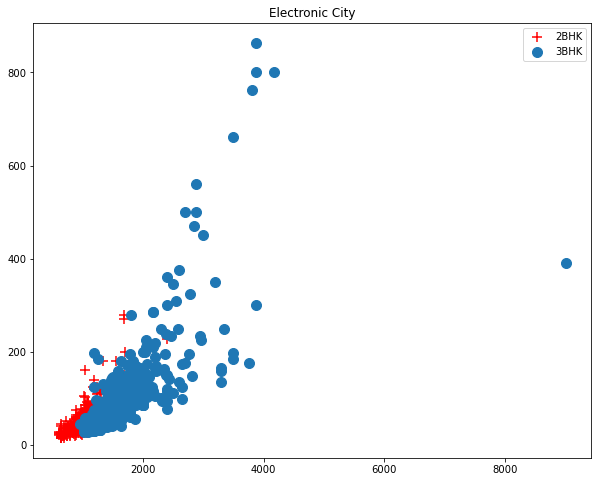

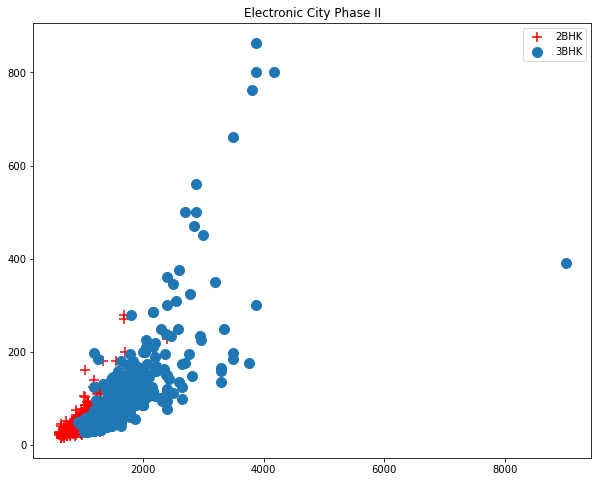

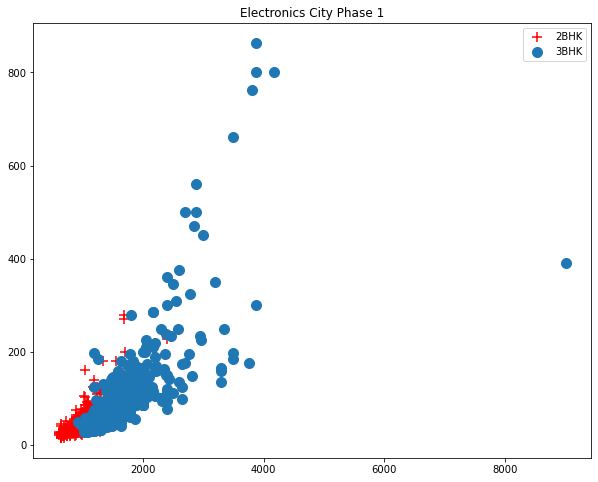

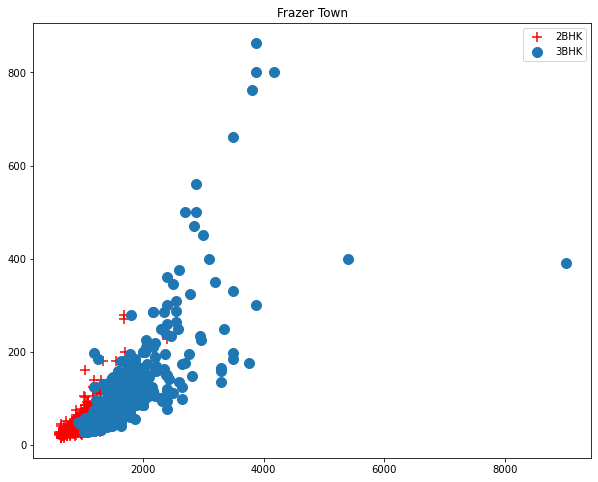

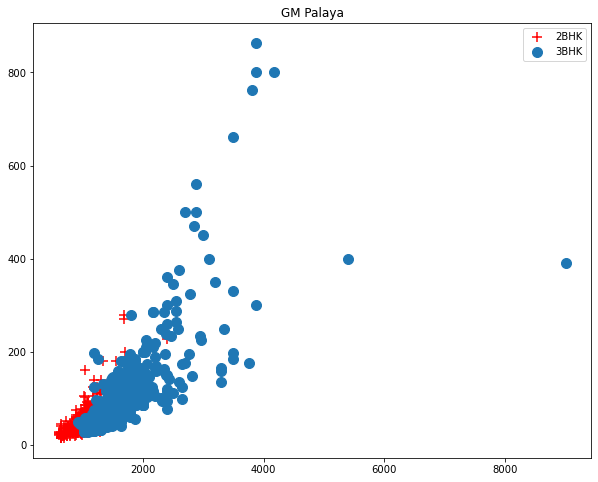

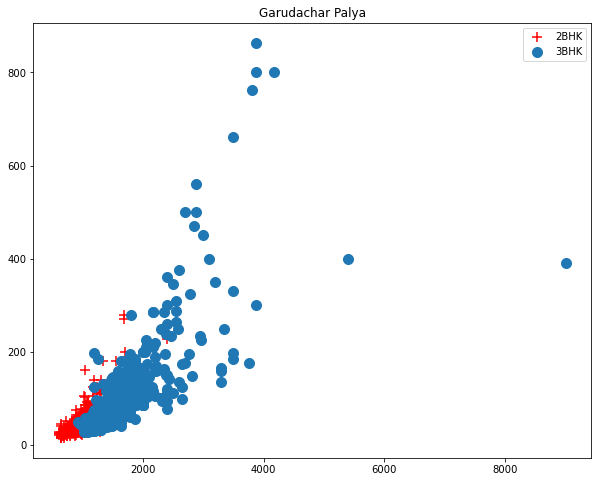

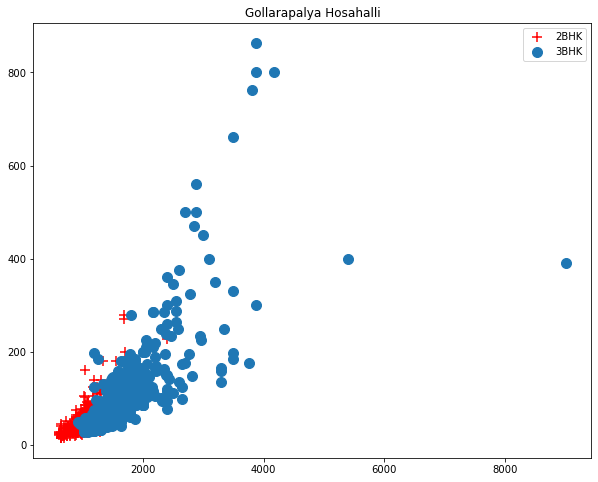

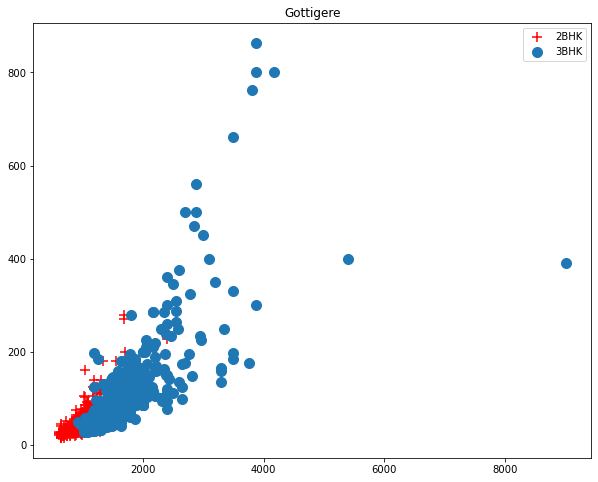

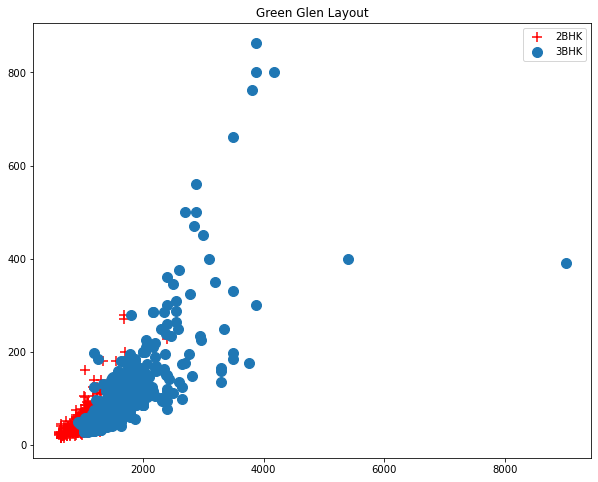

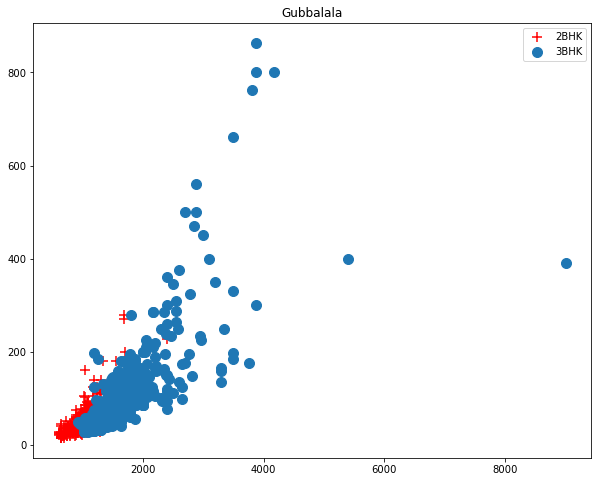

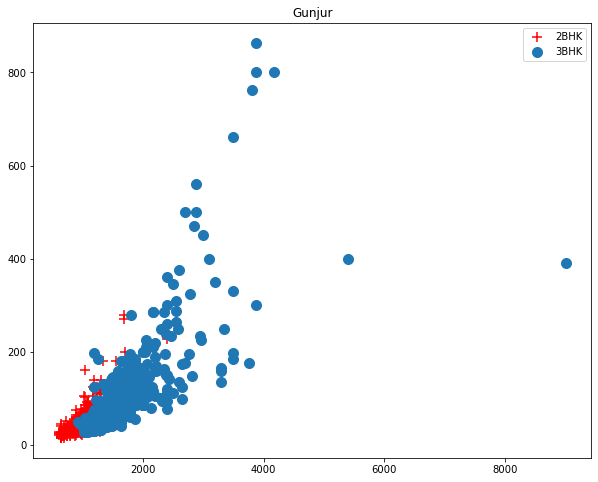

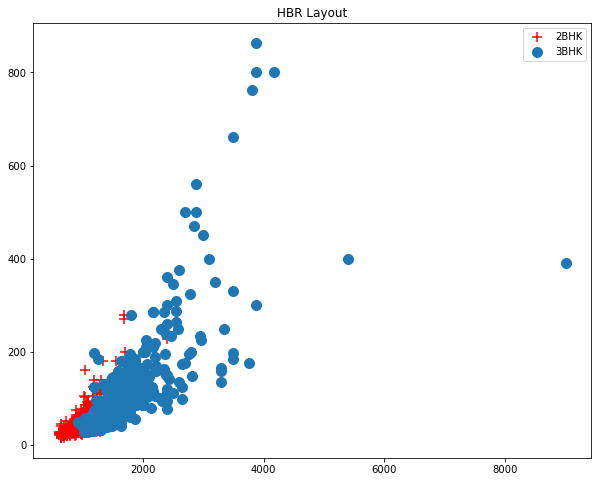

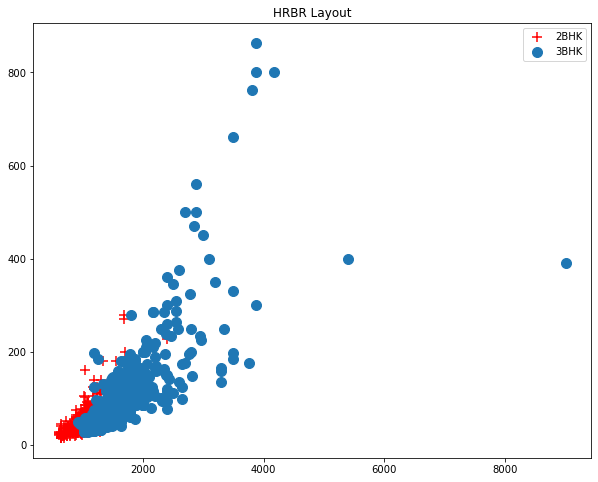

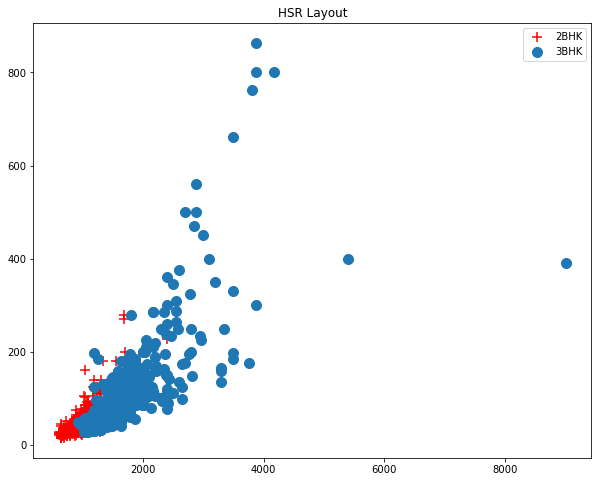

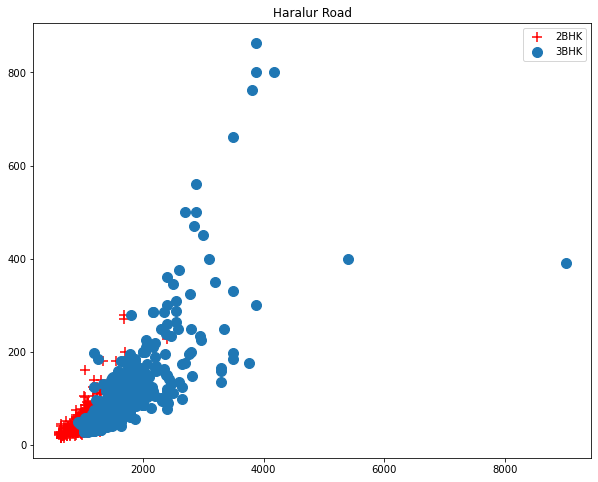

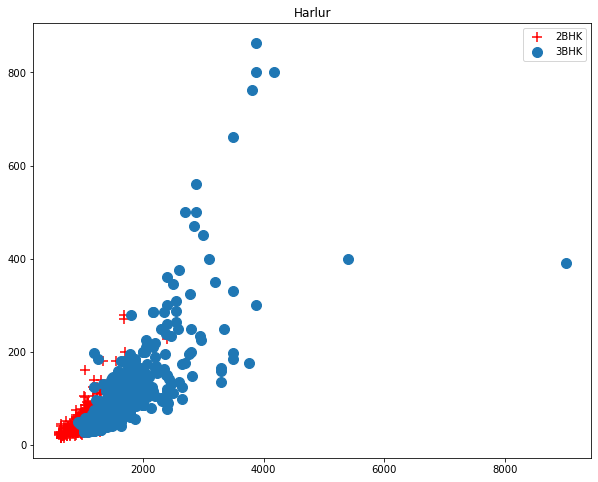

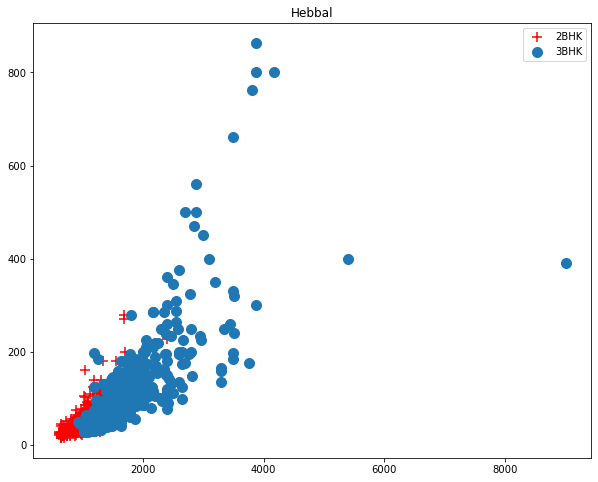

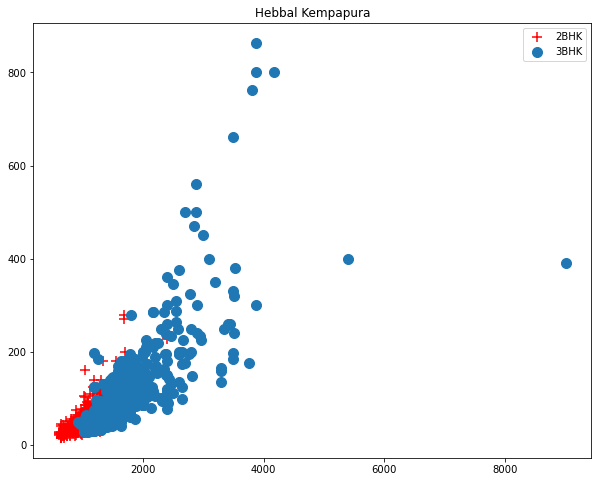

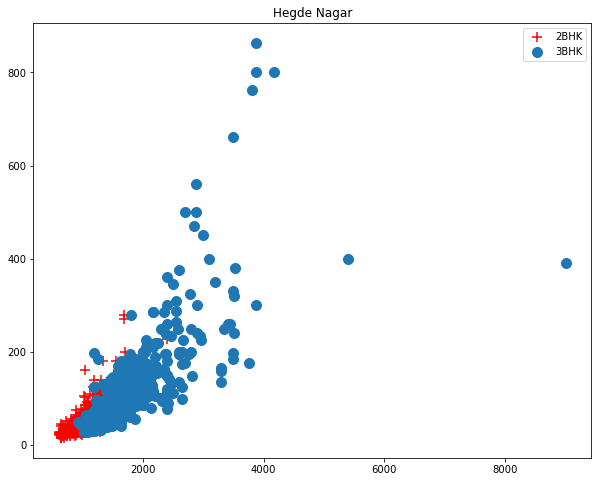

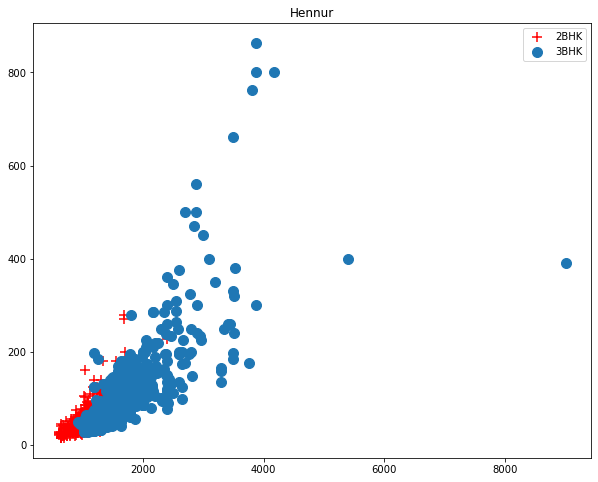

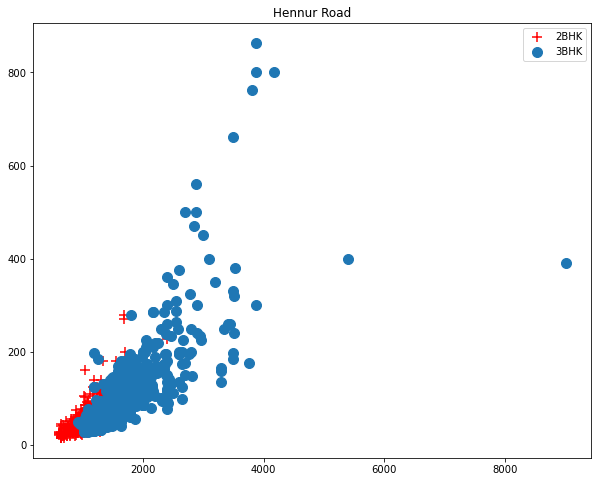

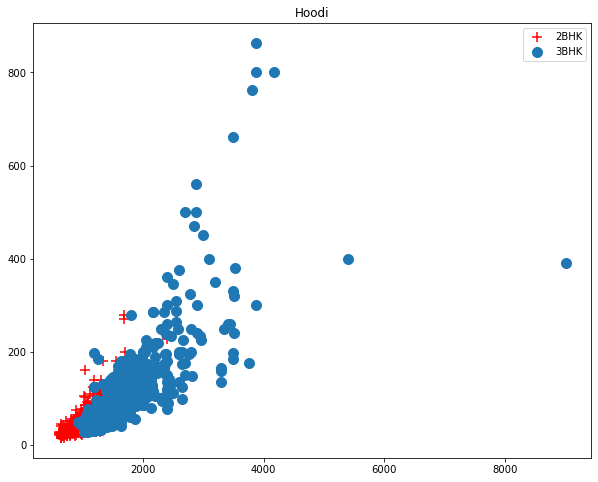

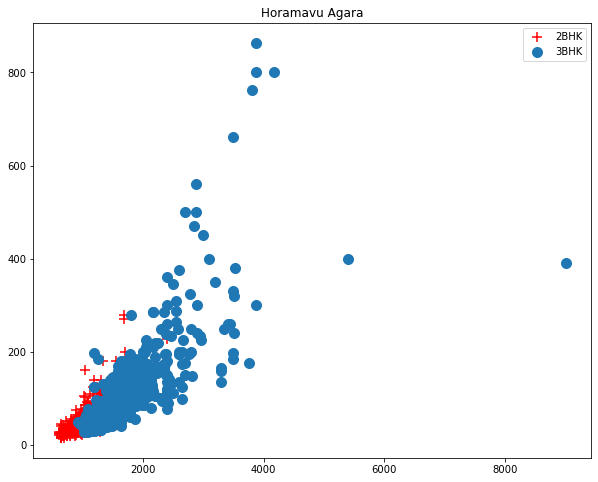

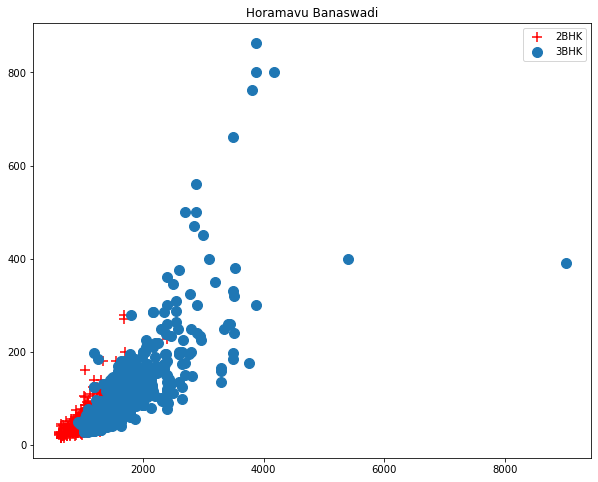

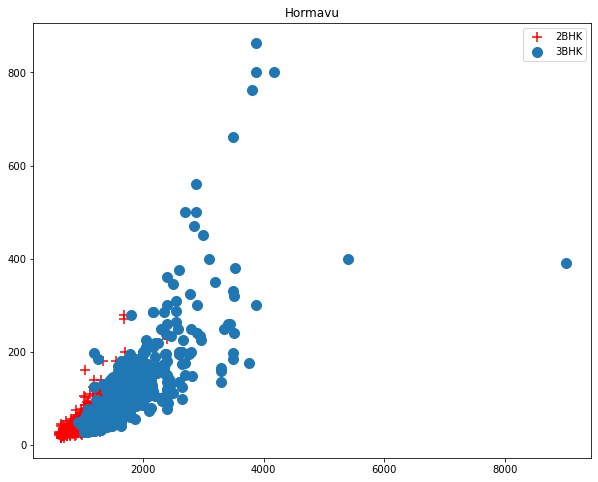

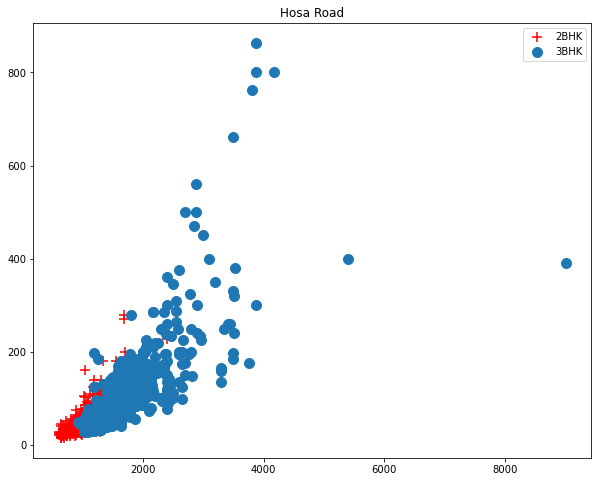

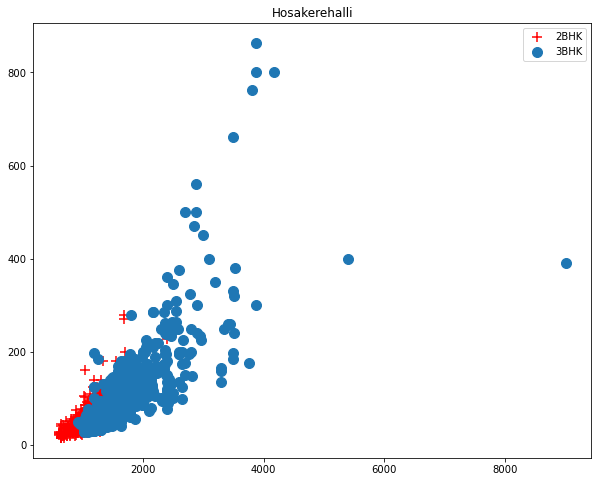

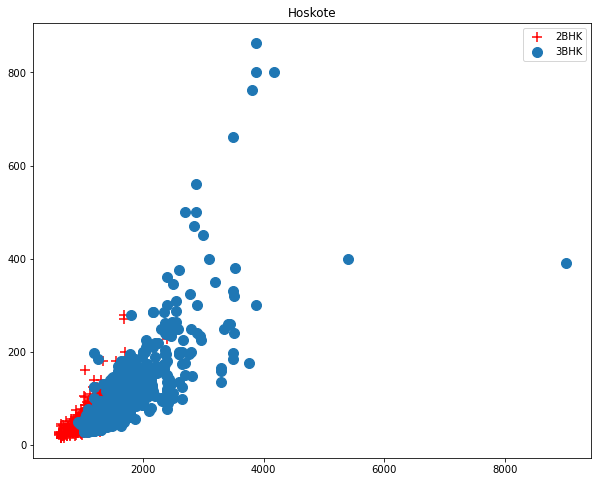

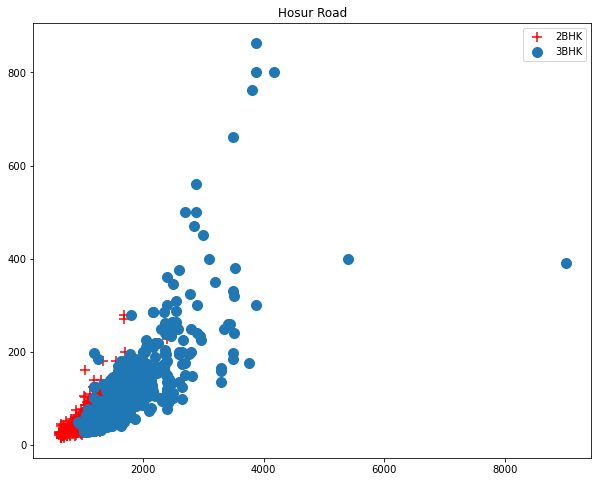

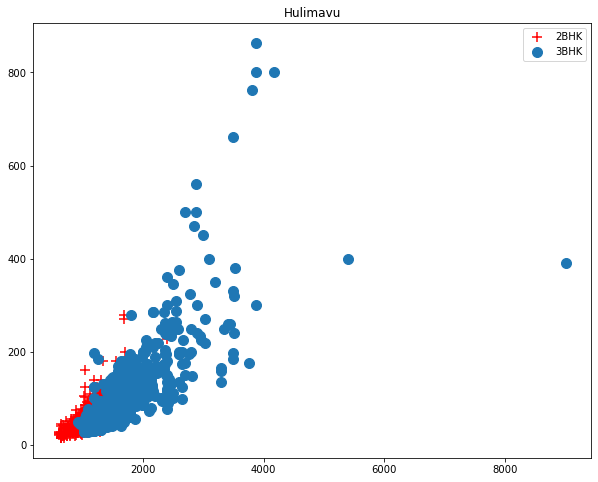

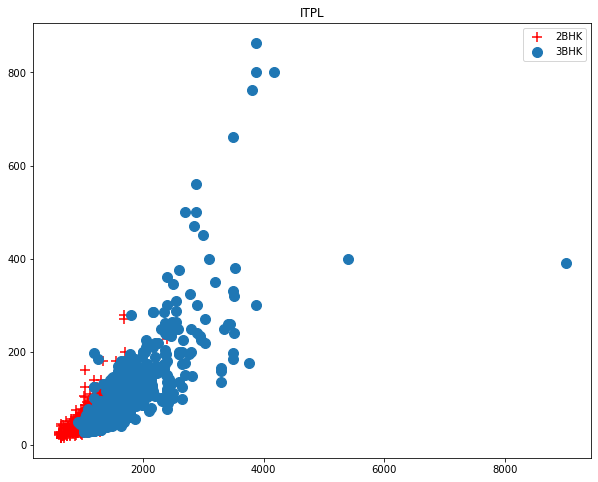

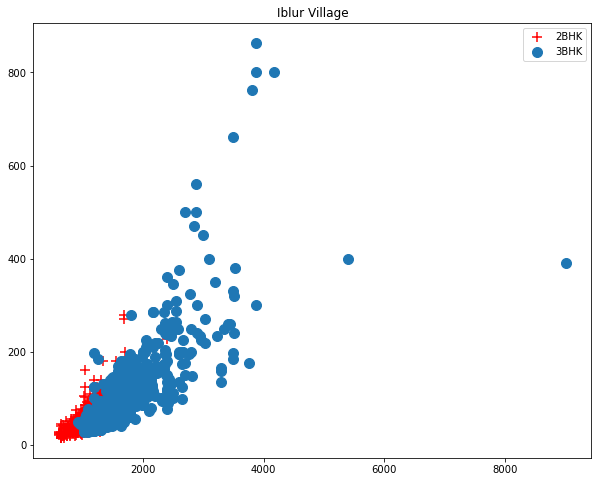

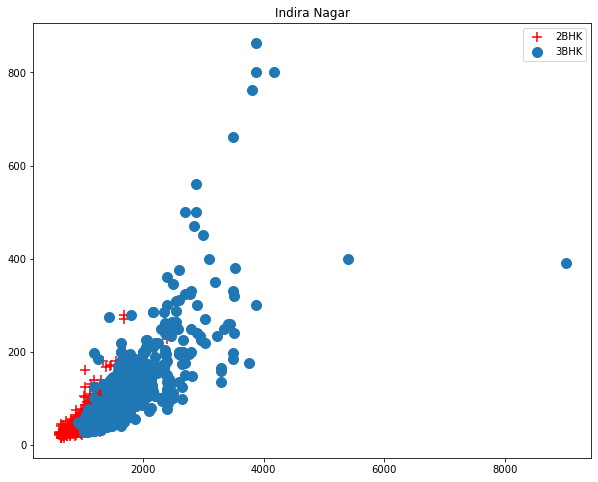

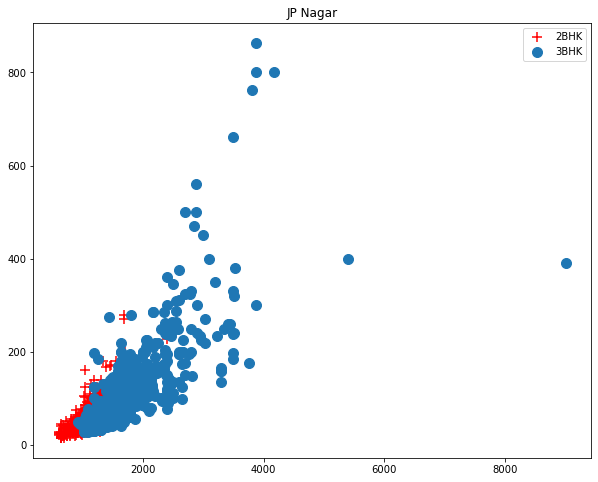

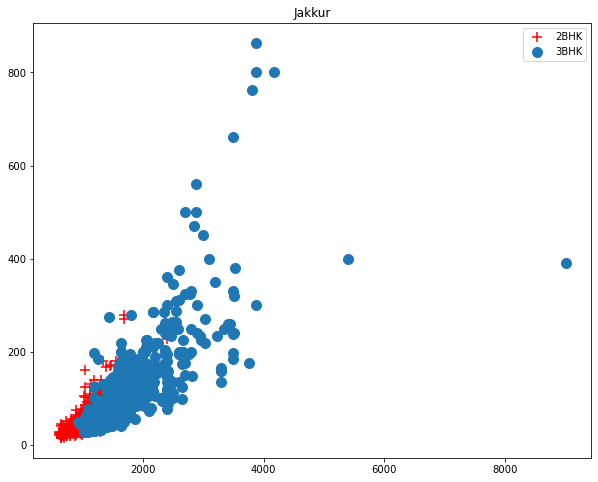

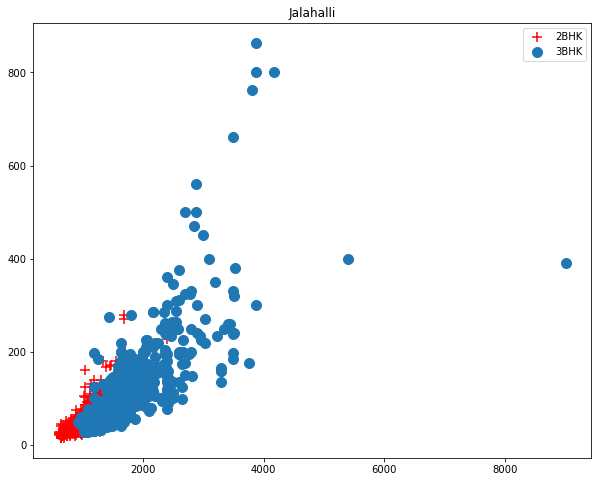

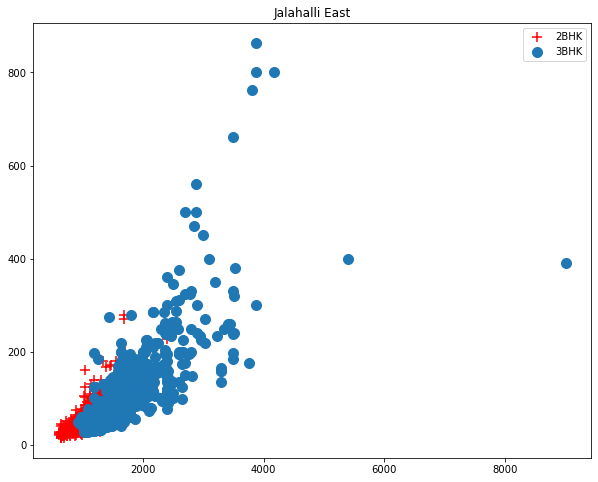

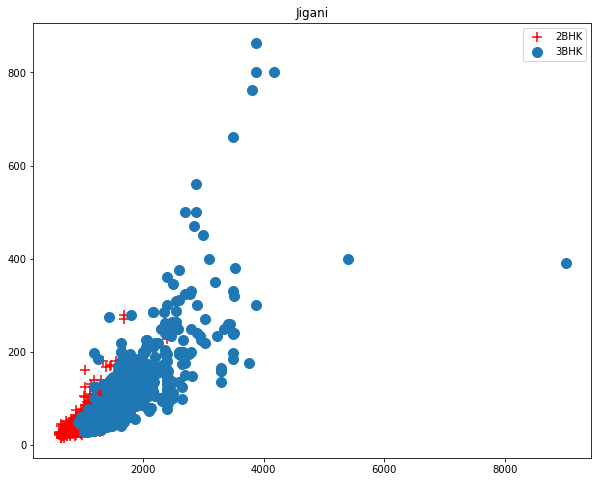

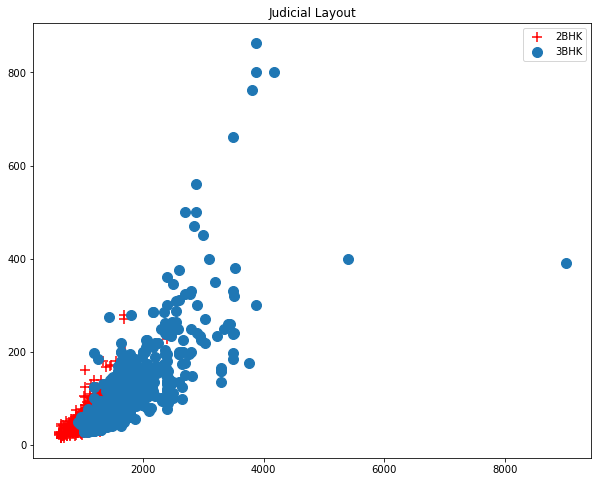

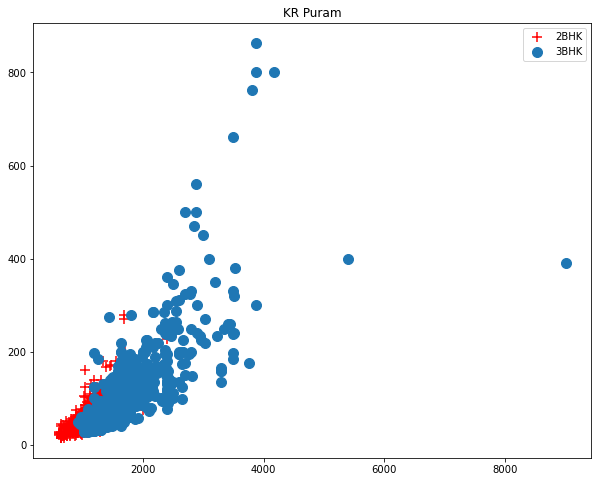

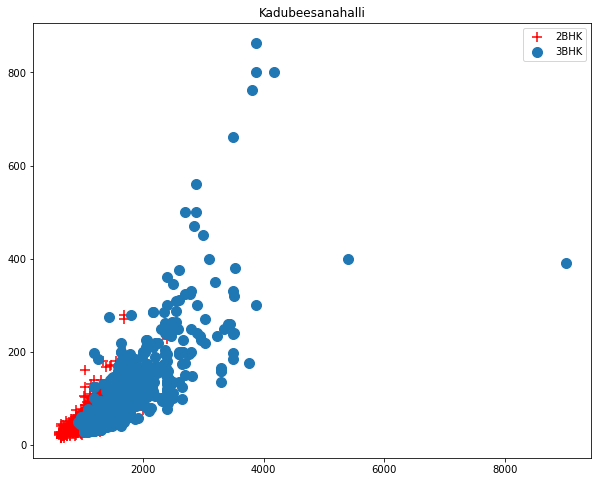

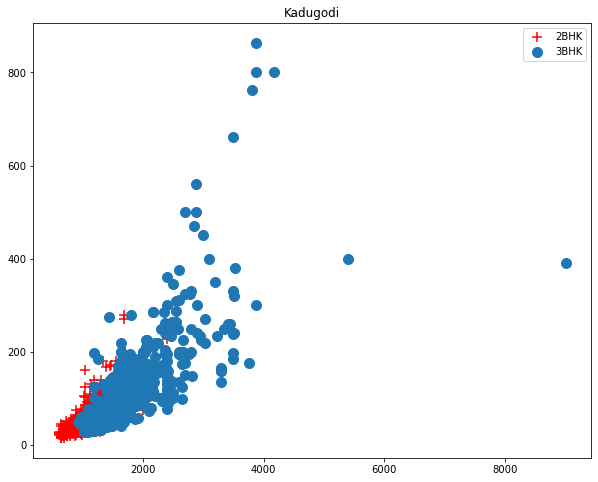

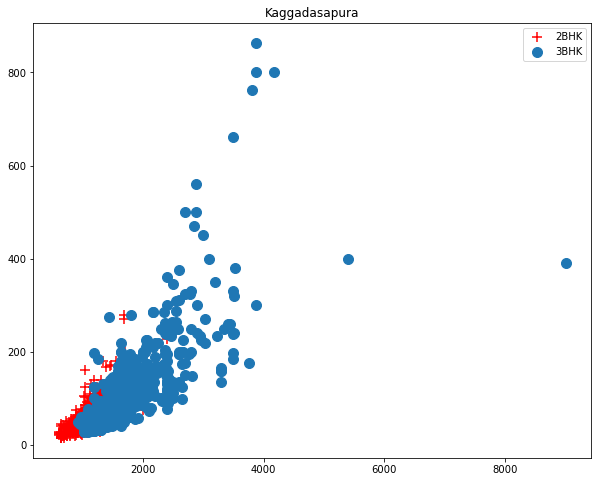

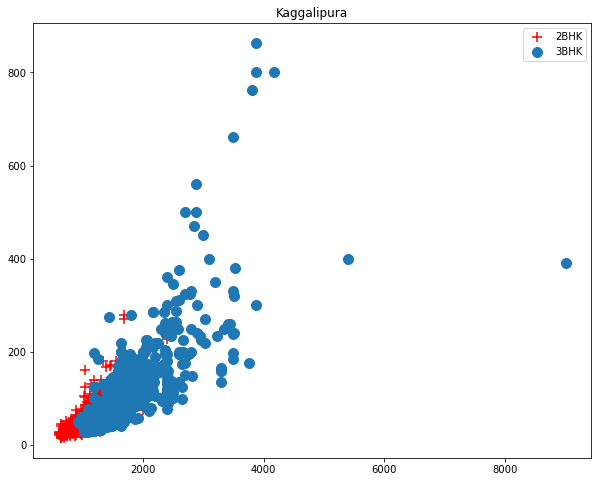

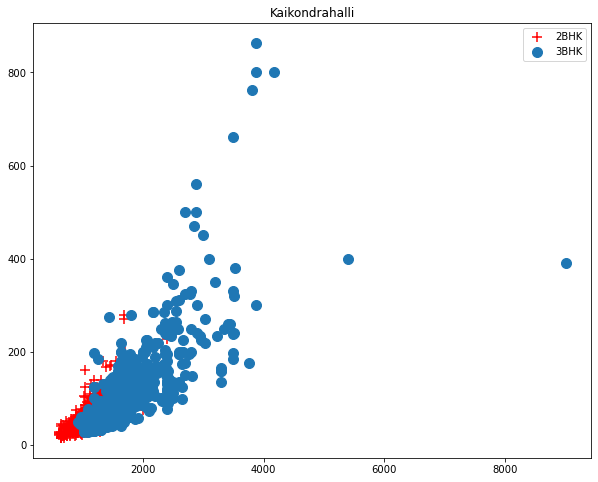

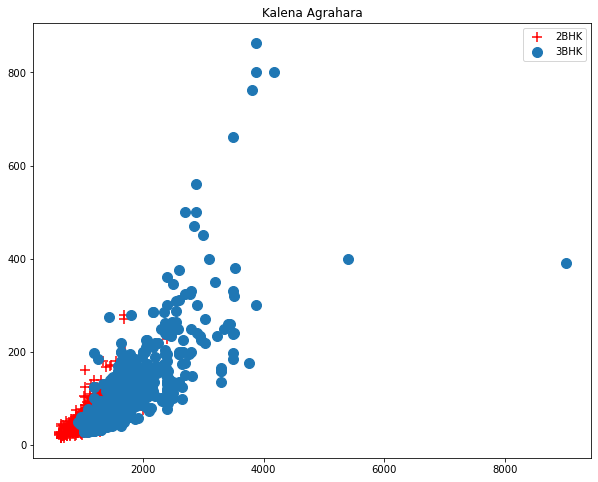

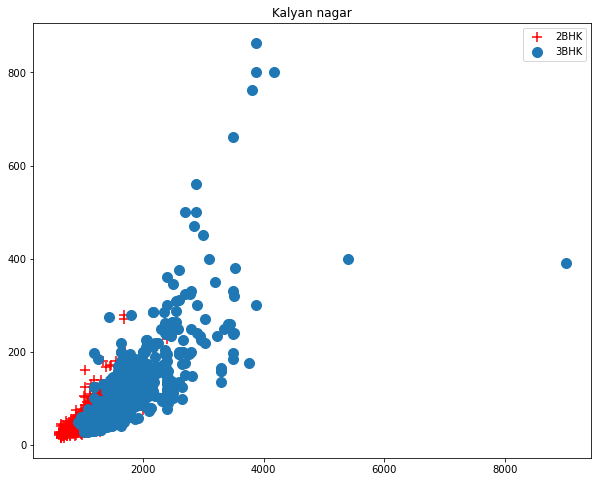

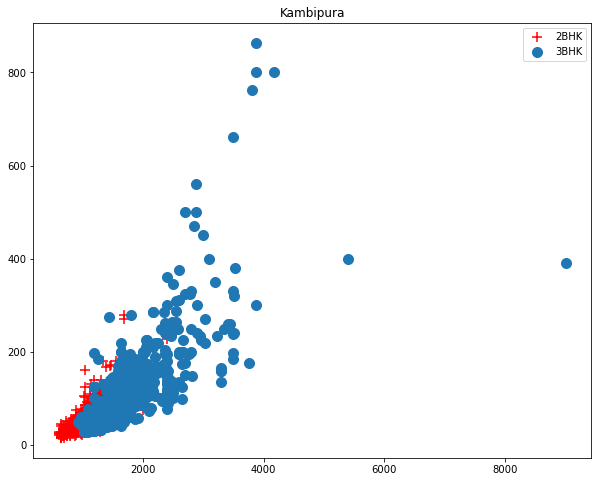

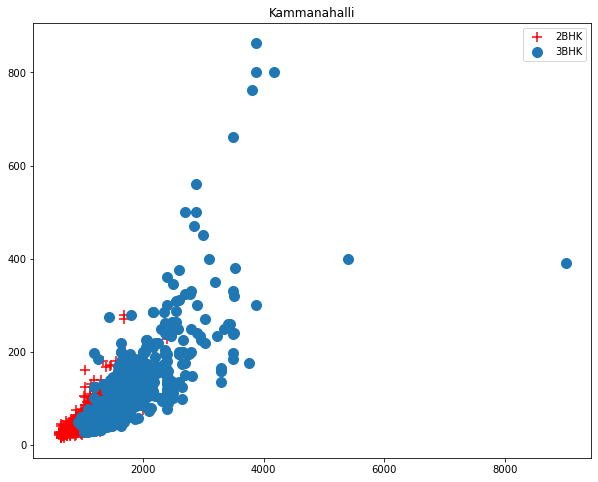

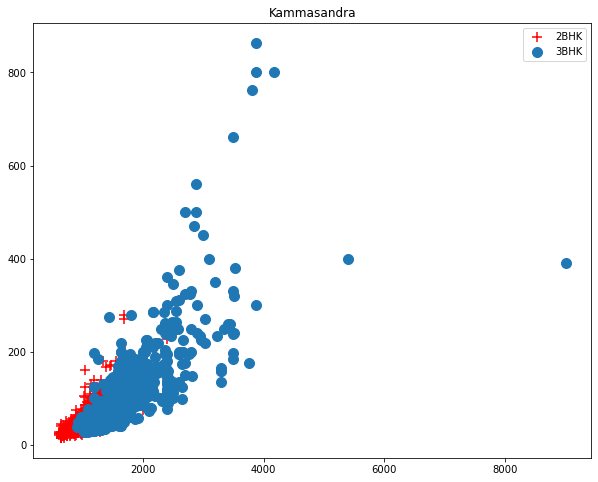

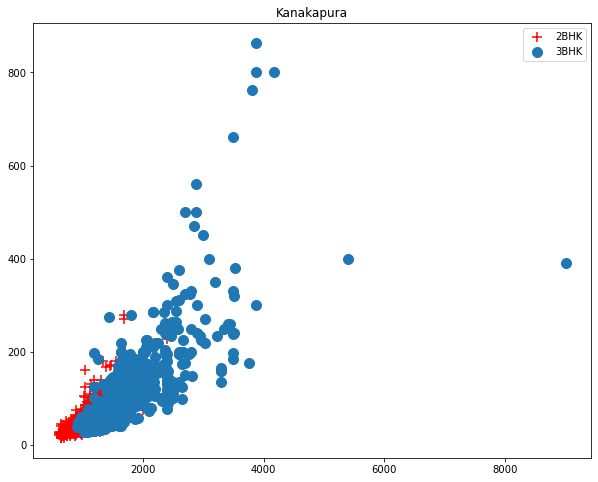

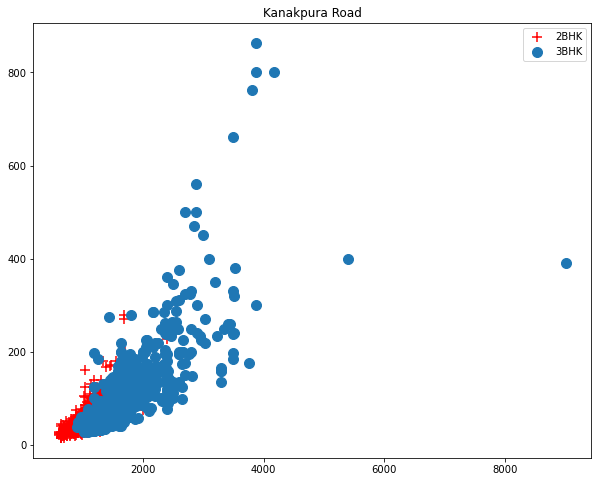

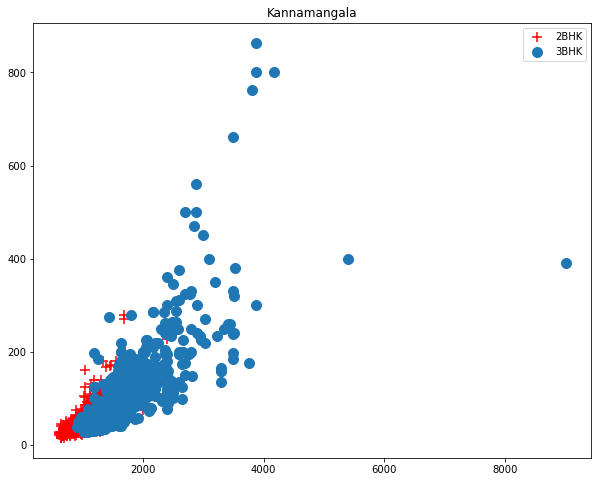

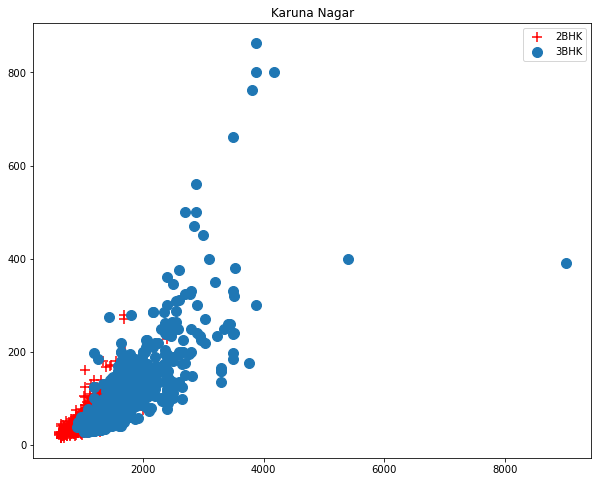

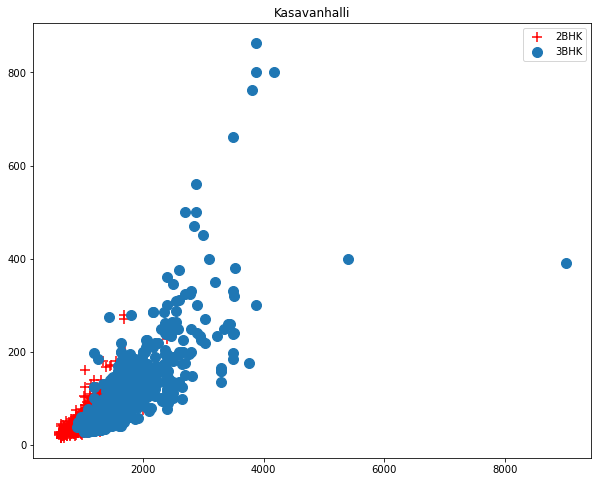

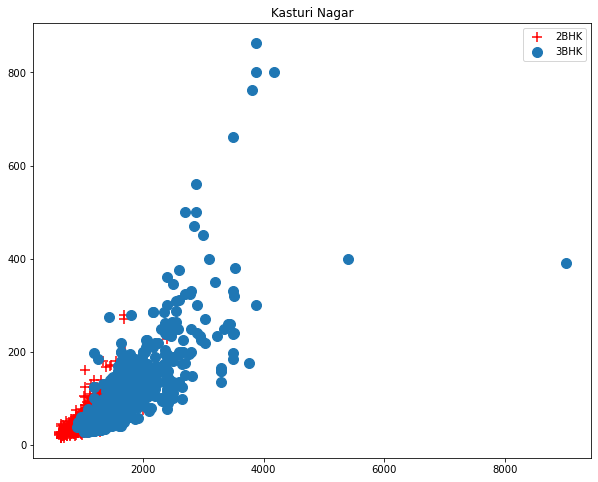

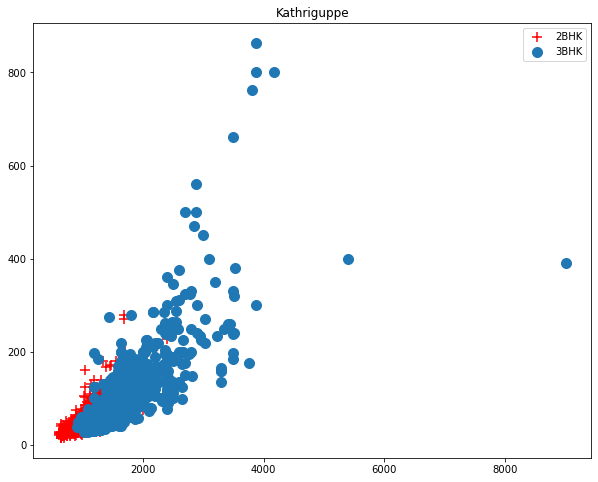

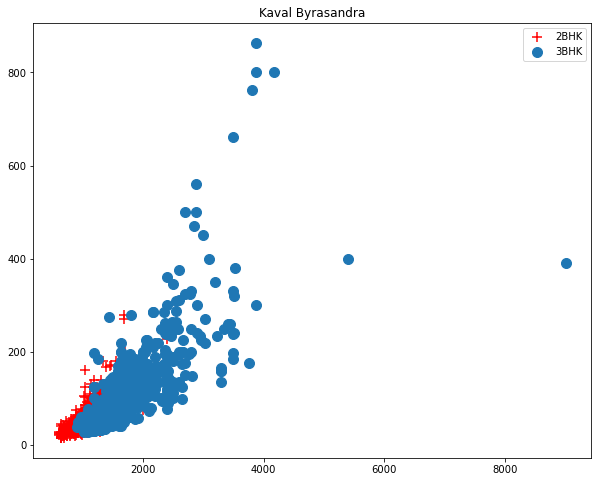

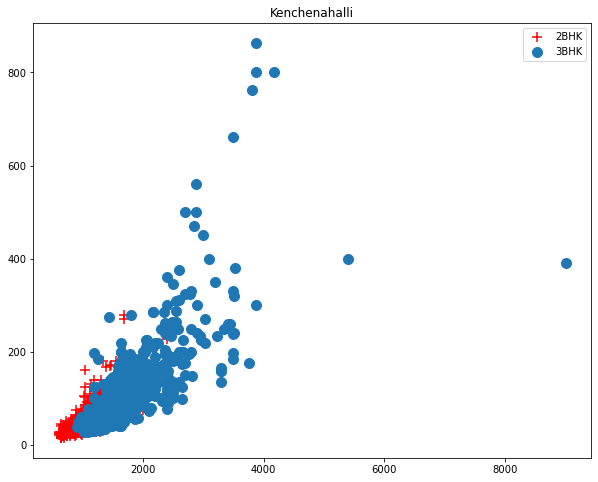

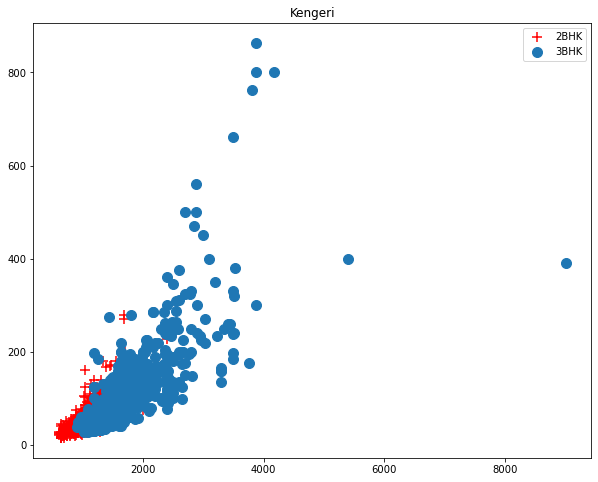

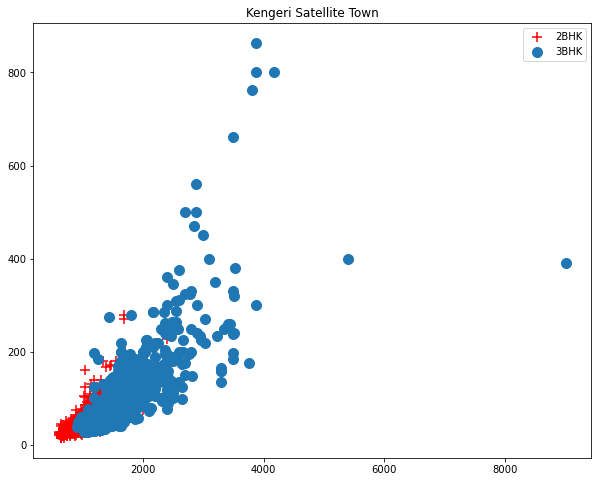

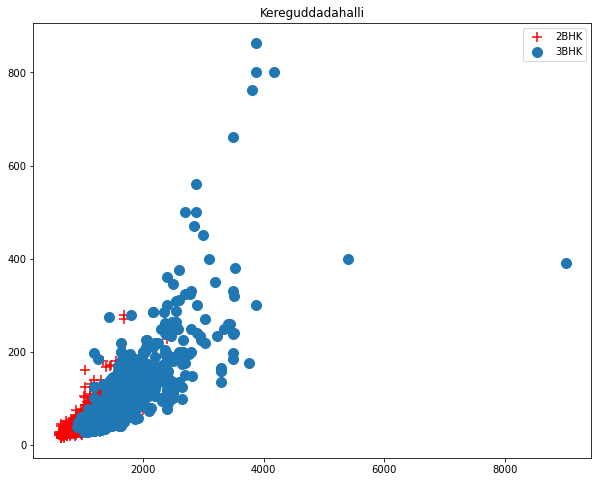

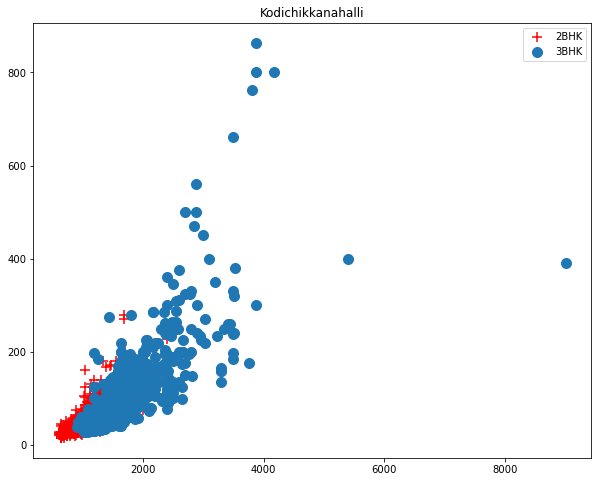

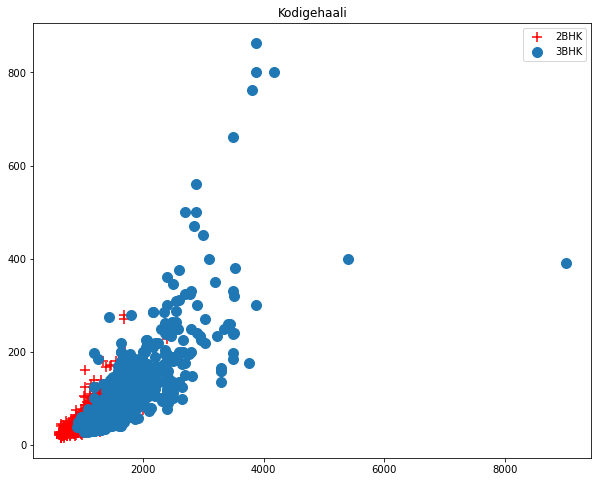

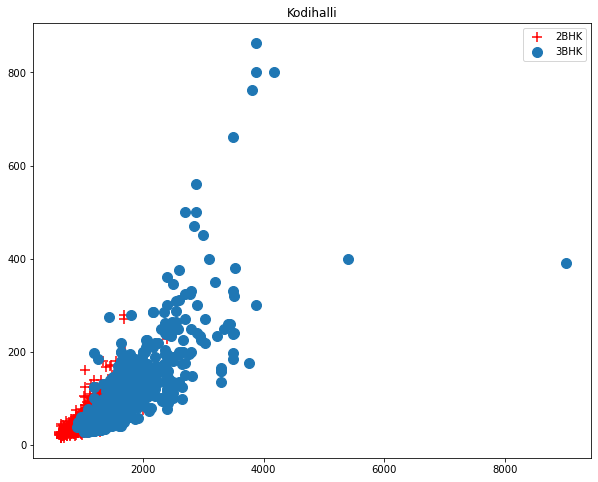

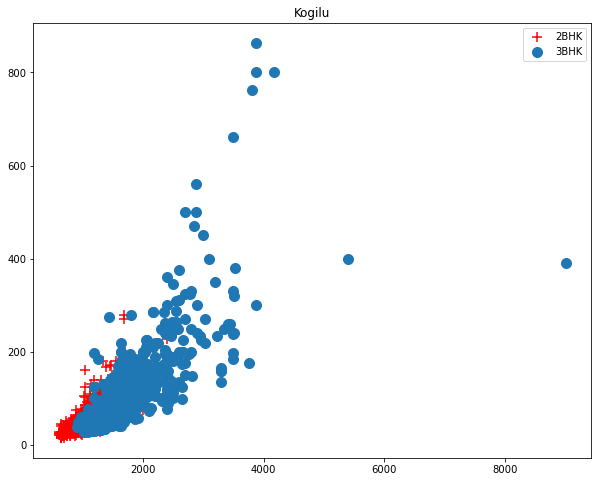

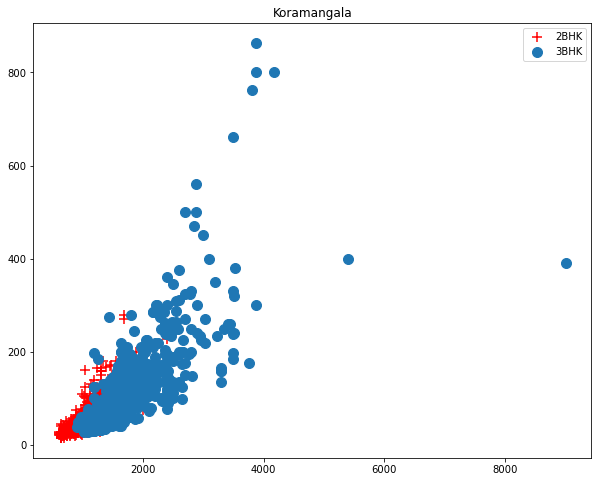

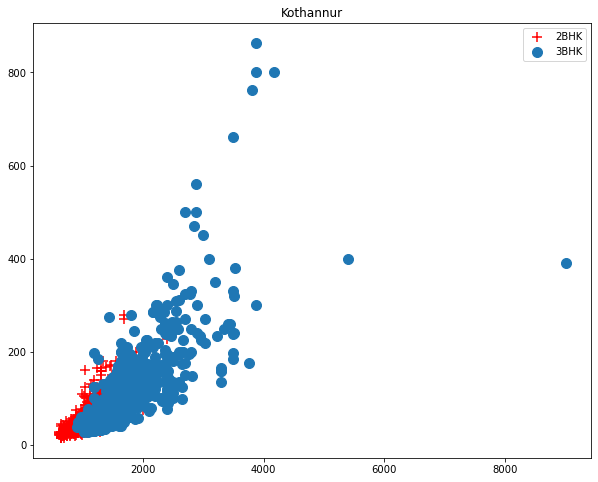

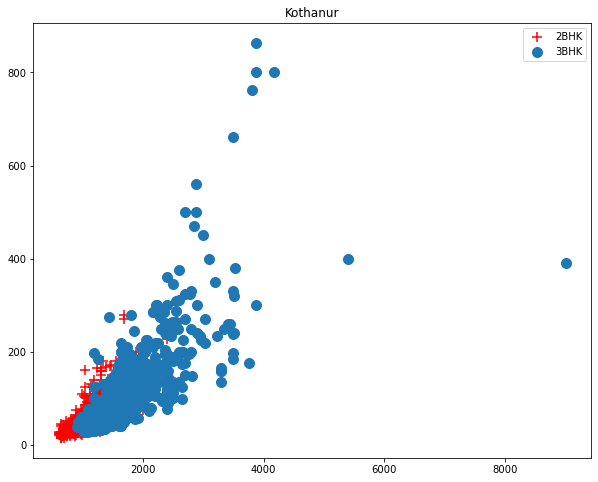

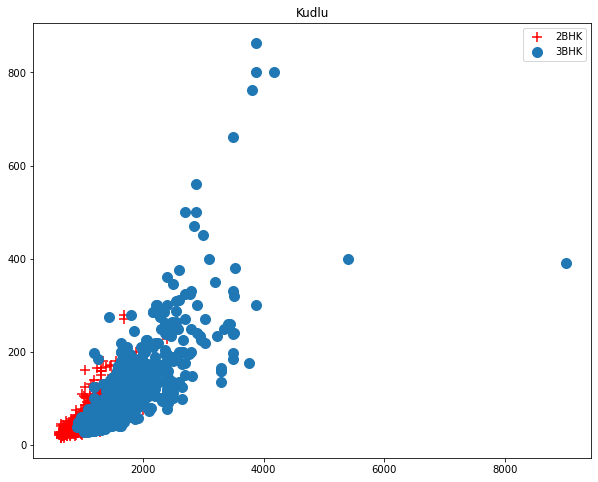

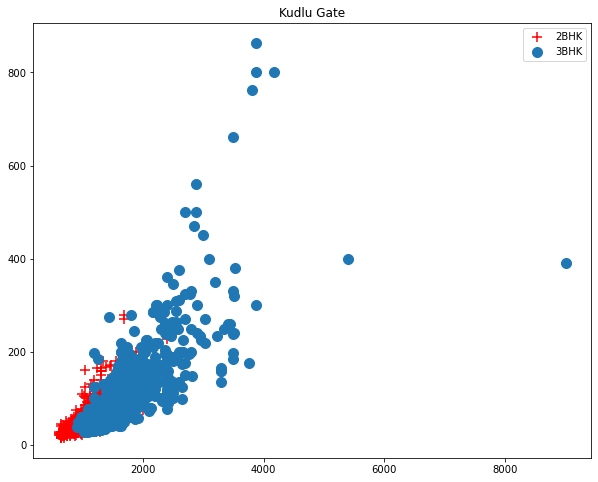

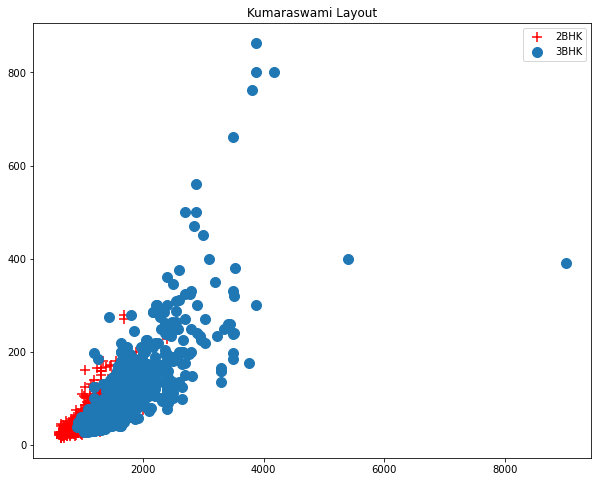

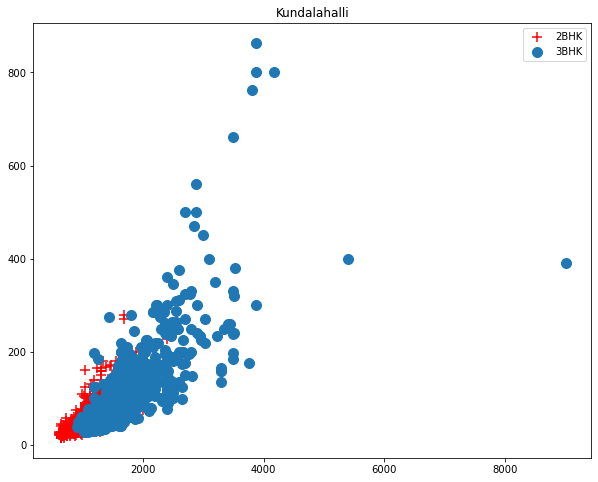

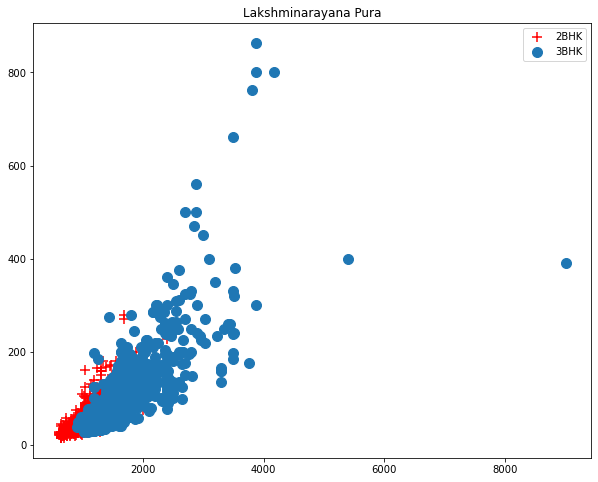

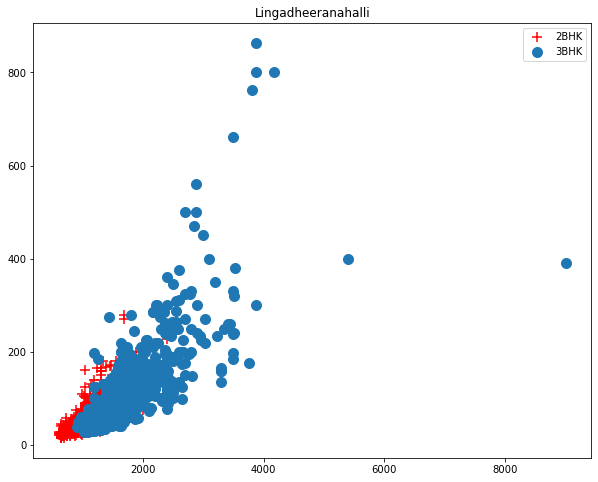

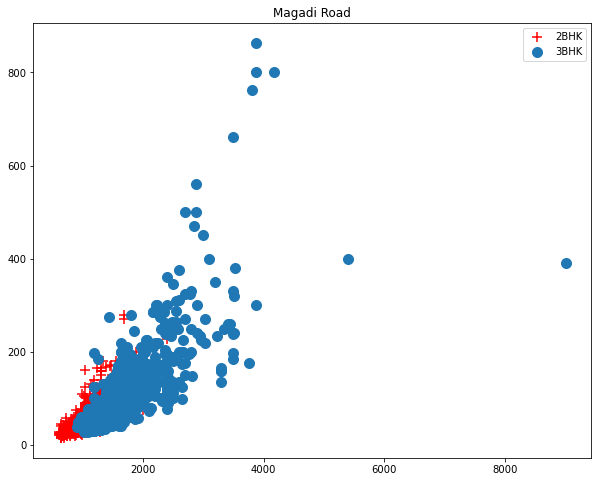

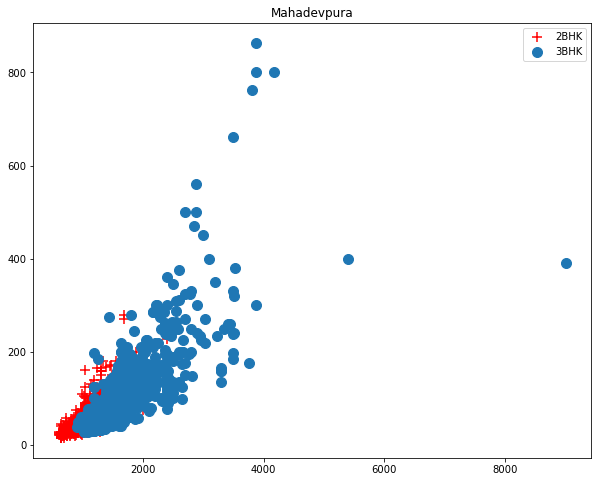

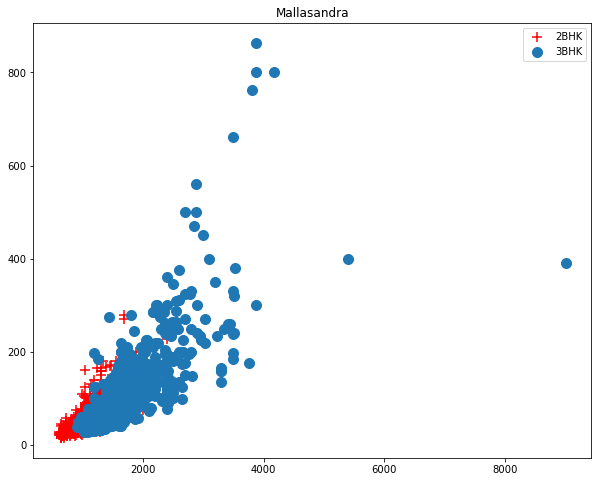

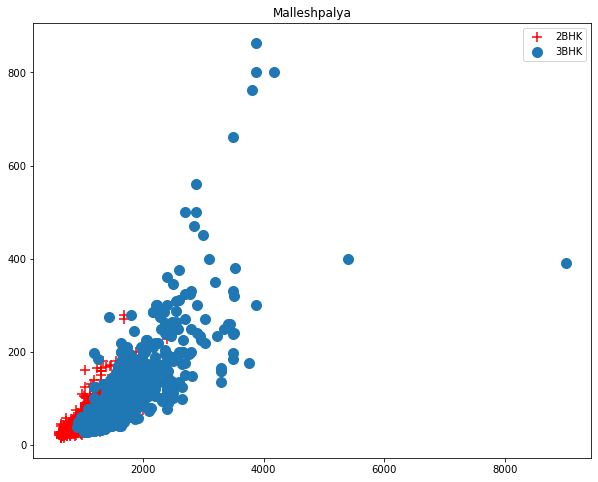

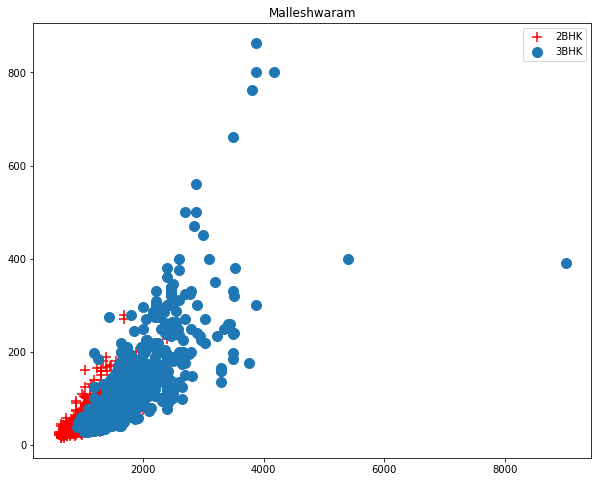

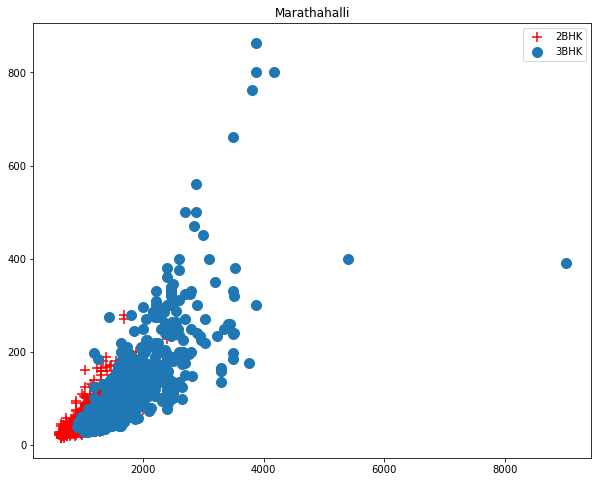

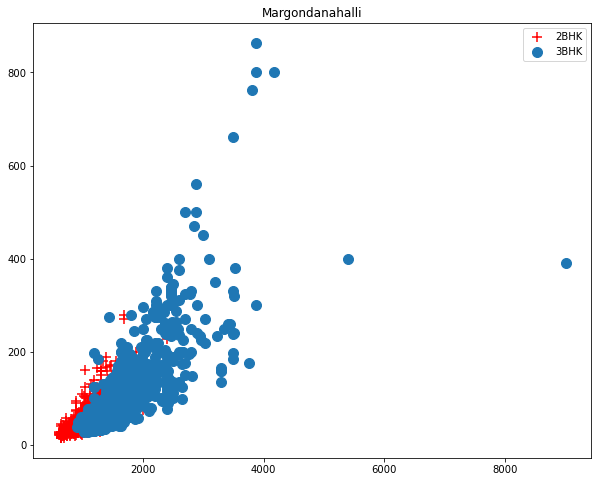

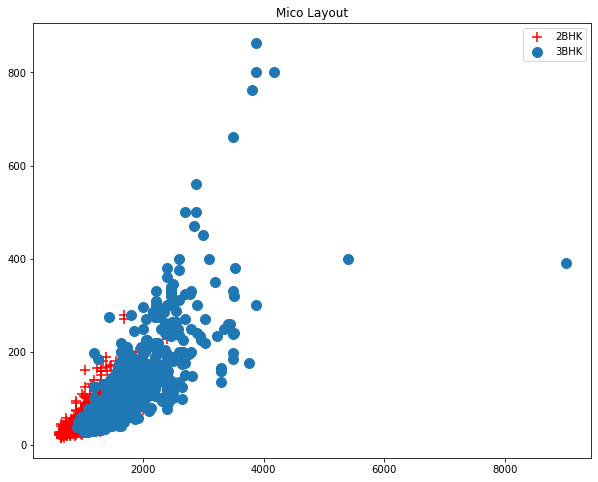

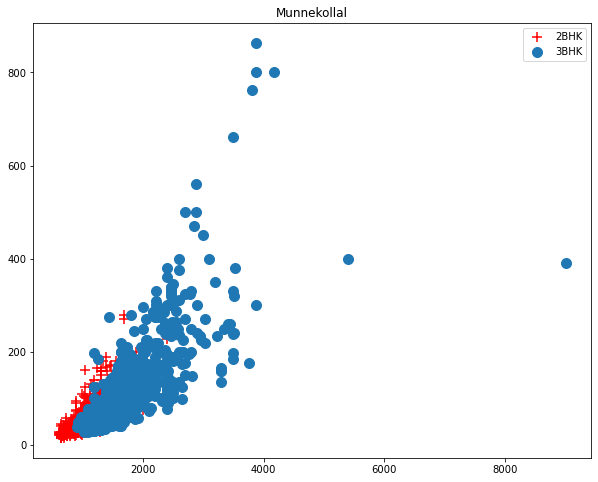

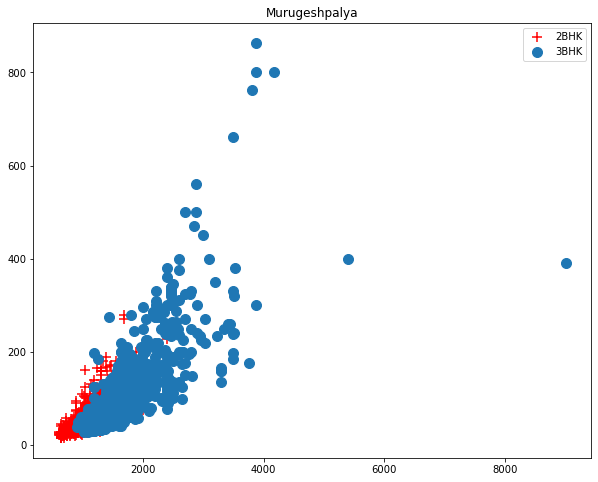

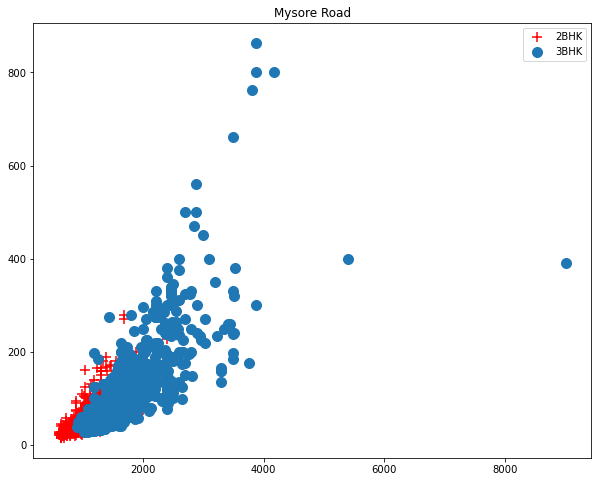

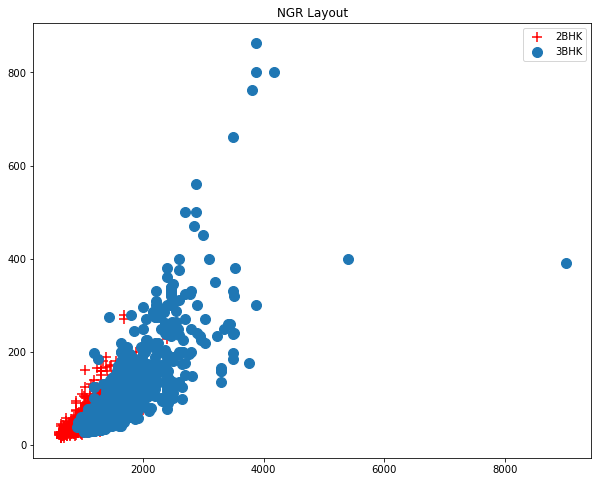

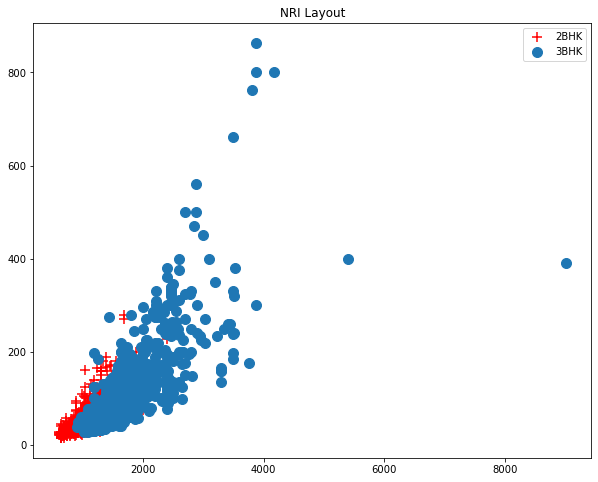

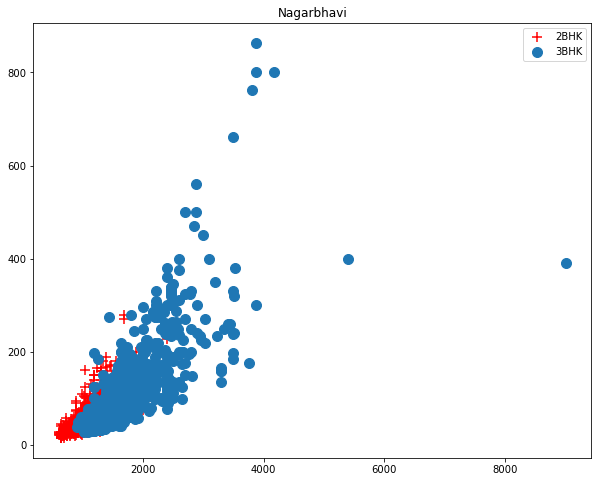

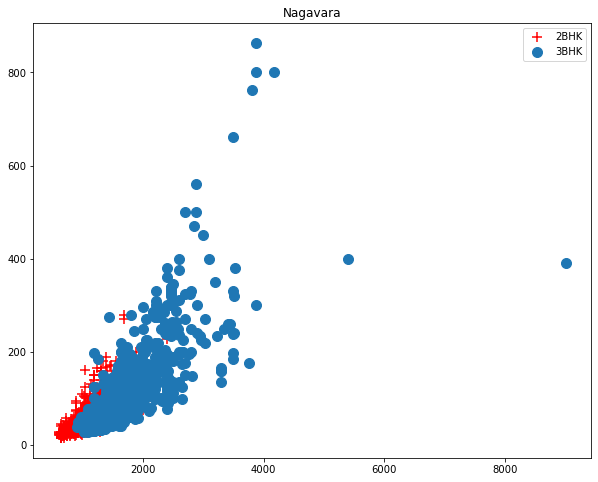

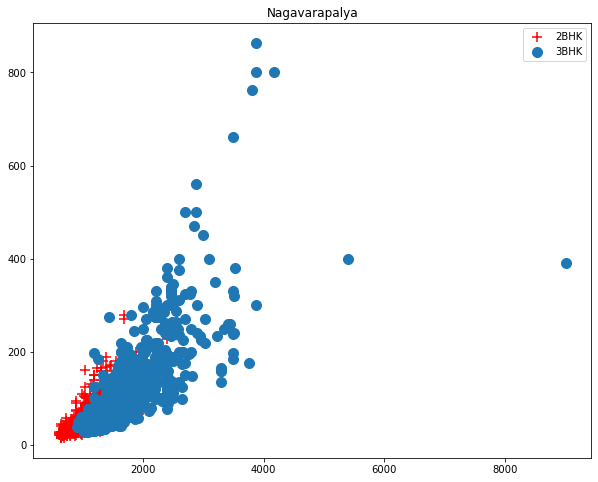

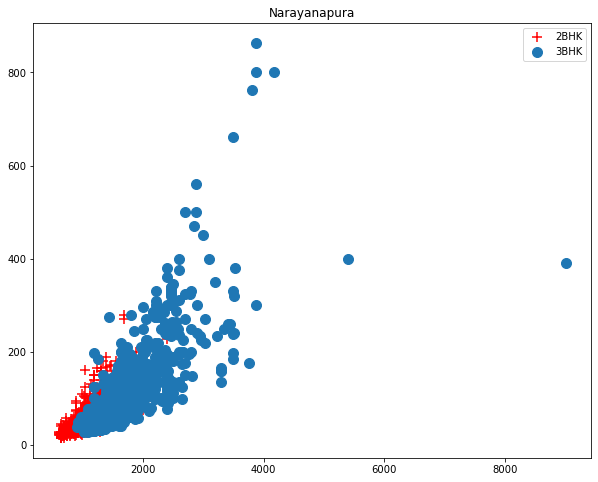

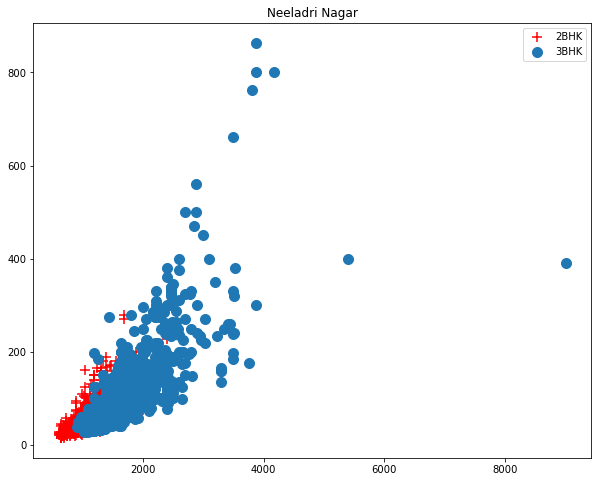

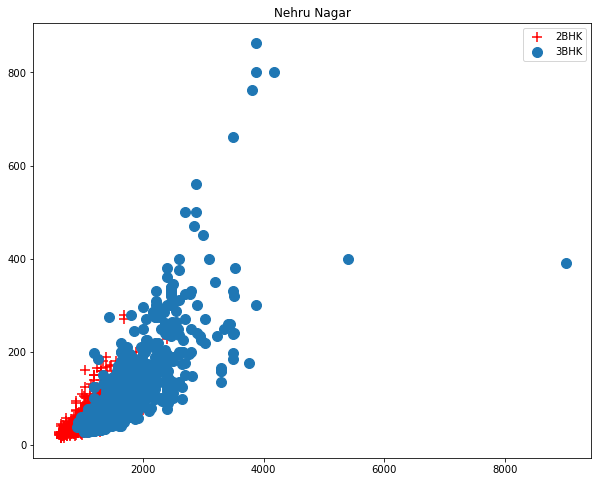

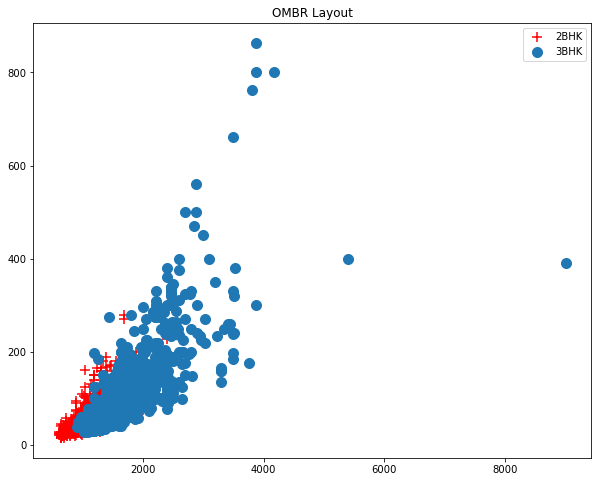

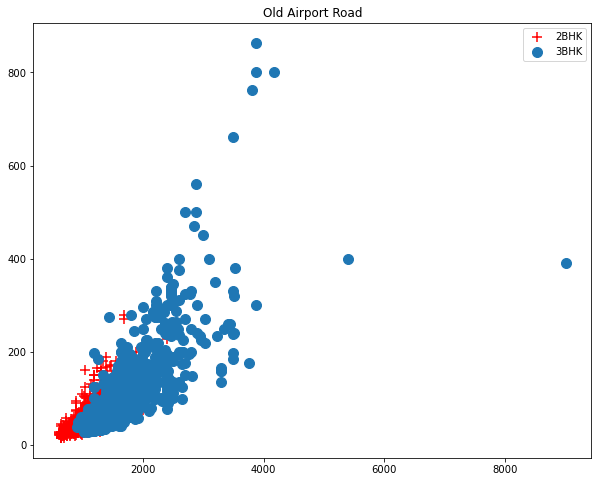

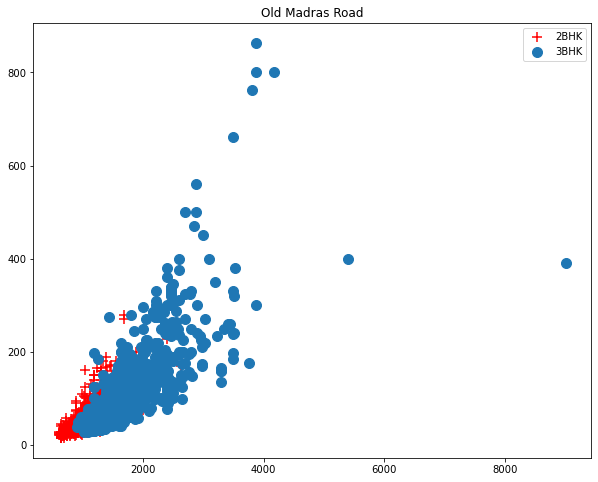

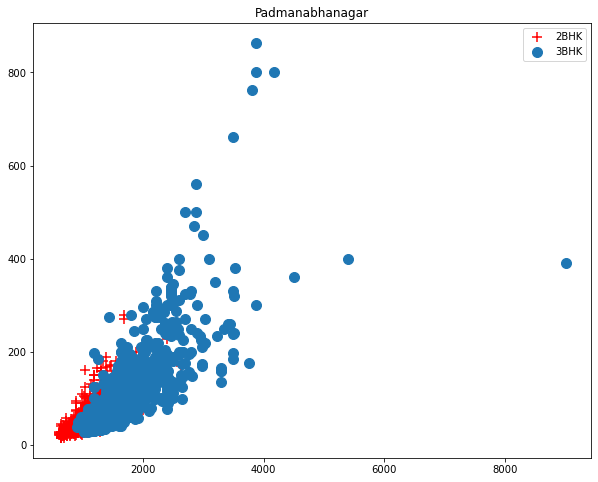

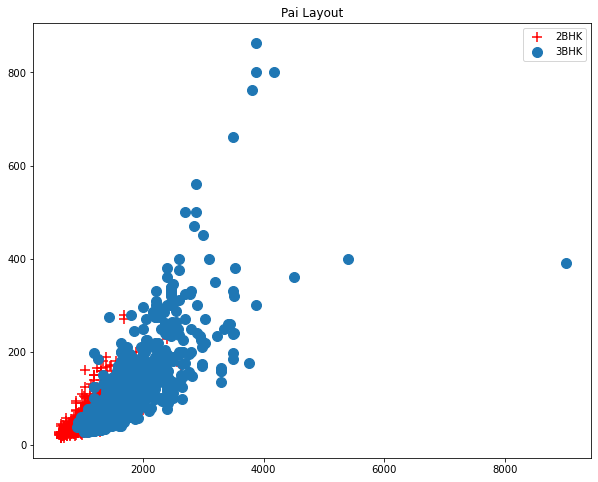

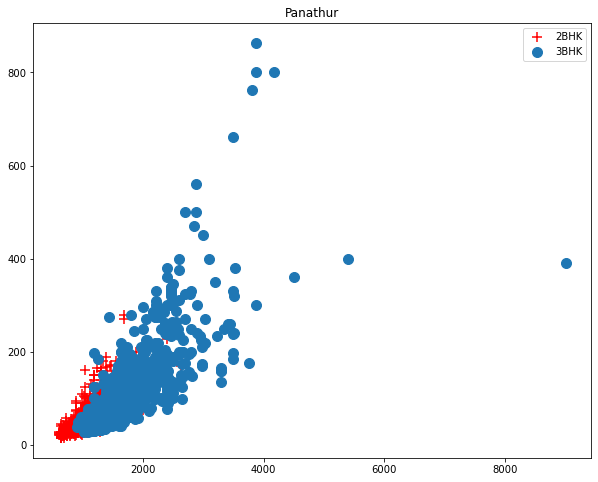

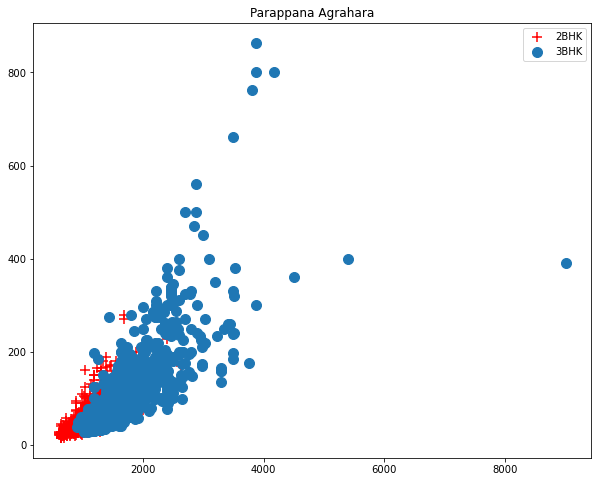

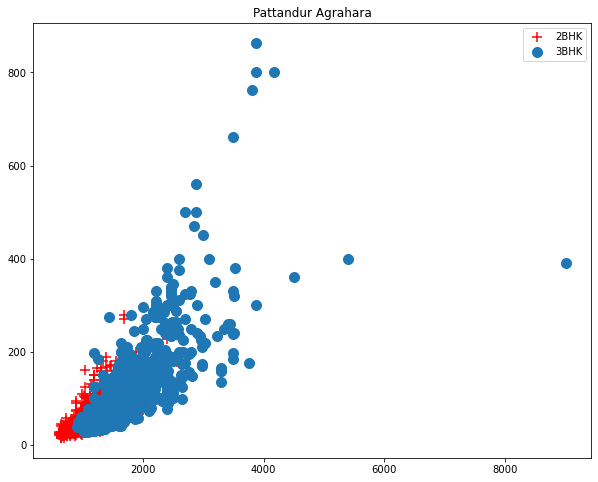

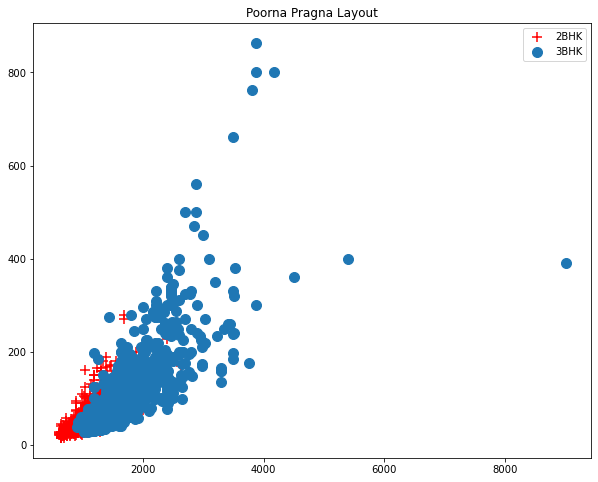

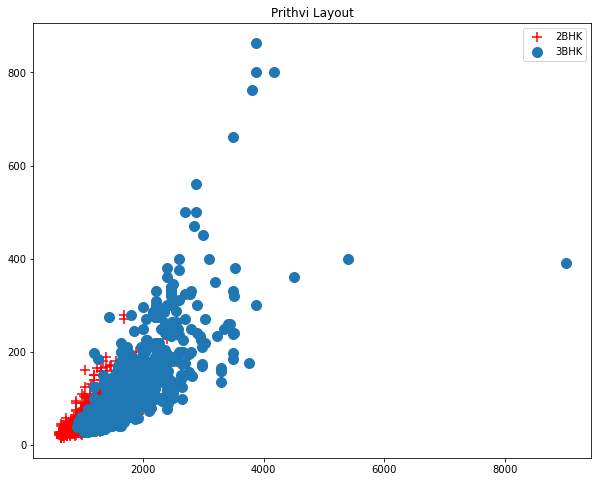

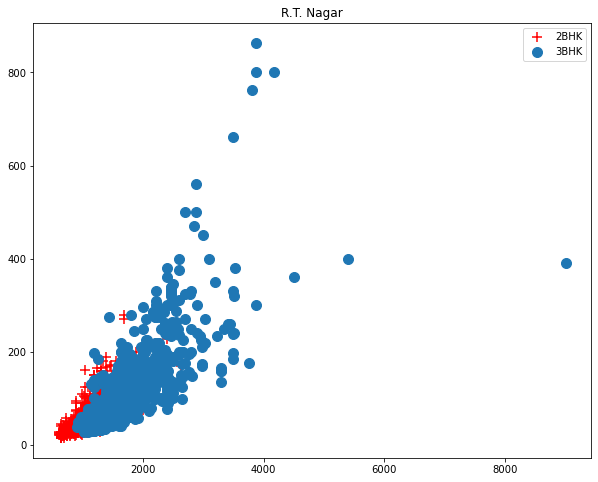

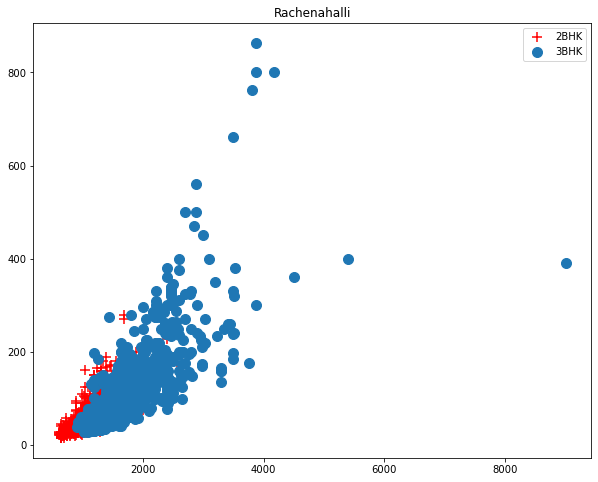

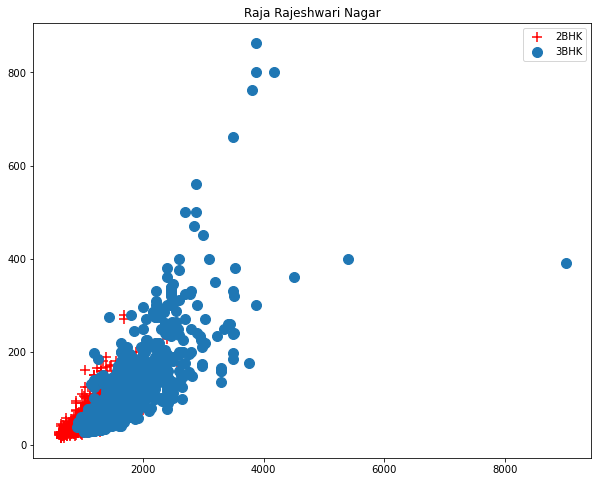

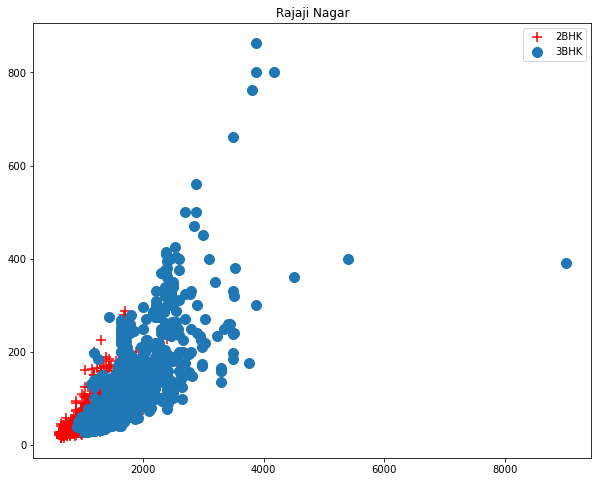

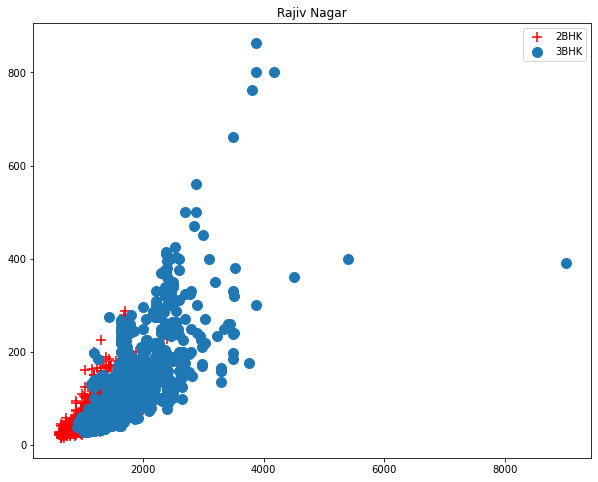

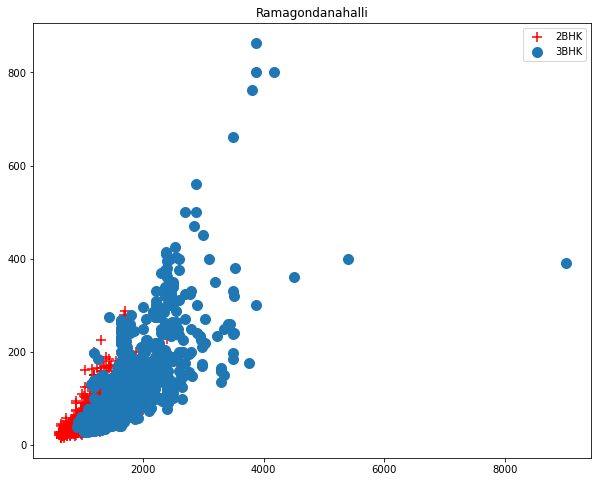

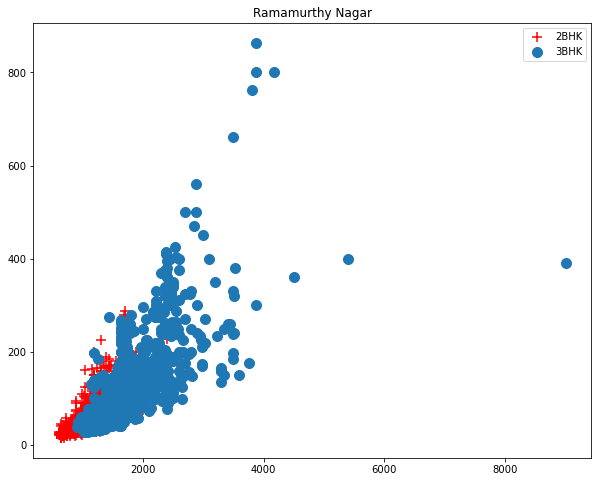

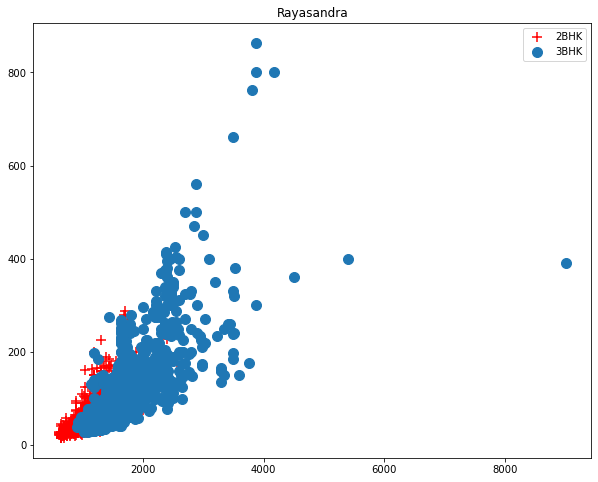

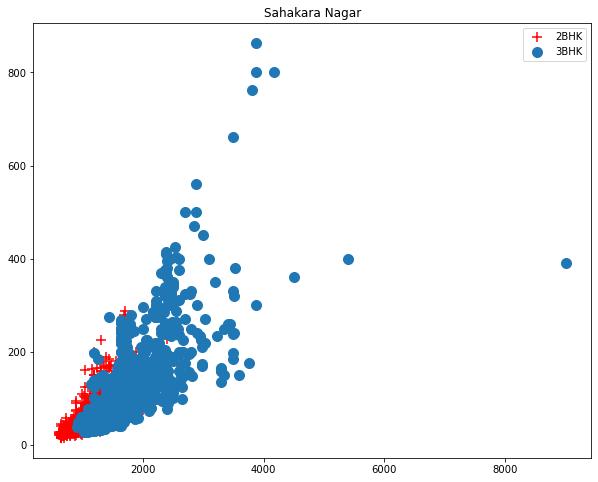

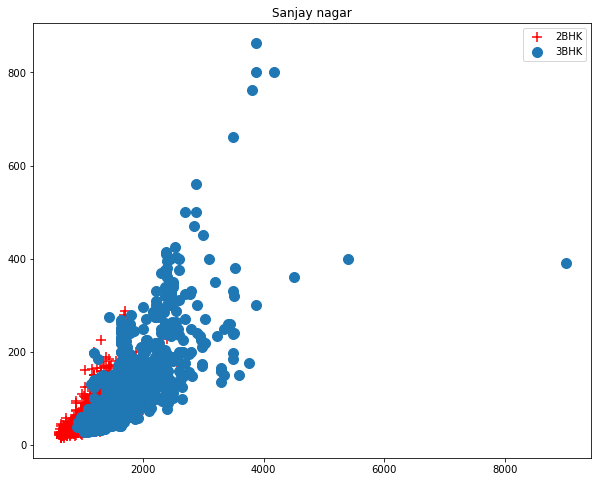

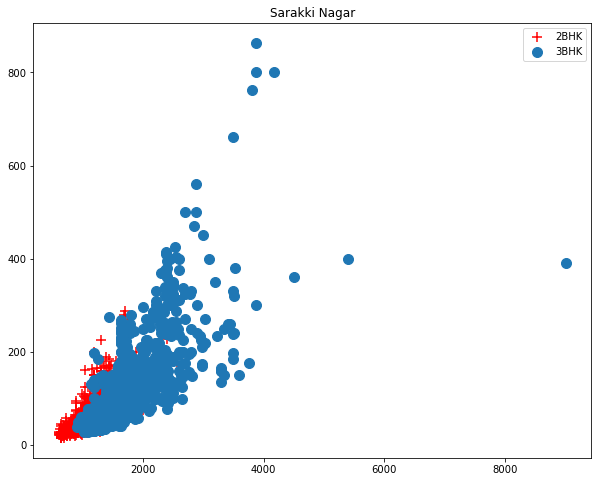

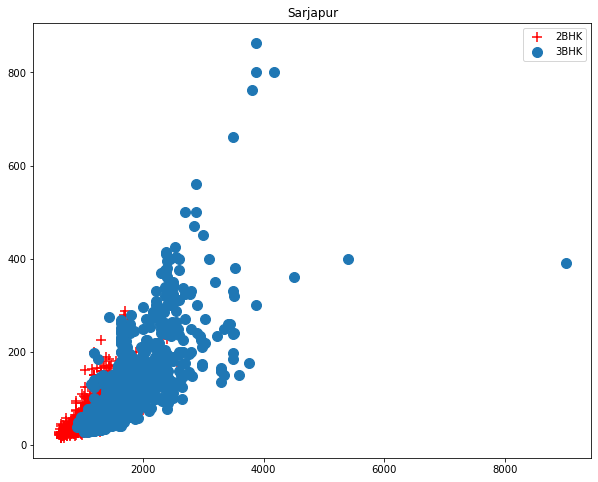

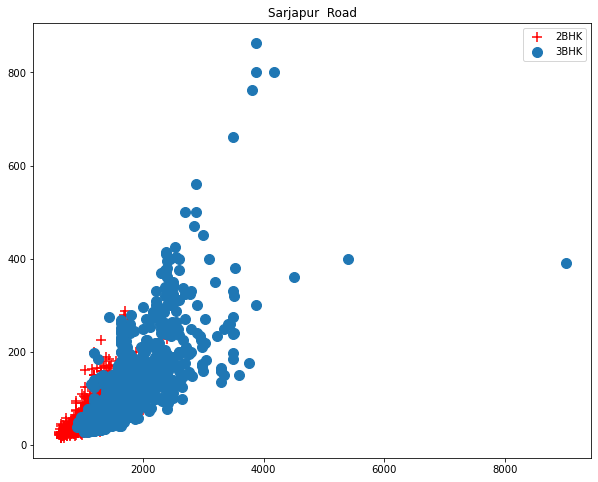

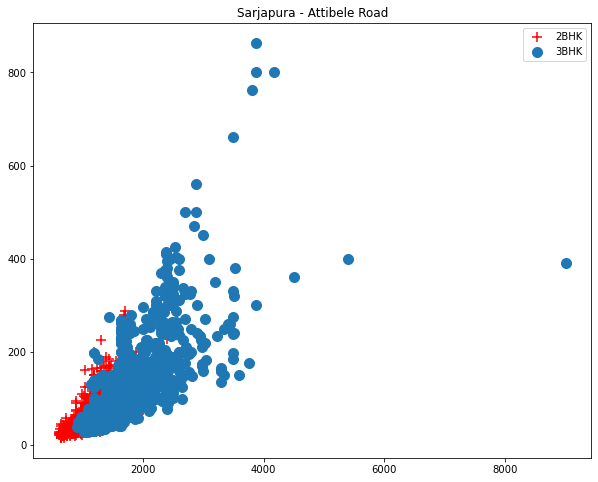

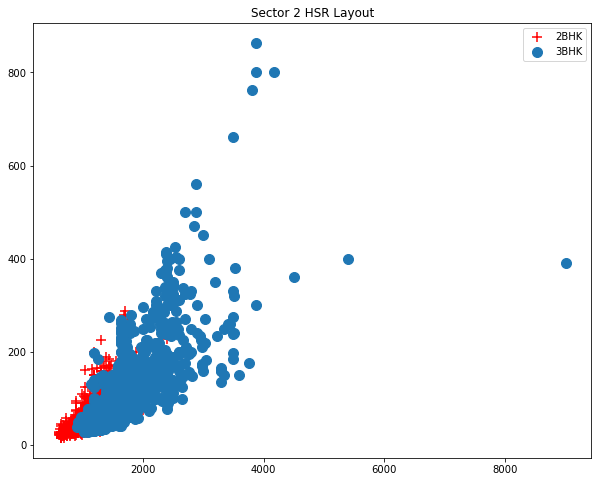

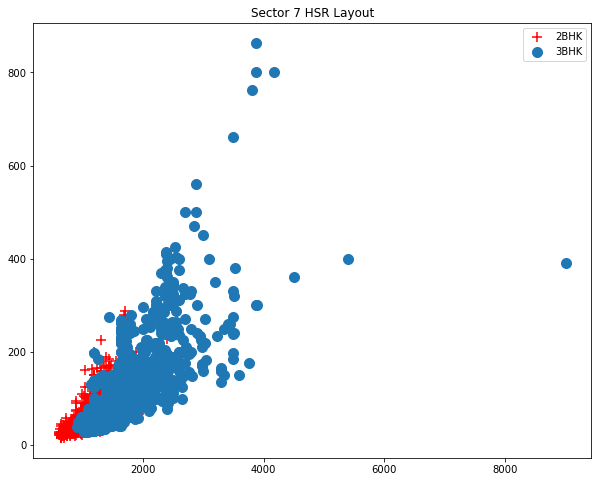

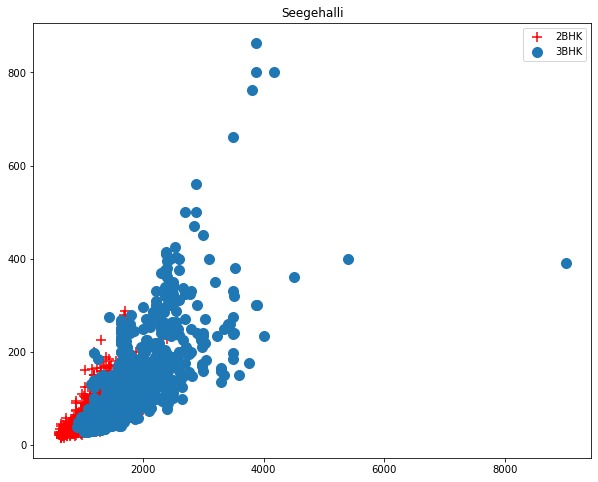

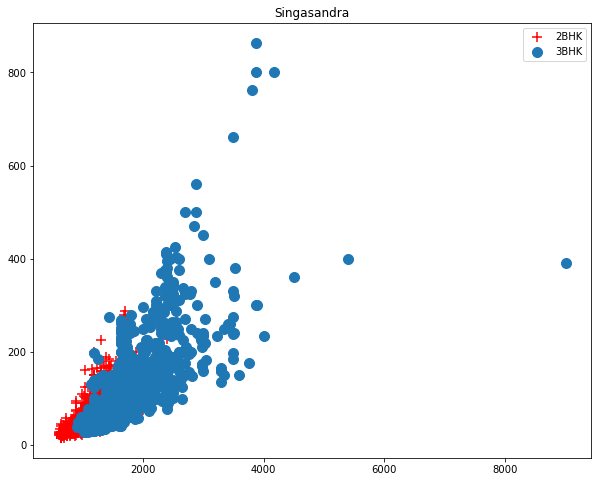

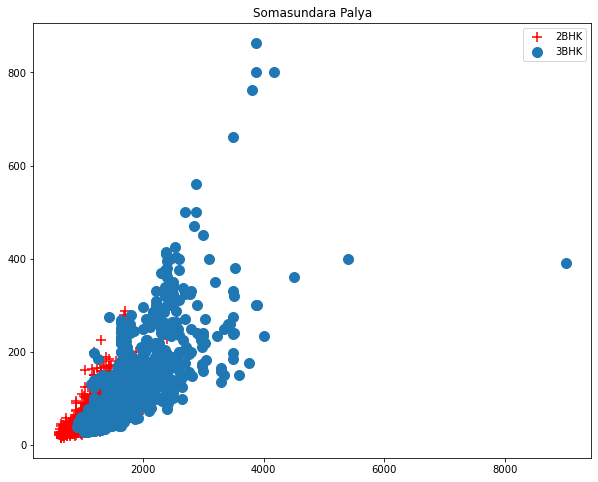

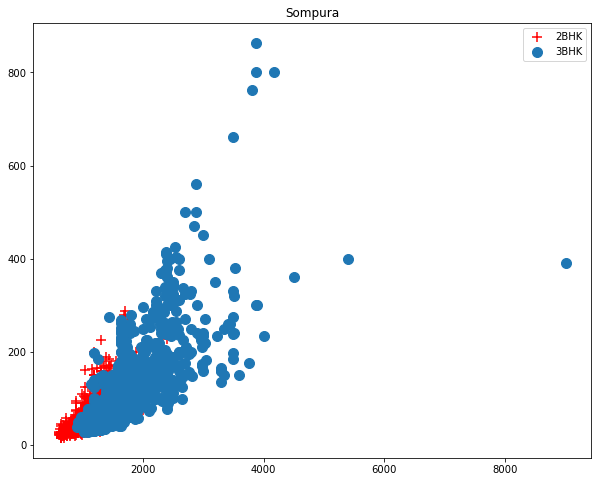

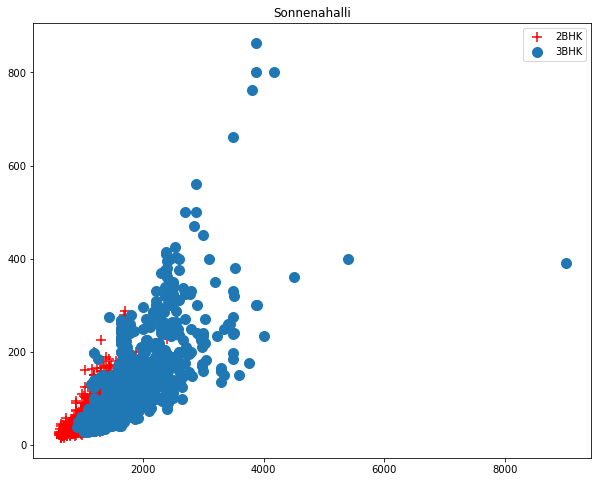

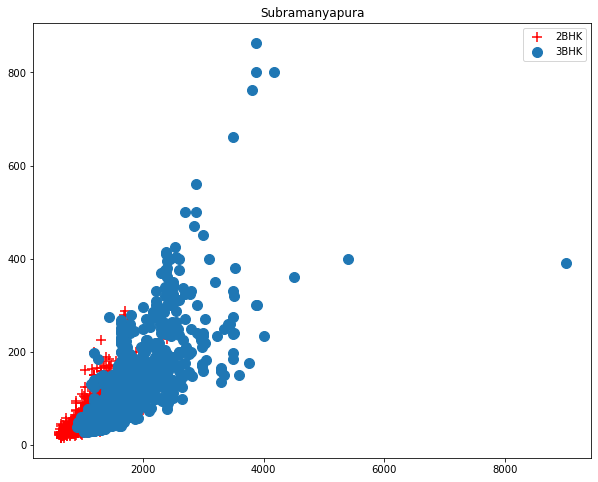

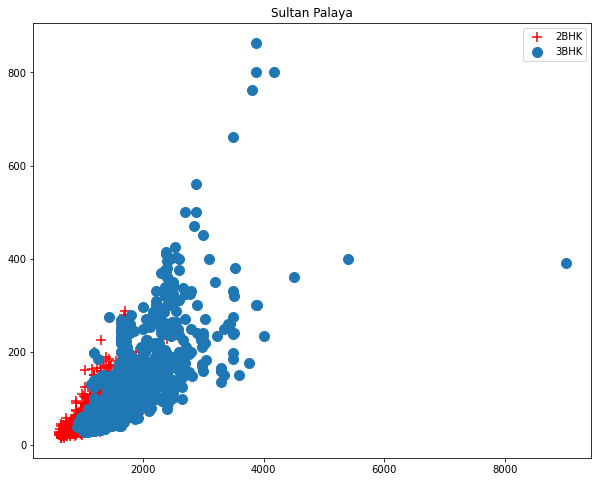

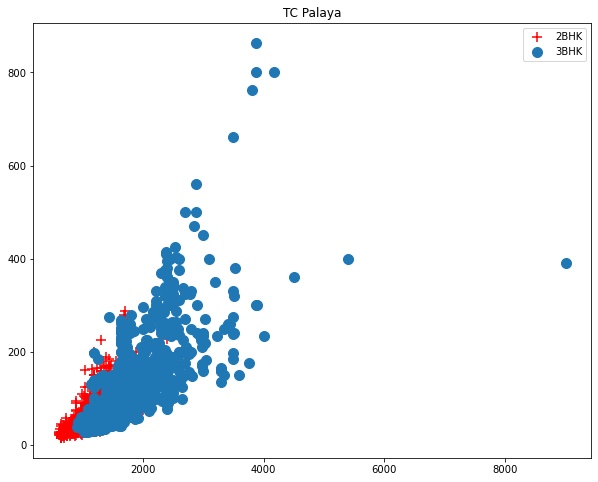

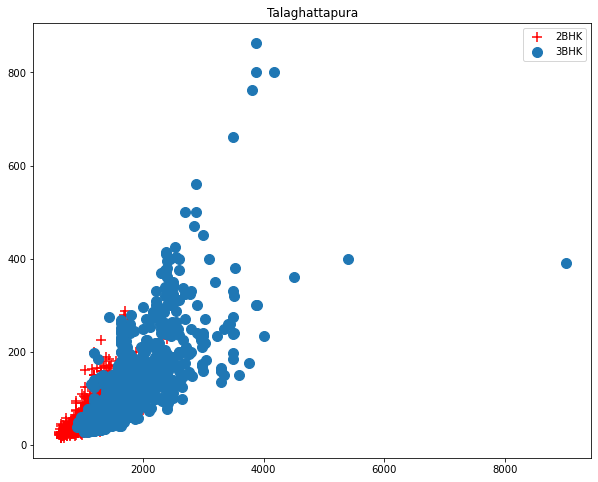

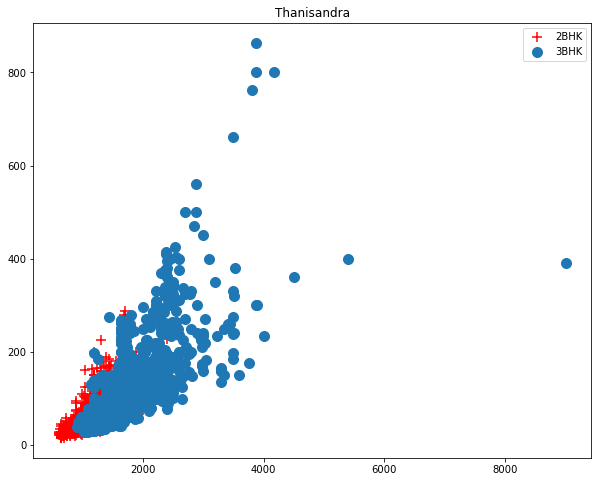

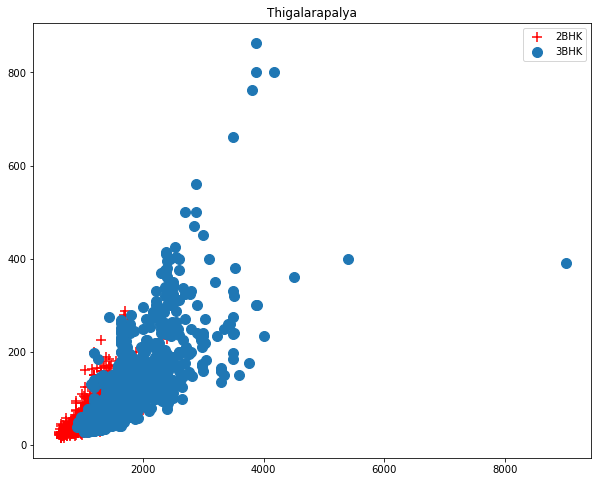

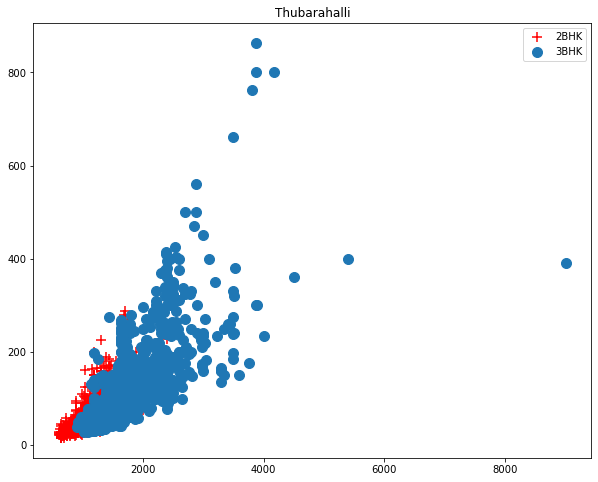

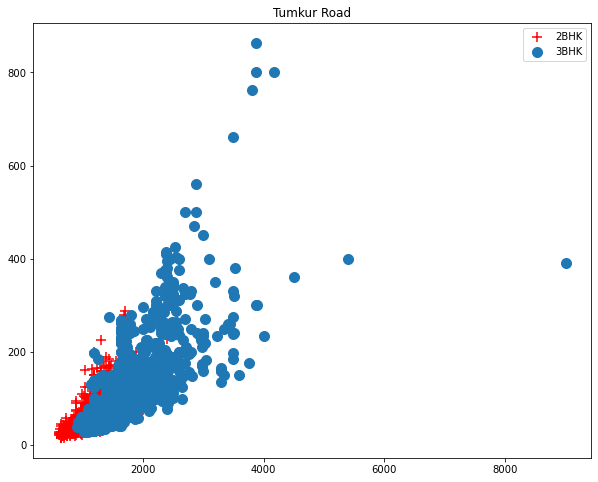

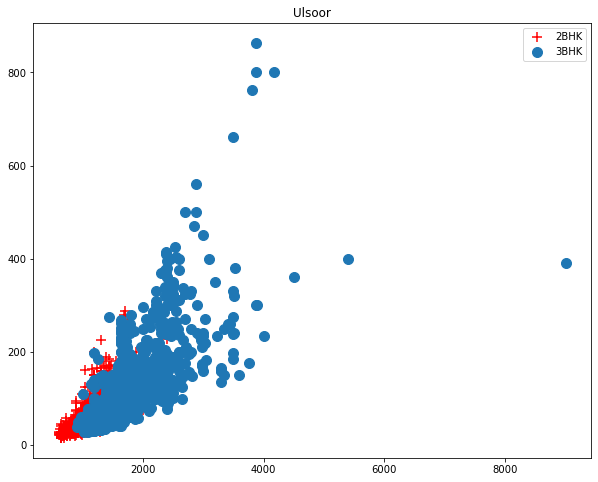

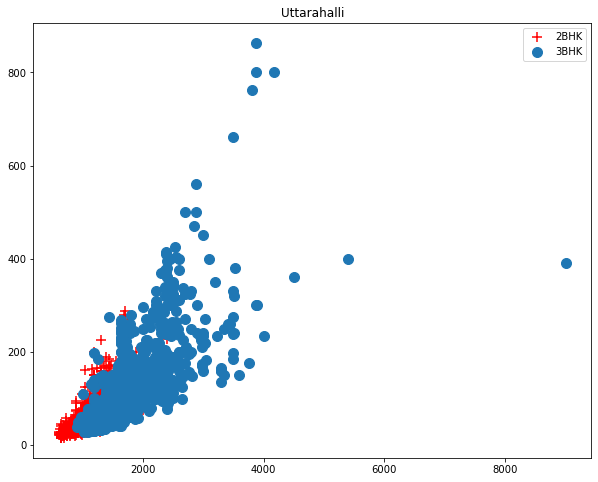

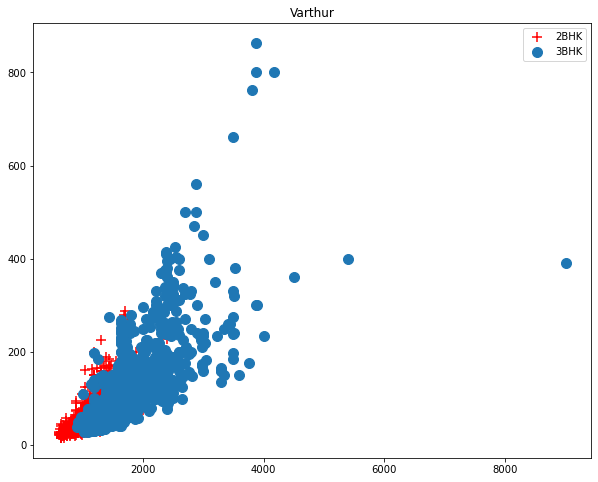

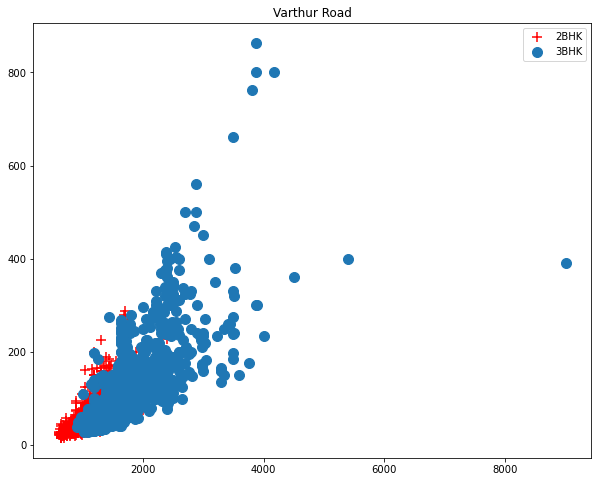

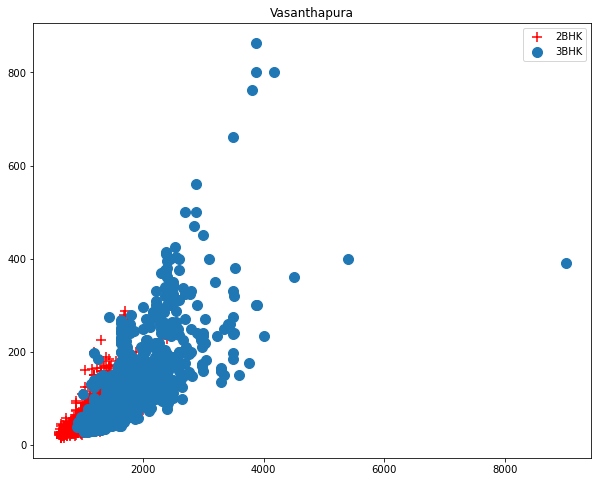

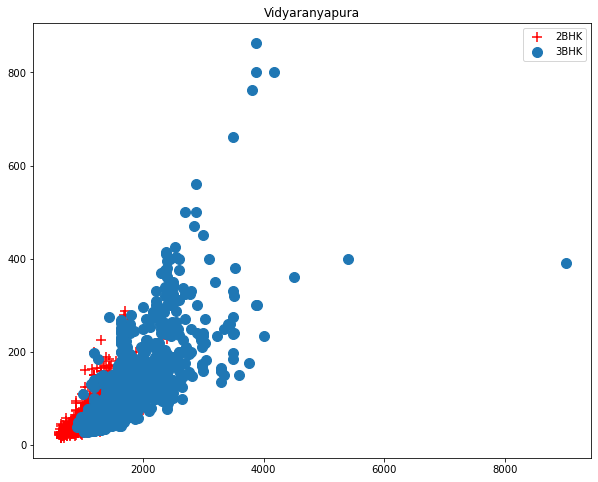

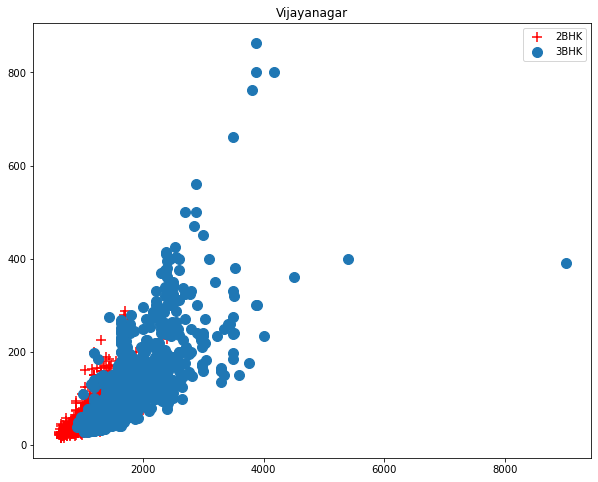

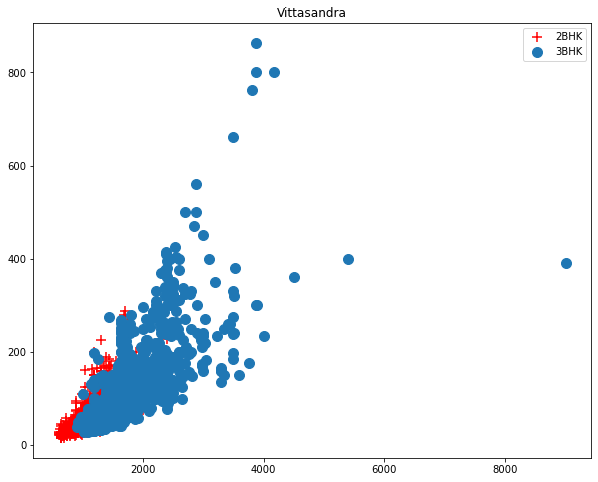

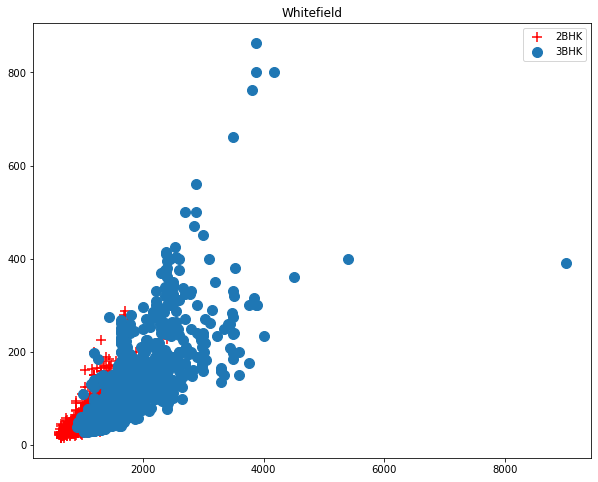

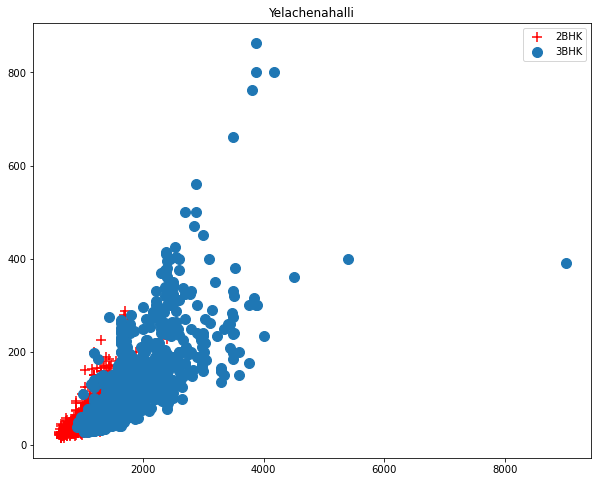

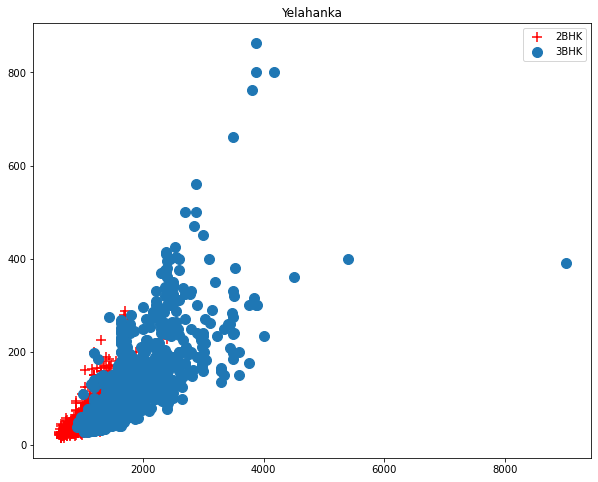

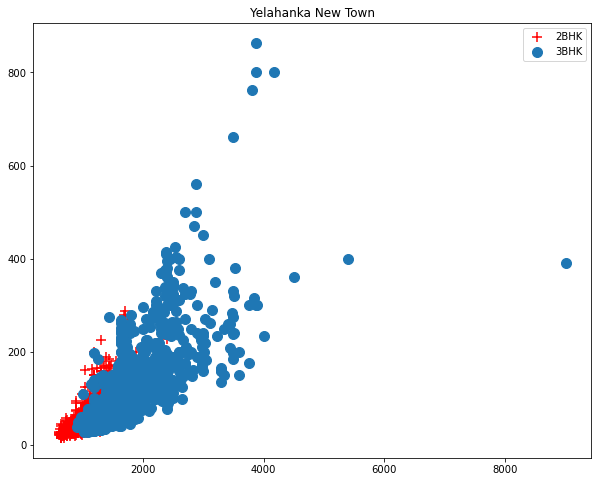

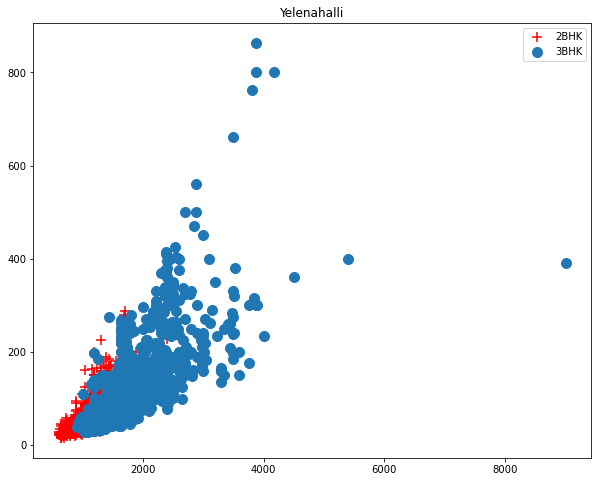

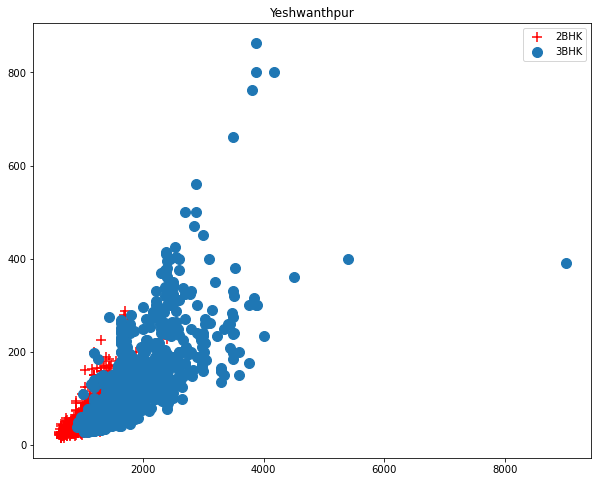

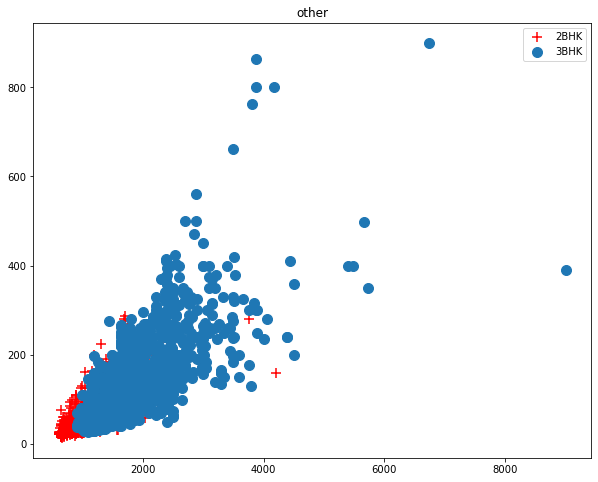

In [91]:
func(df5)

In [70]:
df5.head()

location  bhk  total_sqft  bath  balcony  price  price_per_sqft
0  1st Phase JP Nagar  4.0      2825.0   4.0      3.0  250.0     8849.557522
1  1st Phase JP Nagar  3.0      1875.0   3.0      1.0  167.0     8906.666667
2  1st Phase JP Nagar  3.0      2065.0   4.0      1.0  210.0    10169.491525
3  1st Phase JP Nagar  3.0      2024.0   3.0      2.0  157.0     7756.916996
4  1st Phase JP Nagar  3.0      2059.0   3.0      2.0  225.0    10927.634774

In [71]:
def outlier_remover(df):
    exclude_indices = []
    for location,subdf in df.groupby("location"):
        bhk_stats={}
        for bhk,bhk_df in subdf.groupby("bhk"):
            bhk_stats[bhk]={"mean":bhk_df["price_per_sqft"].mean(),"std":bhk_df["price_per_sqft"].std(),"count":bhk_df.shape[0]}
        for bhk,bhk_df in subdf.groupby("bhk"):
            less_bhk_dict = bhk_stats.get(bhk-1)
            if less_bhk_dict and less_bhk_dict["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_df[(bhk_df["price_per_sqft"]<less_bhk_dict["mean"])].index.values)
    return df.drop(exclude_indices,axis=0)

In [72]:
df6 = outlier_remover(df5)

In [73]:
df6.shape

(7135, 7)

In [74]:
df7 = df6[~(df6["bath"]>df6["bhk"]+2)]
df7.shape

(7130, 7)

In [75]:
df7.head(2)

location  bhk  total_sqft  bath  balcony  price  price_per_sqft
1  1st Phase JP Nagar  3.0      1875.0   3.0      1.0  167.0     8906.666667
2  1st Phase JP Nagar  3.0      2065.0   4.0      1.0  210.0    10169.491525

In [76]:
df8 = df7.drop(columns=["price_per_sqft"],axis=1)

In [77]:
df8

location  bhk  total_sqft  bath  balcony  price
1      1st Phase JP Nagar  3.0      1875.0   3.0      1.0  167.0
2      1st Phase JP Nagar  3.0      2065.0   4.0      1.0  210.0
4      1st Phase JP Nagar  3.0      2059.0   3.0      2.0  225.0
5      1st Phase JP Nagar  2.0      1394.0   2.0      1.0  100.0
6      1st Phase JP Nagar  2.0      1077.0   2.0      2.0   93.0
...                   ...  ...         ...   ...      ...    ...
10098               other  2.0      1200.0   2.0      3.0   70.0
10099               other  1.0      1800.0   1.0      1.0  200.0
10104               other  2.0      1353.0   2.0      2.0  110.0
10105               other  1.0       812.0   1.0      0.0   26.0
10108               other  4.0      3600.0   5.0      3.0  400.0

[7130 rows x 6 columns]

In [78]:
df9 = pd.get_dummies(df8["location"])

In [79]:
df10 = df8.drop(columns=["location"],axis="columns")

In [80]:
df9

1st Phase JP Nagar  2nd Phase Judicial Layout  5th Phase JP Nagar  \
1                       1                          0                   0   
2                       1                          0                   0   
4                       1                          0                   0   
5                       1                          0                   0   
6                       1                          0                   0   
...                   ...                        ...                 ...   
10098                   0                          0                   0   
10099                   0                          0                   0   
10104                   0                          0                   0   
10105                   0                          0                   0   
10108                   0                          0                   0   

       6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
1                       0                   0                   0   
2                       0                   0                   0   
4                       0                   0                   0   
5                       0                   0                   0   
6                       0                   0                   0   
...                   ...                 ...                 ...   
10098                   0                   0                   0   
10099                   0                   0                   0   
10104                   0                   0                   0   
10105                   0                   0                   0   
10108                   0                   0                   0   

       9th Phase JP Nagar  AECS Layout  Abbigere  Akshaya Nagar  ...  \
1                       0            0         0              0  ...   
2                       0            0         0              0  ...   
4                       0            0         0              0  ...   
5                       0            0         0              0  ...   
6                       0            0         0              0  ...   
...                   ...          ...       ...            ...  ...   
10098                   0            0         0              0  ...   
10099                   0            0         0              0  ...   
10104                   0            0         0              0  ...   
10105                   0            0         0              0  ...   
10108                   0            0         0              0  ...   

       Vidyaranyapura  Vijayanagar  Vittasandra  Whitefield  Yelachenahalli  \
1                   0            0            0           0               0   
2                   0            0            0           0               0   
4                   0            0            0           0               0   
5                   0            0            0           0               0   
6                   0            0            0           0               0   
...               ...          ...          ...         ...             ...   
10098               0            0            0           0               0   
10099               0            0            0           0               0   
10104               0            0            0           0               0   
10105               0            0            0           0               0   
10108               0            0            0           0               0   

       Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  other  
1              0                   0            0             0      0  
2              0                   0            0             0      0  
4              0                   0            0             0      0  
5              0                   0            0             0      0  
6              0                   0            0             0      0  
...          

In [81]:
df11 = pd.concat([df10,df9.drop("other",axis=1)],axis="columns")

In [82]:
df11

bhk  total_sqft  bath  balcony  price  1st Phase JP Nagar  \
1      3.0      1875.0   3.0      1.0  167.0                   1   
2      3.0      2065.0   4.0      1.0  210.0                   1   
4      3.0      2059.0   3.0      2.0  225.0                   1   
5      2.0      1394.0   2.0      1.0  100.0                   1   
6      2.0      1077.0   2.0      2.0   93.0                   1   
...    ...         ...   ...      ...    ...                 ...   
10098  2.0      1200.0   2.0      3.0   70.0                   0   
10099  1.0      1800.0   1.0      1.0  200.0                   0   
10104  2.0      1353.0   2.0      2.0  110.0                   0   
10105  1.0       812.0   1.0      0.0   26.0                   0   
10108  4.0      3600.0   5.0      3.0  400.0                   0   

       2nd Phase Judicial Layout  5th Phase JP Nagar  6th Phase JP Nagar  \
1                              0                   0                   0   
2                              0                   0                   0   
4                              0                   0                   0   
5                              0                   0                   0   
6                              0                   0                   0   
...                          ...                 ...                 ...   
10098                          0                   0                   0   
10099                          0                   0                   0   
10104                          0                   0                   0   
10105                          0                   0                   0   
10108                          0                   0                   0   

       7th Phase JP Nagar  ...  Vasanthapura  Vidyaranyapura  Vijayanagar  \
1                       0  ...             0               0            0   
2                       0  ...             0               0            0   
4                       0  ...             0               0            0   
5                       0  ...             0               0            0   
6                       0  ...             0               0            0   
...                   ...  ...           ...             ...          ...   
10098                   0  ...             0               0            0   
10099                   0  ...             0               0            0   
10104                   0  ...             0               0            0   
10105                   0  ...             0               0            0   
10108                   0  ...             0               0            0   

       Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
1                0           0               0          0                   0   
2                0           0               0          0                   0   
4                0           0               0          0                   0   
5                0           0               0          0                   0   
6                0           0               0          0                   0   
...            ...         ...             ...        ...                 ...   
10098            0           0               0          0                   0   
10099            0           0               0          0                   0   
10104            0           0               0          0                   0   
10105            0           0               0          0                   0   
10108            0           0               0          0                   0   

       Yelenahalli  Yeshwanthpur  
1                0             0  
2                0             0  
4                0             0  
5                0             0  
6                0             0  
...            ...           ...  
10098            0             0  
10099            0             0  
10104            0             0  
10105            0           

In [83]:
df11.shape

(7130, 224)

In [84]:
X_train,X_test,y_train,y_test = train_test_split(df11.drop("price",axis=1),df11["price"],test_size=0.2,random_state=2)

In [85]:
X_train

bhk  total_sqft  bath  balcony  1st Phase JP Nagar  \
815   2.0      1100.0   2.0      0.0                   0   
2888  2.0      1255.0   2.0      2.0                   0   
1440  2.0       850.0   2.0      1.0                   0   
3986  3.0      1498.0   3.0      2.0                   0   
6620  3.0      1500.0   2.0      2.0                   0   
...   ...         ...   ...      ...                 ...   
8682  2.0      1143.0   2.0      1.0                   0   
4487  2.0      1142.0   2.0      2.0                   0   
7250  3.0      1558.0   3.0      2.0                   0   
9079  3.0      1450.0   3.0      2.0                   0   
3162  2.0       965.0   2.0      2.0                   0   

      2nd Phase Judicial Layout  5th Phase JP Nagar  6th Phase JP Nagar  \
815                           0                   0                   0   
2888                          0                   0                   0   
1440                          0                   0                   0   
3986                          0                   0                   0   
6620                          0                   0                   0   
...                         ...                 ...                 ...   
8682                          0                   0                   0   
4487                          0                   0                   0   
7250                          0                   0                   0   
9079                          0                   0                   0   
3162                          0                   0                   0   

      7th Phase JP Nagar  8th Phase JP Nagar  ...  Vasanthapura  \
815                    0                   0  ...             0   
2888                   0                   0  ...             0   
1440                   0                   0  ...             0   
3986                   0                   0  ...             0   
6620                   0                   0  ...             0   
...                  ...                 ...  ...           ...   
8682                   0                   0  ...             0   
4487                   0                   0  ...             0   
7250                   0                   0  ...             0   
9079                   0                   0  ...             0   
3162                   0                   0  ...             0   

      Vidyaranyapura  Vijayanagar  Vittasandra  Whitefield  Yelachenahalli  \
815                0            0            0           0               0   
2888               0            0            0           0               0   
1440               0            0            0           0               0   
3986               0            0            0           0               0   
6620               0            0            0           0               0   
...              ...          ...          ...         ...             ...   
8682               0            0            0           0               0   
4487               0            0            0           0               0   
7250               0            0            0           1               0   
9079               0            0            0           0               0   
3162               0            0            0           0               0   

      Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
815           0                   0            0             0  
2888          0                   0            0             0  
1440          0                   0            0             0  
3986          0                   0            0             0  
6620          0                   0            0             0  
...         ...                 ...          ...           ...  
8682          0                   0            0             0  
4487          0                   0            0             0  
7250          0                   0            0         

In [86]:
y_train

815      39.00
2888     54.50
1440     25.40
3986     95.00
6620    125.00
         ...  
8682     62.00
4487     56.00
7250     90.00
9079     90.00
3162     37.15
Name: price, Length: 5704, dtype: float64

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
y_pred = lr.predict(X_test)
y_pred

array([ 69.08809086,  50.19297   ,  23.30896037, ..., 168.03269739,
        21.91405463, 156.85230323])

In [90]:
r2_score(y_test,y_pred)

0.8391058261956417

In [91]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([ 57.22906181,  52.99537135,  27.25429358, ..., 100.83663623,
       119.2303117 ,  37.09722938])

In [92]:
r2_score(y_train,y_pred_train)

0.8665821834165525

In [93]:
import pickle

In [97]:
pickle.dump(lr,open("model.pkl","wb"))

In [104]:
columns = {"columns":[x for x in X_train.columns]}

In [108]:
columns

{'columns': ['bhk',
  'total_sqft',
  'bath',
  'balcony',
  '1st Phase JP Nagar',
  '2nd Phase Judicial Layout',
  '5th Phase JP Nagar',
  '6th Phase JP Nagar',
  '7th Phase JP Nagar',
  '8th Phase JP Nagar',
  '9th Phase JP Nagar',
  'AECS Layout',
  'Abbigere',
  'Akshaya Nagar',
  'Ambalipura',
  'Ambedkar Nagar',
  'Amruthahalli',
  'Anandapura',
  'Ananth Nagar',
  'Anekal',
  'Anjanapura',
  'Ardendale',
  'Arekere',
  'Attibele',
  'BEML Layout',
  'BTM 2nd Stage',
  'BTM Layout',
  'Babusapalaya',
  'Badavala Nagar',
  'Balagere',
  'Banashankari',
  'Banashankari Stage II',
  'Banashankari Stage III',
  'Banashankari Stage V',
  'Banaswadi',
  'Bannerghatta',
  'Bannerghatta Road',
  'Basavangudi',
  'Basaveshwara Nagar',
  'Battarahalli',
  'Begur',
  'Begur Road',
  'Bellandur',
  'Benson Town',
  'Bharathi Nagar',
  'Bhoganhalli',
  'Billekahalli',
  'Binny Pete',
  'Bisuvanahalli',
  'Bommanahalli',
  'Bommasandra',
  'Bommasandra Industrial Area',
  'Bommenahalli',
  'Br

In [105]:
import json

In [106]:
json.dump(columns,open("columns.json","w"))